## Latitudinal dependence of nonlinear interaction between electromagnetic ion cyclotron wave and terrestrial ring current ions
Su, Zhu, Xiao, Zheng, Zhang, Liu, Shen, Wang, Wang (2014)



In [1]:
import numpy as np
import os
import sys
import inspect
import matplotlib.pyplot as plt


current_dir =  os.path.abspath(os.path.dirname('__file__'))

fpath_envi = os.path.abspath(current_dir + "../../../environment")
fpath_wave = os.path.abspath(current_dir + "../../../wave_properties")
fpath_wpi = os.path.abspath(current_dir + "../../../wave_particle_interactions/EMIC_ion_mod")

sys.path.append(fpath_envi)
sys.path.append(fpath_wave)
sys.path.append(fpath_wpi)

print(fpath_wpi)
import  const

/home/tourgaidis/Επιφάνεια εργασίας/WPIT_GIT/WPIT/wave_particle_interactions/EMIC_ion_mod


### 1. Define simulation parameters

Here we define all the initial parameters of the simulation in respect with the particle and the wave

In [2]:
#import WPIT routines
from environment_mod import Bmag_dipole
from environment_mod import aeq2alpha
from environment_mod import cyclotron

In [3]:
### Simulation parameters
L_shell=4
lamdaeq=np.deg2rad(0)
Beq =Bmag_dipole(L_shell,lamdaeq)
m_res=1

wce_eq=cyclotron(Beq,const.qe,const.me)[0]
wcHe_eq=cyclotron(Beq,const.qe,const.mHe)[0]
wcH_eq=cyclotron(Beq,const.qe,const.mH)[0]
wcO_eq=cyclotron(Beq,const.qe,const.mO)[0]
wpe_eq=15*wce_eq
w_wave=0.96*wcHe_eq

ne_eq=(const.me*const.epsilon0*wpe_eq*wpe_eq)/(const.qe*const.qe)
nH_eq=0.77*ne_eq
nHe_eq=0.2*ne_eq
nO_eq=0.03*ne_eq

Byw0_sim=3*10**(-9)  #3nT

aeq0_deg=80   #initial equatorial pitch angle
aeq0=np.deg2rad(aeq0_deg) #convert pitch angle to rad


Ekev0=50 #initial energy keV
lamda0_deg=3.5 # starting electron latitude
lamda0=np.deg2rad(lamda0_deg) #convert latitude to rad
theta0_deg=10**-5  # wave normal angle
theta0=np.deg2rad(theta0_deg) #convert wave normal angle to rad

eta0_deg=np.linspace(-180,180,48) #initial phases of electrons
eta0=np.deg2rad(eta0_deg) #convert initial phases to rad

Tgyro=(2*np.pi)/wcH_eq
t=5
h=Tgyro/30
Nsteps=int(t/h)




### 2. Find initial electron's local pitch angle 

In [4]:
#import WPIT routines
from environment_mod import Bmag_dipole
from environment_mod import aeq2alpha

alpha0=aeq2alpha(L_shell,lamda0,aeq0)

print('\u03B1:',alpha0)


α: 1.453217981956048


### 3. Find initial momentum, velocity and lorentz factor

In [5]:
from environment_mod import momentums

upar0,uper0,ppar0,pper0,gamma0=momentums(Ekev0,alpha0,const.mH)

print('upar0:',upar0,'m/s')
print('uper0:',uper0,'m/s')
print('ppar0:',ppar0,'Ns')
print('pper0:',pper0,'Ns')
print('gamma0:',gamma0)

upar0: 363051.29640407476 m/s
uper0: 3073497.3504033703 m/s
ppar0: 6.072719575621441e-22 Ns
pper0: 5.141005612783068e-21 Ns
gamma0: 1.0000532890094382


### 5. Calculate all the initial parameters

In [6]:
from waveproperties_mod import stix_parameters
from waveproperties_mod import ref_index
from waveproperties_mod import resonant_velocity
from waveproperties_mod import whislter_amplitudes_bell
from environment_mod import omega_plasma
from environment_mod import dwc_ds, dB_ds
from EMIC_ion_mod import wpi_params, detadt
from EMIC_ion_mod import nonlinear_S, nonlinear_H,nonlinear_theta,nonlinear_C0,nonlinear_C1p,nonlinear_C1m


B0 =Bmag_dipole(L_shell,lamda0)
wce_0=cyclotron(B0,const.qe,const.me)[0]
wcHe_0=cyclotron(B0,const.qe,const.mHe)[0]
wcH_0=cyclotron(B0,const.qe,const.mH)[0]
wcO_0=cyclotron(B0,const.qe,const.mO)[0]

S0,D0,P0,R0,L0=stix_parameters(w_wave, ne_eq, nH_eq, nHe_eq, nO_eq, B0)
eta_sq_plus0,eta_sq_minus0=ref_index(theta0,S0,P0,R0,L0)

mu0=np.sqrt(eta_sq_minus0)

#find wave number mu=w*k/c
kappa0=(w_wave*mu0)/const.c_light
kappaz0=kappa0*np.cos(theta0)
kappax0=kappa0*np.sin(theta0)

v_para_res0, v_per_res0, v_tot_res0, E_res0,gamma_res0=resonant_velocity(m_res,w_wave,kappaz0,wce_0,alpha0)
dwceds0=dwc_ds(wce_0,lamda0,L_shell)
dBdz0=dB_ds(B0,lamda0,L_shell)

Bxw0, Byw0, Bzw0, Exw0, Eyw0, Ezw0=whislter_amplitudes_bell(mu0,P0,D0,S0,Byw0_sim,theta0)

beta0,BwR0,BwL0,EwR0,EwL0,pwR0,pwL0,wR0,wL0=wpi_params(pper0,kappax0,const.qi,const.mH,B0,Exw0,Eyw0,Bxw0,Byw0,gamma0)

beta0_sim=0

wpe_0=omega_plasma(ne_eq,const.qe,const.me)[0]
wpHe_0=omega_plasma(nHe_eq,const.qe,const.mHe)[0]
wpH_0=omega_plasma(nH_eq,const.qe,const.mH)[0]
wpO_0=omega_plasma(nO_eq,const.qe,const.mO)[0]
dwcds=dwc_ds(wcH_0,lamda0,L_shell)

C0_0=nonlinear_C0(ppar0,kappaz0,m_res,gamma0,const.qi,const.mH,wcH_0,Ezw0)
C1p_0=nonlinear_C1p(pper0,ppar0,kappaz0,m_res,const.qi,const.mH,gamma0,wR0,EwR0,wcH_0)
C1m_0=nonlinear_C1m(pper0,ppar0,kappaz0,m_res,const.qi,const.mH,gamma0,wL0,EwL0,wcH_0)
thet_0,wtrsq_0=nonlinear_theta(C0_0,C1p_0,C1m_0,m_res,beta0)
dkpar_dt0=0
H_0=nonlinear_H(pper0,ppar0,kappaz0,gamma0,m_res,const.mH,wcH_0,dkpar_dt0,dwcds,0)
S_0=nonlinear_S(H_0,wtrsq_0)

deta_dt0=detadt(-ppar0,m_res,wcH_0,gamma0,kappaz0,const.mH,w_wave)
# print(-ppar0,wcH_0,gamma0,kappaz0,const.mH,w_wave)
print(wcH_0,lamda0,L_shell)
print(H_0,wtrsq_0)
print(deta_dt0,deta_dt0/wtrsq_0)

47.486714523087194 0.061086523819801536 4
-8.917965558200603 81.1790907338711
2.906245989103464 0.0358004254892555


### 4. Allocate outputs

In [7]:
pperrk_su=np.zeros((len(eta0),Nsteps+1))
pparrk_su=np.zeros((len(eta0),Nsteps+1))
etark_su=np.zeros((len(eta0),Nsteps+1))
nurk_su=np.zeros((len(eta0),Nsteps+1))
lamdark_su=np.zeros((len(eta0),Nsteps+1))
timerk_su=np.zeros((len(eta0),Nsteps+1))
uperrk_su=np.zeros((len(eta0),Nsteps+1))
uparrk_su=np.zeros((len(eta0),Nsteps+1))
zetark_su=np.zeros((len(eta0),Nsteps+1))
alphark_su=np.zeros((len(eta0),Nsteps+1))
alpha2rk_su=np.zeros((len(eta0),Nsteps+1))
aeqrk_su=np.zeros((len(eta0),Nsteps+1))
aeq2rk_su=np.zeros((len(eta0),Nsteps+1))
aeq3rk_su=np.zeros((len(eta0),Nsteps+1))
Exw_out_su=np.zeros((len(eta0),Nsteps+1))
Eyw_out_su=np.zeros((len(eta0),Nsteps+1))
Ezw_out_su=np.zeros((len(eta0),Nsteps+1))
Bxw_out_su=np.zeros((len(eta0),Nsteps+1))
Byw_out_su=np.zeros((len(eta0),Nsteps+1))
Bzw_out_su=np.zeros((len(eta0),Nsteps+1))
Bw_out_su=np.zeros((len(eta0),Nsteps+1))
Ew_out_su=np.zeros((len(eta0),Nsteps+1))
vresz_out_su=np.zeros((len(eta0),Nsteps+1))
Eres_out_su=np.zeros((len(eta0),Nsteps+1))
gammares_out_su=np.zeros((len(eta0),Nsteps+1))
mu_adiabatic_out_su=np.zeros((len(eta0),Nsteps+1))
mu_out_su=np.zeros((len(eta0),Nsteps+1))
deta_dt_out_su=np.zeros((len(eta0),Nsteps+1))
B_earth_out_su=np.zeros((len(eta0),Nsteps+1))
S_stix_out_su=np.zeros((len(eta0),Nsteps+1))
D_stix_out_su=np.zeros((len(eta0),Nsteps+1))
P_stix_out_su=np.zeros((len(eta0),Nsteps+1))
R_stix_out_su=np.zeros((len(eta0),Nsteps+1))
L_stix_out_su=np.zeros((len(eta0),Nsteps+1))
kappa_out_su=np.zeros((len(eta0),Nsteps+1))
kx_out=np.zeros((len(eta0),Nsteps+1))
kz_out=np.zeros((len(eta0),Nsteps+1))
wh_out_su=np.zeros((len(eta0),Nsteps+1))
dwce_ds_out_su=np.zeros((len(eta0),Nsteps+1))
gamma_out_su=np.zeros((len(eta0),Nsteps+1))
gamma2_out_su=np.zeros((len(eta0),Nsteps+1))

C0_out=np.zeros((len(eta0),Nsteps+1))
C1p_out=np.zeros((len(eta0),Nsteps+1))
C1m_out=np.zeros((len(eta0),Nsteps+1))
thet_out=np.zeros((len(eta0),Nsteps+1))
wtrsq_out=np.zeros((len(eta0),Nsteps+1))
dkpar_dtout=np.zeros((len(eta0),Nsteps+1))
H_out=np.zeros((len(eta0),Nsteps+1))
S_out=np.zeros((len(eta0),Nsteps+1))
detadt_out=np.zeros((len(eta0),Nsteps+1))


Phi_out_su=np.zeros((len(eta0),Nsteps+1))
E_kin_su=np.zeros((len(eta0),Nsteps+1))
E_kin_out=np.zeros((len(eta0),Nsteps+1))
u_par_out_su=np.zeros((len(eta0),Nsteps+1))
u_per_out_su=np.zeros((len(eta0),Nsteps+1))

### 5. Import WPIT routines


In [8]:

from EMIC_ion_mod import dzdt
from EMIC_ion_mod import dppardt
from EMIC_ion_mod import dpperdt
from EMIC_ion_mod import detadt
from EMIC_ion_mod import dlamdadt
from EMIC_ion_mod import dalphadt
from EMIC_ion_mod import daeqdt
from EMIC_ion_mod import dgammadt
from EMIC_ion_mod import dEkdt
from EMIC_ion_mod import dwcdt
from EMIC_ion_mod import dkpardt

In [9]:
for k in range(0,len(eta0)):

    pperrk_su[k,0]=pper0
    pparrk_su[k,0]=-ppar0
    etark_su[k,0]=eta0[k]
    nurk_su[k,0]=deta_dt0
    detadt_out[k,0]=deta_dt0
    lamdark_su[k,0]=lamda0
    timerk_su[k,0]=0
    uperrk_su[k,0]=uper0
    uparrk_su[k,0]=-upar0
    zetark_su[k,0]=0
    alphark_su[k,0]=alpha0
    alpha2rk_su[k,0]=alpha0
    aeqrk_su[k,0]=aeq0
    aeq2rk_su[k,0]=aeq0
    aeq3rk_su[k,0]=aeq0
    Exw_out_su[k,0]=Exw0
    Eyw_out_su[k,0]=Eyw0
    Ezw_out_su[k,0]=Ezw0
    Bxw_out_su[k,0]=Bxw0
    Byw_out_su[k,0]=Byw0
    Bzw_out_su[k,0]=Bzw0
#     Bw_out_su[k,0]=0
#     Ew_out_su[k,0]=0
    vresz_out_su[k,0]=v_para_res0
    Eres_out_su[k,0]=E_res0
    gammares_out_su[k,0]=gamma_res0
    mu_out_su[k,0]=mu0
    S_stix_out_su[k,0]=S0
    D_stix_out_su[k,0]=D0
    P_stix_out_su[k,0]=P0
    R_stix_out_su[k,0]=R0
    L_stix_out_su[k,0]=L0
    kappa_out_su[k,0]=kappaz0
    kx_out[k,0]=kappax0
    kz_out[k,0]=kappaz0
#     wh_out_su[k,0]=wce0_sim
#     dwce_ds_out_su[k,0]=dwceds0_sim
    gamma_out_su[k,0]=gamma0
    gamma2_out_su[k,0]=gamma0
#     Phi_out[k,0]=
    E_kin_su[k,0]=Ekev0*1.602176487E-16
    E_kin_out[k,0]=Ekev0*1.602176487E-16
    u_par_out_su[k,0]=-upar0
    u_per_out_su[k,0]=uper0
    
    C0_out[k,0]=C0_0
    C1p_out[k,0]=C1p_0
    C1m_out[k,0]=C1m_0
    thet_out[k,0]=thet_0
    wtrsq_out[k,0]=wtrsq_0
    dkpar_dtout[k,0]=dkpar_dt0
    H_out[k,0]=H_0
    S_out[k,0]=S_0

    i=0
    
    while i<Nsteps:
        B_run=Bmag_dipole(L_shell,lamdark_su[k,i])
        S_run,D_run,P_run,R_run,L_run=stix_parameters(w_wave, ne_eq, nH_eq, nHe_eq, nO_eq, B_run)
        eta_sq_plus0,eta_sq_minus0=ref_index(theta0,S_run,P_run,R_run,L_run)

        mu_run=np.sqrt(eta_sq_minus0)

        #find wave number mu=w*k/c
        kapp_run=(w_wave*mu_run)/const.c_light
        kz_run=kapp_run*np.cos(theta0)
        kx_run=kapp_run*np.sin(theta0)

        gamma_run=((E_kin_su[k,i])/(const.mH*const.c_light*const.c_light))+1
        
        wcH_run=cyclotron(B_run,const.qe,const.mH)[0]

        dwce_ds_run=dwc_ds(wcH_run,lamdark_su[k,i],L_shell)
        dBdz_run=dB_ds(B_run,lamdark_su[k,i],L_shell)
    
        if (np.rad2deg(lamdark_su[k,i]))<0:
            Byw0_s=0
        else:
            Byw0_s=Byw0_sim   
    
        Bxw_run, Byw_run, Bzw_run, Exw_run, Eyw_run, Ezw_run=whislter_amplitudes_bell(mu_run,P_run,D_run,S_run,Byw0_s,theta0)
        kx_run=0
        
        beta_run,BwR_run,BwL_run,EwR_run,EwL_run,pwR_run,pwL_run,wR_run,wL_run=wpi_params(pperrk_su[k,i],kx_run,const.qi,const.mH,B0,Exw_run,Eyw_run,Bxw_run,Byw_run,gamma_run)

        
        dwcdt_run=dwcdt(pparrk_su[k,i],const.mH,gamma_run,dwce_ds_run)
        dkpardt_run=(kappa_out_su[k,i]-kappa_out_su[k,i-1])/h
        
        print(kappa_out_su[k,i],kappa_out_su[k,i-1])
#         dtt=(kappa_out_su[k,i]-kappa_out_su[k,i-1])/(zetark_su[k,i]-zetark_su[k,i-1])
#         dkpardt_run2=((pparrk_su[k,i])/(gamma_run*const.mH))*dtt
        
#         C0_run=nonlinear_C0(pparrk_su[k,i],kz_run,m_res,gamma_run,const.qe,const.mH,wcH_run,Ezw_run)
#         C1p_run=nonlinear_C1p(pperrk_su[k,i],pparrk_su[k,i],kz_run,m_res,const.qe,const.mH,gamma_run,wR_run,EwR_run,wcH_run)
#         C1m_run=nonlinear_C1m(pperrk_su[k,i],pparrk_su[k,i],kz_run,m_res,const.qe,const.mH,gamma_run,wL_run,EwL_run,wcH_run)
#         thet_run,wtrsq_run= nonlinear_theta(C0_run,C1p_run,C1m_run,m_res,beta_run)
#         H_run=nonlinear_H(pperrk_su[k,i],pparrk_su[k,i],kz_run,gamma_run,m_res,const.mH,wcH_run,dkpardt_run,dwce_ds_run,0)
#         S_run=nonlinear_S(H_run,wtrsq_run)   
        
        
        k1=dzdt(pparrk_su[k,i],gamma_run,const.mH)
        l1=dlamdadt(pparrk_su[k,i],lamdark_su[k,i],gamma_run,const.mH,L_shell)
        m1=dppardt(pperrk_su[k,i],etark_su[k,i],gamma_run,m_res,const.qi,const.mH,Ezw_run,beta_run,wR_run,wL_run,B_run,dBdz_run)
        n1=dpperdt(pperrk_su[k,i],pparrk_su[k,i],etark_su[k,i],gamma_run,m_res,const.qi,const.mH,pwR_run,pwL_run,beta_run,wR_run,wL_run,B_run,dBdz_run)
        o1=detadt(pparrk_su[k,i],m_res,wcH_run,gamma_run,kz_run,const.mH,w_wave)
        p1=dgammadt(pperrk_su[k,i],pparrk_su[k,i],etark_su[k,i],gamma_run,m_res,const.qi,const.mH,Ezw_run,beta_run,EwR_run,EwL_run)
        q1=daeqdt(pperrk_su[k,i],pparrk_su[k,i],etark_su[k,i],aeqrk_su[k,i],Ezw_run,gamma_run,m_res,const.qi,const.mH,pwR_run,pwL_run,beta_run,wR_run,wL_run,Byw_run,w_wave,kapp_run)
        r1=dEkdt(pperrk_su[k,i],pparrk_su[k,i],etark_su[k,i],gamma_run,m_res,const.qi,const.mH,Ezw_run,beta_run,EwR_run,EwL_run,w_wave,kapp_run)
        s1=dalphadt(pperrk_su[k,i],pparrk_su[k,i],etark_su[k,i],Ezw_run,m_res,const.qi,pwR_run,pwL_run,beta_run,wR_run,wL_run)
        
        ### second step
        B_run=Bmag_dipole(L_shell,lamdark_su[k,i]+0.5*h*l1)
        S_run,D_run,P_run,R_run,L_run=stix_parameters(w_wave, ne_eq, nH_eq, nHe_eq, nO_eq, B_run)
        eta_sq_plus0,eta_sq_minus0=ref_index(theta0,S_run,P_run,R_run,L_run)

        mu_run=np.sqrt(eta_sq_minus0)

        #find wave number mu=w*k/c
        kapp_run=(w_wave*mu_run)/const.c_light
        kz_run=kapp_run*np.cos(theta0)
        kx_run=kapp_run*np.sin(theta0)

        gamma_run=((E_kin_su[k,i]+0.5*h*r1)/(const.mH*const.c_light*const.c_light))+1
        
        wcH_run=cyclotron(B_run,const.qe,const.mH)[0]
#         alphark_run=np.arctan(pperrk_su[k,i]+0.5*h*n1/pparrk_su[k,i]+0.5*h*m1)
    
        dwce_ds_run=dwc_ds(wcH_run,lamdark_su[k,i]+0.5*h*l1,L_shell)
        dBdz_run=dB_ds(B_run,lamdark_su[k,i]+0.5*h*l1,L_shell)
    
        if (np.rad2deg(lamdark_su[k,i]+0.5*h*l1))<0:
            Byw0_s=0
        else:
            Byw0_s=Byw0_sim   
    
        Bxw_run, Byw_run, Bzw_run, Exw_run, Eyw_run, Ezw_run=whislter_amplitudes_bell(mu_run,P_run,D_run,S_run,Byw0_s,theta0)
        kx_run=0
        
        beta_run,BwR_run,BwL_run,EwR_run,EwL_run,pwR_run,pwL_run,wR_run,wL_run=wpi_params(pperrk_su[k,i]+0.5*h*n1,kx_run,const.qi,const.mH,B0,Exw_run,Eyw_run,Bxw_run,Byw_run,gamma_run)

        
        dwcdt_run=dwcdt(pparrk_su[k,i]+0.5*h*m1,const.mH,gamma_run,dwce_ds_run)
        dkpardt_run=(kappa_out_su[k,i]-kappa_out_su[k,i-1])/h
#         dtt=(kappa_out_su[k,i]-kappa_out_su[k,i-1])/(zetark_su[k,i]-zetark_su[k,i-1])
#         dkpardt_run2=((pparrk_su[k,i]+h*m3)/(gamma_run*const.mH))*dtt
        
#         C0_run=nonlinear_C0(pparrk_su[k,i]+0.5*h*m1,kz_run,m_res,gamma_run,const.qe,const.mH,wcH_run,Ezw_run)
#         C1p_run=nonlinear_C1p(pperrk_su[k,i]+0.5*h*n1,pparrk_su[k,i]+0.5*h*m1,kz_run,m_res,const.qe,const.mH,gamma_run,wR_run,EwR_run,wcH_run)
#         C1m_run=nonlinear_C1m(pperrk_su[k,i]+0.5*h*n1,pparrk_su[k,i]+0.5*h*m1,kz_run,m_res,const.qe,const.mH,gamma_run,wL_run,EwL_run,wcH_run)
#         thet_run,wtrsq_run= nonlinear_theta(C0_run,C1p_run,C1m_run,m_res,beta_run)
#         H_run=nonlinear_H(pperrk_su[k,i]+0.5*h*n1,pparrk_su[k,i]+0.5*h*m1,kz_run,gamma_run,m_res,const.mH,wcH_run,dkpardt_run,dwce_ds_run,0)
#         S_run=nonlinear_S(H_run,wtrsq_run)   
        
        
        k2=dzdt(pparrk_su[k,i]+0.5*h*m1,gamma_run,const.mH)
        l2=dlamdadt(pparrk_su[k,i]+0.5*h*m1,lamdark_su[k,i]+0.5*h*l1,gamma_run,const.mH,L_shell)
        m2=dppardt(pperrk_su[k,i]+0.5*h*n1,etark_su[k,i]+0.5*h*o1,gamma_run,m_res,const.qi,const.mH,Ezw_run,beta_run,wR_run,wL_run,B_run,dBdz_run)
        n2=dpperdt(pperrk_su[k,i]+0.5*h*n1,pparrk_su[k,i]+0.5*h*m1,etark_su[k,i]+0.5*h*o1,gamma_run,m_res,const.qi,const.mH,pwR_run,pwL_run,beta_run,wR_run,wL_run,B_run,dBdz_run)
        o2=detadt(pparrk_su[k,i]+0.5*h*m1,m_res,wcH_run,gamma_run,kz_run,const.mH,w_wave)
        p2=dgammadt(pperrk_su[k,i]+0.5*h*n1,pparrk_su[k,i]+0.5*h*m1,etark_su[k,i]+0.5*h*o1,gamma_run,m_res,const.qi,const.mH,Ezw_run,beta_run,EwR_run,EwL_run)
        q2=daeqdt(pperrk_su[k,i]+0.5*h*n1,pparrk_su[k,i]+0.5*h*m1,etark_su[k,i]+0.5*h*o1,aeqrk_su[k,i]+0.5*h*q1,Ezw_run,gamma_run,m_res,const.qi,const.mH,pwR_run,pwL_run,beta_run,wR_run,wL_run,Byw_run,w_wave,kapp_run)
        r2=dEkdt(pperrk_su[k,i]+0.5*h*n1,pparrk_su[k,i]+0.5*h*m1,etark_su[k,i]+0.5*h*o1,gamma_run,m_res,const.qi,const.mH,Ezw_run,beta_run,EwR_run,EwL_run,w_wave,kapp_run)
        s2=dalphadt(pperrk_su[k,i]+0.5*h*n1,pparrk_su[k,i]+0.5*h*m1,etark_su[k,i]+0.5*h*o1,Ezw_run,m_res,const.qi,pwR_run,pwL_run,beta_run,wR_run,wL_run)
        
        #third step
        
        B_run=Bmag_dipole(L_shell,lamdark_su[k,i]+0.5*h*l2)
        S_run,D_run,P_run,R_run,L_run=stix_parameters(w_wave, ne_eq, nH_eq, nHe_eq, nO_eq, B_run)
        eta_sq_plus0,eta_sq_minus0=ref_index(theta0,S_run,P_run,R_run,L_run)

        mu_run=np.sqrt(eta_sq_minus0)

        #find wave number mu=w*k/c
        kapp_run=(w_wave*mu_run)/const.c_light
        kz_run=kapp_run*np.cos(theta0)
        kx_run=kapp_run*np.sin(theta0)

        gamma_run=((E_kin_su[k,i]+0.5*h*r2)/(const.mH*const.c_light*const.c_light))+1
        
        wcH_run=cyclotron(B_run,const.qe,const.mH)[0]
#         alphark_run=np.arctan(pperrk_su[k,i]+0.5*h*n2/pparrk_su[k,i]+0.5*h*m2)
    
        dwce_ds_run=dwc_ds(wcH_run,lamdark_su[k,i]+0.5*h*l2,L_shell)
        dBdz_run=dB_ds(B_run,lamdark_su[k,i]+0.5*h*l2,L_shell)
    
        if (np.rad2deg(lamdark_su[k,i]+0.5*h*l2))<0:
            Byw0_s=0
        else:
            Byw0_s=Byw0_sim   
    
        Bxw_run, Byw_run, Bzw_run, Exw_run, Eyw_run, Ezw_run=whislter_amplitudes_bell(mu_run,P_run,D_run,S_run,Byw0_s,theta0)
        kx_run=0
        
        beta_run,BwR_run,BwL_run,EwR_run,EwL_run,pwR_run,pwL_run,wR_run,wL_run=wpi_params(pperrk_su[k,i]+0.5*h*n2,kx_run,const.qi,const.mH,B0,Exw_run,Eyw_run,Bxw_run,Byw_run,gamma_run)

        
#         dwcdt_run=dwcdt(pparrk_su[k,i]+0.5*h*m2,const.mH,gamma_run,dwce_ds_run)
        dkpardt_run=(kappa_out_su[k,i]-kappa_out_su[k,i-1])/h
#         dtt=(kappa_out_su[k,i]-kappa_out_su[k,i-1])/(zetark_su[k,i]-zetark_su[k,i-1])
#         dkpardt_run2=((pparrk_su[k,i]+h*m3)/(gamma_run*const.mH))*dtt
        
#         C0_run=nonlinear_C0(pparrk_su[k,i]+0.5*h*m2,kz_run,m_res,gamma_run,const.qe,const.mH,wcH_run,Ezw_run)
#         C1p_run=nonlinear_C1p(pperrk_su[k,i]+0.5*h*n2,pparrk_su[k,i]+0.5*h*m2,kz_run,m_res,const.qe,const.mH,gamma_run,wR_run,EwR_run,wcH_run)
#         C1m_run=nonlinear_C1m(pperrk_su[k,i]+0.5*h*n2,pparrk_su[k,i]+0.5*h*m2,kz_run,m_res,const.qe,const.mH,gamma_run,wL_run,EwL_run,wcH_run)
#         thet_run,wtrsq_run= nonlinear_theta(C0_run,C1p_run,C1m_run,m_res,beta_run)
#         H_run=nonlinear_H(pperrk_su[k,i]+0.5*h*n2,pparrk_su[k,i]+0.5*h*m2,kz_run,gamma_run,m_res,const.mH,wcH_run,dkpardt_run,dwce_ds_run,0)
#         S_run=nonlinear_S(H_run,wtrsq_run)   
        
        
        k3=dzdt(pparrk_su[k,i]+0.5*h*m2,gamma_run,const.mH)
        l3=dlamdadt(pparrk_su[k,i]+0.5*h*m2,lamdark_su[k,i]+0.5*h*l2,gamma_run,const.mH,L_shell)
        m3=dppardt(pperrk_su[k,i]+0.5*h*n2,etark_su[k,i]+0.5*h*o2,gamma_run,m_res,const.qi,const.mH,Ezw_run,beta_run,wR_run,wL_run,B_run,dBdz_run)
        n3=dpperdt(pperrk_su[k,i]+0.5*h*n2,pparrk_su[k,i]+0.5*h*m2,etark_su[k,i]+0.5*h*o2,gamma_run,m_res,const.qi,const.mH,pwR_run,pwL_run,beta_run,wR_run,wL_run,B_run,dBdz_run)
        o3=detadt(pparrk_su[k,i]+0.5*h*m2,m_res,wcH_run,gamma_run,kz_run,const.mH,w_wave)
        p3=dgammadt(pperrk_su[k,i]+0.5*h*n2,pparrk_su[k,i]+0.5*h*m2,etark_su[k,i]+0.5*h*o2,gamma_run,m_res,const.qi,const.mH,Ezw_run,beta_run,EwR_run,EwL_run)
        q3=daeqdt(pperrk_su[k,i]+0.5*h*n2,pparrk_su[k,i]+0.5*h*m2,etark_su[k,i]+0.5*h*o2,aeqrk_su[k,i]+0.5*h*q2,Ezw_run,gamma_run,m_res,const.qi,const.mH,pwR_run,pwL_run,beta_run,wR_run,wL_run,Byw_run,w_wave,kapp_run)
        r3=dEkdt(pperrk_su[k,i]+0.5*h*n2,pparrk_su[k,i]+0.5*h*m2,etark_su[k,i]+0.5*h*o2,gamma_run,m_res,const.qi,const.mH,Ezw_run,beta_run,EwR_run,EwL_run,w_wave,kapp_run)
        s3=dalphadt(pperrk_su[k,i]+0.5*h*n2,pparrk_su[k,i]+0.5*h*m2,etark_su[k,i]+0.5*h*o2,Ezw_run,m_res,const.qi,pwR_run,pwL_run,beta_run,wR_run,wL_run)
        
        #fourth step
        
        B_run=Bmag_dipole(L_shell,lamdark_su[k,i]+0.5*h*l3)
        S_run,D_run,P_run,R_run,L_run=stix_parameters(w_wave, ne_eq, nH_eq, nHe_eq, nO_eq, B_run)
        eta_sq_plus0,eta_sq_minus0=ref_index(theta0,S_run,P_run,R_run,L_run)

        mu_run=np.sqrt(eta_sq_minus0)

        #find wave number mu=w*k/c
        kapp_run=(w_wave*mu_run)/const.c_light
        kz_run=kapp_run*np.cos(theta0)
        kx_run=kapp_run*np.sin(theta0)

        gamma_run=((E_kin_su[k,i]+0.5*h*r3)/(const.mH*const.c_light*const.c_light))+1
        
        wcH_run=cyclotron(B_run,const.qe,const.mH)[0]
#         alphark_run=np.arctan(pperrk_su[k,i]+0.5*h*n3/pparrk_su[k,i]+0.5*h*m3)
    
        dwce_ds_run=dwc_ds(wcH_run,lamdark_su[k,i]+0.5*h*l3,L_shell)
        dBdz_run=dB_ds(B_run,lamdark_su[k,i]+0.5*h*l3,L_shell)
    
        if (np.rad2deg(lamdark_su[k,i]+0.5*h*l3))<0:
            Byw0_s=0
        else:
            Byw0_s=Byw0_sim   
    
        Bxw_run, Byw_run, Bzw_run, Exw_run, Eyw_run, Ezw_run=whislter_amplitudes_bell(mu_run,P_run,D_run,S_run,Byw0_s,theta0)
        kx_run=0
        
        beta_run,BwR_run,BwL_run,EwR_run,EwL_run,pwR_run,pwL_run,wR_run,wL_run=wpi_params(pperrk_su[k,i]+0.5*h*n3,kx_run,const.qi,const.mH,B0,Exw_run,Eyw_run,Bxw_run,Byw_run,gamma_run)

        
        dwcdt_run=dwcdt(pparrk_su[k,i]+0.5*h*m3,const.mH,gamma_run,dwce_ds_run)
        dkpardt_run=(kappa_out_su[k,i]-kappa_out_su[k,i-1])/h
        dtt=(kappa_out_su[k,i]-kappa_out_su[k,i-1])/(zetark_su[k,i]-zetark_su[k,i-1])
        dkpardt_run2=((pparrk_su[k,i]+h*m3)/(gamma_run*const.mH))*dtt
#         print(kappa_out_su[k,i]-kappa_out_su[k,i-1])
#         C0_run=nonlinear_C0(pparrk_su[k,i]+0.5*h*m3,kz_run,m_res,gamma_run,const.qe,const.mH,wcH_run,Ezw_run)
#         C1p_run=nonlinear_C1p(pperrk_su[k,i]+0.5*h*n3,pparrk_su[k,i]+0.5*h*m3,kz_run,m_res,const.qe,const.mH,gamma_run,wR_run,EwR_run,wcH_run)
#         C1m_run=nonlinear_C1m(pperrk_su[k,i]+0.5*h*n3,pparrk_su[k,i]+0.5*h*m3,kz_run,m_res,const.qe,const.mH,gamma_run,wL_run,EwL_run,wcH_run)
#         thet_run,wtrsq_run= nonlinear_theta(C0_run,C1p_run,C1m_run,m_res,beta_run)
#         H_run=nonlinear_H(pperrk_su[k,i]+0.5*h*n3,pparrk_su[k,i]+0.5*h*m3,kz_run,gamma_run,m_res,const.mH,wcH_run,dkpardt_run,dwce_ds_run,0)
#         S_run=nonlinear_S(H_run,wtrsq_run)   
        
        
        k4=dzdt(pparrk_su[k,i]+0.5*h*m3,gamma_run,const.mH)
        l4=dlamdadt(pparrk_su[k,i]+0.5*h*m3,lamdark_su[k,i]+0.5*h*l3,gamma_run,const.mH,L_shell)
        m4=dppardt(pperrk_su[k,i]+0.5*h*n3,etark_su[k,i]+0.5*h*o3,gamma_run,m_res,const.qi,const.mH,Ezw_run,beta_run,wR_run,wL_run,B_run,dBdz_run)
        n4=dpperdt(pperrk_su[k,i]+0.5*h*n3,pparrk_su[k,i]+0.5*h*m3,etark_su[k,i]+0.5*h*o3,gamma_run,m_res,const.qi,const.mH,pwR_run,pwL_run,beta_run,wR_run,wL_run,B_run,dBdz_run)
        o4=detadt(pparrk_su[k,i]+0.5*h*m3,m_res,wcH_run,gamma_run,kz_run,const.mH,w_wave)
        p4=dgammadt(pperrk_su[k,i]+0.5*h*n3,pparrk_su[k,i]+0.5*h*m3,etark_su[k,i]+0.5*h*o3,gamma_run,m_res,const.qi,const.mH,Ezw_run,beta_run,EwR_run,EwL_run)
        q4=daeqdt(pperrk_su[k,i]+0.5*h*n3,pparrk_su[k,i]+0.5*h*m3,etark_su[k,i]+0.5*h*o3,aeqrk_su[k,i]+0.5*h*q3,Ezw_run,gamma_run,m_res,const.qi,const.mH,pwR_run,pwL_run,beta_run,wR_run,wL_run,Byw_run,w_wave,kapp_run)
        r4=dEkdt(pperrk_su[k,i]+0.5*h*n3,pparrk_su[k,i]+0.5*h*m3,etark_su[k,i]+0.5*h*o3,gamma_run,m_res,const.qi,const.mH,Ezw_run,beta_run,EwR_run,EwL_run,w_wave,kapp_run)
        s4=dalphadt(pperrk_su[k,i]+0.5*h*n3,pparrk_su[k,i]+0.5*h*m3,etark_su[k,i]+0.5*h*o3,Ezw_run,m_res,const.qi,pwR_run,pwL_run,beta_run,wR_run,wL_run)
        
        ###################################################################
        zetark_su[k,i+1]=zetark_su[k,i]+(h/6)*(k1+2*k2+2*k3+k4)
        pparrk_su[k,i+1]=pparrk_su[k,i]+(h/6)*(m1+2*m2+2*m3+m4)
        pperrk_su[k,i+1]=pperrk_su[k,i]+(h/6)*(n1+2*n2+2*n3+n4)
        etark_su[k,i+1]=(etark_su[k,i]+(h/6)*(o1+2*o2+2*o3+o4))
        lamdark_su[k,i+1]=lamdark_su[k,i]+(h/6)*(l1+2*l2+2*l3+l4)
        alphark_su[k,i+1]=alphark_su[k,i]+(h/6)*(s1+2*s2+2*s3+s4)
        aeqrk_su[k,i+1]=aeqrk_su[k,i]+(h/6)*(q1+2*q2+2*q3+q4)
        E_kin_su[k,i+1]=E_kin_su[k,i]+(h/6)*(r1+2*r2+2*r3+r4)
        gamma_out_su[k,i+1]=gamma_out_su[k,i]+(h/6)*(p1+2*p2+2*p3+p4)
        detadt_out[k,i+1]=(1/6)*(o1+2*o2+2*o3+o4)
        u_par_out_su[k,i+1]=pparrk_su[k,i+1]/(gamma_run*const.mH)
        u_per_out_su[k,i+1]=pperrk_su[k,i+1]/(gamma_run*const.mH)        
        
        C0_run=nonlinear_C0(pparrk_su[k,i+1],kz_run,m_res,gamma_run,const.qe,const.mH,wcH_run,Ezw_run)
        C1p_run=nonlinear_C1p(pperrk_su[k,i+1],pparrk_su[k,i+1],kz_run,m_res,const.qe,const.mH,gamma_run,wR_run,EwR_run,wcH_run)
        C1m_run=nonlinear_C1m(pperrk_su[k,i+1],pparrk_su[k,i+1],kz_run,m_res,const.qe,const.mH,gamma_run,wL_run,EwL_run,wcH_run)
        thet_run,wtrsq_run= nonlinear_theta(C0_run,C1p_run,C1m_run,m_res,beta_run)
        H_run=nonlinear_H(pperrk_su[k,i+1],pparrk_su[k,i+1],kz_run,gamma_run,m_res,const.mH,wcH_run,dkpardt_run,dwce_ds_run,0)
        S_run=nonlinear_S(H_run,wtrsq_run)   
        
        C0_out[k,i+1]=C0_run
        C1p_out[k,i+1]=C1p_run
        C1m_out[k,i+1]=C1m_run
        thet_out[k,i+1]=thet_run
        wtrsq_out[k,i+1]=wtrsq_run
        dkpar_dtout[k,i+1]=dkpardt_run2
        H_out[k,i+1]=H_run
        S_out[k,i+1]=S_run
        
        kx_out[k,i+1]=kx_run
        kz_out[k,i+1]=kz_run
        
        Exw_out_su[k,i+1]=Exw_run
        Eyw_out_su[k,i+1]=Eyw_run
        Ezw_out_su[k,i+1]=Ezw_run
        Bxw_out_su[k,i+1]=Bxw_run
        Byw_out_su[k,i+1]=Byw_run
        Bzw_out_su[k,i+1]=Bzw_run

        mu_out_su[k,i+1]=mu_run
                
        i=i+1
        timerk_su[k,i]=timerk_su[k,i-1]+h
        kappa_out_su[k,i]=kz_run
        print(timerk_su[k,i],np.rad2deg(lamdark_su[k,i]),kappa_out_su[k,i],dkpardt_run2)        

9.19169199233776e-05 0.0
0.004485033704055289 3.496354825569388 9.193131541663679e-05 -inf
9.193131541663679e-05 9.19169199233776e-05
0.008970067408110578 3.4927055077948985 9.196011701750646e-05 3.2151985559236078e-06
9.196011701750646e-05 9.193131541663679e-05
0.013455101112165867 3.4890525582392207 9.198894516152179e-05 6.43133676589246e-06
9.198894516152179e-05 9.196011701750646e-05
0.017940134816221157 3.485396480120908 9.201779578789879e-05 6.435858483345099e-06
9.201779578789879e-05 9.198894516152179e-05
0.022425168520276446 3.481737769065196 9.204666490076641e-05 6.439495535300195e-06
9.204666490076641e-05 9.201779578789879e-05
0.026910202224331735 3.4780769138484664 9.207554856328284e-05 6.442260334456813e-06
9.207554856328284e-05 9.204666490076641e-05
0.03139523592838703 3.4744143971362 9.210444289180081e-05 6.44416399940195e-06
9.210444289180081e-05 9.207554856328284e-05
0.03588026963244231 3.470750696214355 9.213334405009896e-05 6.4452163657066174e-06
9.213334405009896e-05 

/home/tourgaidis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:257: RuntimeWarning: divide by zero encountered in double_scalars


9.734774966056697e-05 9.730739028990284e-05
0.8970067408110572 2.787755914793635 9.738791231072646e-05 8.934940846072848e-06
9.738791231072646e-05 9.734774966056697e-05
0.9014917745151125 2.7823956941586547 9.742786275186369e-05 8.88592470340701e-06
9.742786275186369e-05 9.738791231072646e-05
0.9059768082191678 2.777062877220781 9.746758684118544e-05 8.833935285592113e-06
9.746758684118544e-05 9.742786275186369e-05
0.9104618419232231 2.7717591264184067 9.750707182265106e-05 8.779283207601994e-06
9.750707182265106e-05 9.746758684118544e-05
0.9149468756272784 2.7664859183362904 9.754630634990109e-05 8.722282046518716e-06
9.754630634990109e-05 9.750707182265106e-05
0.9194319093313337 2.7612445433638975 9.758528049199726e-05 8.663244703546542e-06
9.758528049199726e-05 9.754630634990109e-05
0.923916943035389 2.75603610740877 9.762398572321953e-05 8.60248006879333e-06
9.762398572321953e-05 9.758528049199726e-05
0.9284019767394442 2.750861535459771 9.766241489840405e-05 8.54029003750457e-06
9

2.009295099416793 1.5567789575267783 0.00010538373199223322 6.173710779327274e-06
0.00010538373199223322 0.00010535623028559905
2.0137801331208482 1.551468765291772 0.00010541134999515598 6.200742650463474e-06
0.00010541134999515598 0.00010538373199223322
2.0182651668249036 1.546120116555436 0.00010543909103650072 6.229093138197489e-06
0.00010543909103650072 0.00010541134999515598
2.022750200528959 1.5407317794773283 0.00010546696042986965 6.258424828156399e-06
0.00010546696042986965 0.00010543909103650072
2.0272352342330144 1.5353028193690657 0.00010549496192989974 6.2883715730357184e-06
0.00010549496192989974 0.00010546696042986965
2.03172026793707 1.5298326269043347 0.00010552309760451128 6.318539626871209e-06
0.00010552309760451128 0.00010549496192989974
2.0362053016411252 1.524320945280004 0.00010555136771358909 6.348509706980819e-06
0.00010555136771358909 0.00010552309760451128
2.0406903353451806 1.5187678954198731 0.00010557977059847777 6.377840094485799e-06
0.000105579770598477

3.0901882220941435 0.1958710644841137 0.0001096287664156983 1.0585969337225853e-06
0.0001096287664156983 0.00010962415752265222
3.094673255798199 0.18978928845560708 0.00010963324350030713 1.028760536178005e-06
0.00010963324350030713 0.0001096287664156983
3.0991582895022542 0.18370703134965471 0.00010963758439146307 9.97930351047471e-07
0.00010963758439146307 0.00010963324350030713
3.1036433232063096 0.1776297079519539 0.00010964178514918773 9.662148600193258e-07
0.00010964178514918773 0.00010963758439146307
3.108128356910365 0.17156262851528173 0.00010964584235951225 9.337399775834453e-07
0.00010964584235951225 0.00010964178514918773
3.1126133906144204 0.1655108903055133 0.00010964975319817249 9.006449294102071e-07
0.00010964975319817249 0.00010964584235951225
3.117098424318476 0.15947927643204718 0.00010965351547497781 8.670777477853485e-07
0.00010965351547497781 0.00010964975319817249
3.1215834580225312 0.15347216527407584 0.00010965712765782775 8.33190617302778e-07
0.00010965712765

/home/tourgaidis/Επιφάνεια εργασίας/WPIT_GIT/WPIT/wave_particle_interactions/EMIC_ion_mod/EMIC_ion_mod.py:19: RuntimeWarning: invalid value encountered in double_scalars
  pwR=gamma_arg*mi_arg*(EwR/BwR)
/home/tourgaidis/Επιφάνεια εργασίας/WPIT_GIT/WPIT/wave_particle_interactions/EMIC_ion_mod/EMIC_ion_mod.py:20: RuntimeWarning: invalid value encountered in double_scalars
  pwL=gamma_arg*mi_arg*(EwL/BwL)


nan nan
4.211446648107993 nan nan nan
nan nan
4.215931681812048 nan nan nan
nan nan
4.220416715516103 nan nan nan
nan nan
4.224901749220159 nan nan nan
nan nan
4.229386782924214 nan nan nan
nan nan
4.23387181662827 nan nan nan
nan nan
4.238356850332325 nan nan nan
nan nan
4.24284188403638 nan nan nan
nan nan
4.247326917740436 nan nan nan
nan nan
4.251811951444491 nan nan nan
nan nan
4.256296985148547 nan nan nan
nan nan
4.260782018852602 nan nan nan
nan nan
4.265267052556657 nan nan nan
nan nan
4.269752086260713 nan nan nan
nan nan
4.274237119964768 nan nan nan
nan nan
4.278722153668824 nan nan nan
nan nan
4.283207187372879 nan nan nan
nan nan
4.287692221076934 nan nan nan
nan nan
4.29217725478099 nan nan nan
nan nan
4.296662288485045 nan nan nan
nan nan
4.301147322189101 nan nan nan
nan nan
4.305632355893156 nan nan nan
nan nan
4.310117389597211 nan nan nan
nan nan
4.314602423301267 nan nan nan
nan nan
4.319087457005322 nan nan nan
nan nan
4.3235724907093775 nan nan nan
nan nan
4.3280

0.20182651668248788 3.34524176232012 9.312309116001046e-05 5.29085326155256e-06
9.312309116001046e-05 9.309922391767781e-05
0.20631155038654317 3.3422425701212974 9.314672189550104e-05 5.237357021777619e-06
9.314672189550104e-05 9.312309116001046e-05
0.21079658409059845 3.3392741298918707 9.317011041292658e-05 5.1826176632712356e-06
9.317011041292658e-05 9.314672189550104e-05
0.21528161779465374 3.336337143818333 9.319325120090898e-05 5.1266859815070045e-06
9.319325120090898e-05 9.317011041292658e-05
0.21976665149870903 3.3334322808989647 9.32161389901196e-05 5.069622715726331e-06
9.32161389901196e-05 9.319325120090898e-05
0.2242516852027643 3.3305601708064714 9.323876879918334e-05 5.011499376784927e-06
9.323876879918334e-05 9.32161389901196e-05
0.2287367189068196 3.3277213972679407 9.326113598431455e-05 4.9523990672228395e-06
9.326113598431455e-05 9.323876879918334e-05
0.23322175261087488 3.3249164909702595 9.328323629264819e-05 4.89241728408716e-06
9.328323629264819e-05 9.32611359843

1.206474066390877 2.462580802349637 9.974868718342905e-05 7.1730387820983524e-06
9.974868718342905e-05 9.971667131246889e-05
1.2109591000949325 2.4579917016253483 9.978088212722117e-05 7.214147176604021e-06
9.978088212722117e-05 9.974868718342905e-05
1.2154441337989879 2.453371158462854 9.981326402929283e-05 7.257000220861455e-06
9.981326402929283e-05 9.978088212722117e-05
1.2199291675030433 2.448717969847482 9.98458406550348e-05 7.301564819136235e-06
9.98458406550348e-05 9.981326402929283e-05
1.2244142012070987 2.4440309536088507 9.987861960517272e-05 7.347797120094767e-06
9.987861960517272e-05 9.98458406550348e-05
1.228899234911154 2.4393089559914958 9.99116082653857e-05 7.395641193591081e-06
9.99116082653857e-05 9.987861960517272e-05
1.2333842686152094 2.434550860154832 9.994481374986921e-05 7.445027648258725e-06
9.994481374986921e-05 9.99116082653857e-05
1.2378693023192648 2.429755595639939 9.997824283859363e-05 7.495872211605183e-06
9.997824283859363e-05 9.994481374986921e-05
1.24

0.00010614260086797293 0.0001061159502729602
2.098995773497901 1.4001773381534264 0.00010616899330859612 5.881987272139661e-06
0.00010616899330859612 0.00010614260086797293
2.103480807201956 1.3947443796876502 0.00010619513506221592 5.827235332290071e-06
0.00010619513506221592 0.00010616899330859612
2.1079658409060116 1.389343772468813 0.00010622103513236007 5.774665832181005e-06
0.00010622103513236007 0.00010619513506221592
2.112450874610067 1.383973467397321 0.00010624670388824291 5.724563599689681e-06
0.00010624670388824291 0.00010622103513236007
2.1169359083141224 1.3786311536819236 0.00010627215289674106 5.677176731985437e-06
0.00010627215289674106 0.00010624670388824291
2.1214209420181778 1.3733142887404295 0.00010629739475941552 5.6327179022172235e-06
0.00010629739475941552 0.00010627215289674106
2.125905975722233 1.368020127048395 0.00010632244295644288 5.59136599224567e-06
0.00010632244295644288 0.00010629739475941552
2.1303910094262886 1.3627457477214457 0.0001063473116986121

0.00010966528821222373 0.00010966223999661795
3.094673255798199 0.13359341041121958 0.00010966820604701636 6.753840305132879e-07
0.00010966820604701636 0.00010966528821222373
3.0991582895022542 0.12805389057040073 0.00010967099679872203 6.471795700348411e-07
0.00010967099679872203 0.00010966820604701636
3.1036433232063096 0.12252990030270797 0.00010967366357519504 6.196890169730001e-07
0.00010967366357519504 0.00010967099679872203
3.108128356910365 0.11701734588550224 0.00010967620925024658 5.928578788705732e-07
0.00010967620925024658 0.00010967366357519504
3.1126133906144204 0.11151201336056932 0.00010967863642571133 5.666233984154468e-07
0.00010967863642571133 0.00010967620925024658
3.117098424318476 0.10600961378232657 0.0001096809473993731 5.409158347028286e-07
0.0001096809473993731 0.00010967863642571133
3.1215834580225312 0.10050582767815947 0.00010968314413836342 5.156596601039503e-07
0.00010968314413836342 0.0001096809473993731
3.1260684917265866 0.09499634912336745 0.000109685

nan nan
4.076895636986331 nan nan nan
nan nan
4.081380670690386 nan nan nan
nan nan
4.0858657043944415 nan nan nan
nan nan
4.090350738098497 nan nan nan
nan nan
4.094835771802552 nan nan nan
nan nan
4.099320805506608 nan nan nan
nan nan
4.103805839210663 nan nan nan
nan nan
4.1082908729147185 nan nan nan
nan nan
4.112775906618774 nan nan nan
nan nan
4.117260940322829 nan nan nan
nan nan
4.121745974026885 nan nan nan
nan nan
4.12623100773094 nan nan nan
nan nan
4.1307160414349955 nan nan nan
nan nan
4.135201075139051 nan nan nan
nan nan
4.139686108843106 nan nan nan
nan nan
4.144171142547162 nan nan nan
nan nan
4.148656176251217 nan nan nan
nan nan
4.1531412099552725 nan nan nan
nan nan
4.157626243659328 nan nan nan
nan nan
4.162111277363383 nan nan nan
nan nan
4.166596311067439 nan nan nan
nan nan
4.171081344771494 nan nan nan
nan nan
4.1755663784755495 nan nan nan
nan nan
4.180051412179605 nan nan nan
nan nan
4.18453644588366 nan nan nan
nan nan
4.189021479587716 nan nan nan
nan nan
4

0.986707414892163 2.663621332148231 9.830717428339066e-05 6.915448447923331e-06
9.830717428339066e-05 9.827613460818367e-05
0.9911924485962182 2.6593886152753137 9.8338109380553e-05 6.892997812724226e-06
9.8338109380553e-05 9.830717428339066e-05
0.9956774823002735 2.6551659690247673 9.836894662342462e-05 6.872040791344104e-06
9.836894662342462e-05 9.8338109380553e-05
1.0001625160043288 2.650952491680508 9.839969267177911e-05 6.852563755768483e-06
9.839969267177911e-05 9.836894662342462e-05
1.0046475497083842 2.6467472871256508 9.843035412530999e-05 6.834554022383451e-06
9.843035412530999e-05 9.839969267177911e-05
1.0091325834124396 2.6425494641812035 9.846093752817229e-05 6.81799998542829e-06
9.846093752817229e-05 9.843035412530999e-05
1.013617617116495 2.6383581358685255 9.849144937409829e-05 6.80289123439055e-06
9.849144937409829e-05 9.846093752817229e-05
1.0181026508205504 2.634172418604508 9.85218961119958e-05 6.789218658677632e-06
9.85218961119958e-05 9.849144937409829e-05
1.02258

2.067600537569513 1.4190897335140142 0.0001060776887491653 5.923142245997847e-06
0.0001060776887491653 0.00010605111506796711
2.0720855712735684 1.413676203555539 0.00010610401895973047 5.870198237335682e-06
0.00010610401895973047 0.0001060776887491653
2.076570604977624 1.4082929802090431 0.00010613011618067423 5.819750012416807e-06
0.00010613011618067423 0.00010610401895973047
2.081055638681679 1.4029377494749602 0.00010615599212266941 5.77205237976744e-06
0.00010615599212266941 0.00010613011618067423
2.0855406723857346 1.3976079633576404 0.00010618165956006713 5.7273240557575455e-06
0.00010618165956006713 0.00010615599212266941
2.09002570608979 1.3923008689375524 0.00010620713217175552 5.685749286754031e-06
0.00010620713217175552 0.00010618165956006713
2.0945107397938454 1.3870135361933131 0.0001062324243900568 5.647479666423022e-06
0.0001062324243900568 0.00010620713217175552
2.098995773497901 1.3817428844744153 0.00010625755125824529 5.612636013965816e-06
0.00010625755125824529 0.0

3.0901882220941435 0.1160654918295714 0.00010967663086495 5.918034534810453e-07
0.00010967663086495 0.00010967409653983709
3.094673255798199 0.11051035127759358 0.00010967905522678849 5.675837589203742e-07
0.00010967905522678849 0.00010967663086495
3.0991582895022542 0.10493679126814655 0.00010968137049396821 5.435610698772955e-07
0.00010968137049396821 0.00010967905522678849
3.1036433232063096 0.09934099341537303 0.00010968357712203414 5.196412746881571e-07
0.00010968357712203414 0.00010968137049396821
3.108128356910365 0.0937193903884235 0.00010968567515159326 4.957299128972769e-07
0.00010968567515159326 0.00010968357712203414
3.1126133906144204 0.08806871633557486 0.00010968766421190192 4.717333948278557e-07
0.00010968766421190192 0.00010968567515159326
3.117098424318476 0.08238605820721935 0.00010968954353033042 4.475603341642965e-07
0.00010968954353033042 0.00010968766421190192
3.1215834580225312 0.07666890741168073 0.00010969131194824743 4.231229961441785e-07
0.000109691311948247

4.166596311067439 nan nan nan
nan nan
4.171081344771494 nan nan nan
nan nan
4.1755663784755495 nan nan nan
nan nan
4.180051412179605 nan nan nan
nan nan
4.18453644588366 nan nan nan
nan nan
4.189021479587716 nan nan nan
nan nan
4.193506513291771 nan nan nan
nan nan
4.197991546995826 nan nan nan
nan nan
4.202476580699882 nan nan nan
nan nan
4.206961614403937 nan nan nan
nan nan
4.211446648107993 nan nan nan
nan nan
4.215931681812048 nan nan nan
nan nan
4.220416715516103 nan nan nan
nan nan
4.224901749220159 nan nan nan
nan nan
4.229386782924214 nan nan nan
nan nan
4.23387181662827 nan nan nan
nan nan
4.238356850332325 nan nan nan
nan nan
4.24284188403638 nan nan nan
nan nan
4.247326917740436 nan nan nan
nan nan
4.251811951444491 nan nan nan
nan nan
4.256296985148547 nan nan nan
nan nan
4.260782018852602 nan nan nan
nan nan
4.265267052556657 nan nan nan
nan nan
4.269752086260713 nan nan nan
nan nan
4.274237119964768 nan nan nan
nan nan
4.278722153668824 nan nan nan
nan nan
4.283207187372

9.413345013434506e-05 9.410756455845841e-05
0.4574734378136392 3.2123110720626538 9.415966095563421e-05 5.887325765339598e-06
9.415966095563421e-05 9.413345013434506e-05
0.4619584715176945 3.2088759978196935 9.418619497422802e-05 5.9592166897757275e-06
9.418619497422802e-05 9.415966095563421e-05
0.46644350522174977 3.20539883289705 9.421305017704035e-05 6.030672732013491e-06
9.421305017704035e-05 9.418619497422802e-05
0.47092853892580505 3.2018797850880127 9.424022461643516e-05 6.1017114027698064e-06
9.424022461643516e-05 9.421305017704035e-05
0.47541357262986034 3.19831904805591 9.426771643723676e-05 6.172355851367841e-06
9.426771643723676e-05 9.424022461643516e-05
0.4798986063339156 3.194716798467437 9.429552390043343e-05 6.242634142230421e-06
9.429552390043343e-05 9.426771643723676e-05
0.4843836400379709 3.1910731935223615 9.432364540370102e-05 6.312578557275823e-06
9.432364540370102e-05 9.429552390043343e-05
0.4888686737420262 3.1873883688652724 9.435207949886297e-05 6.382224924107

0.00010251785539670674 0.00010248683299603236
1.5518216616031426 2.045008827543212 0.00010254898536435841 6.974914815963622e-06
0.00010254898536435841 0.00010251785539670674
1.556306695307198 2.040061332435782 0.00010258023507456547 7.003298465675737e-06
0.00010258023507456547 0.00010254898536435841
1.5607917290112534 2.0350844789511093 0.00010261161623990341 7.034228252456419e-06
0.00010261161623990341 0.00010258023507456547
1.5652767627153088 2.030076376671384 0.00010264314003531077 7.067572510133795e-06
0.00010264314003531077 0.00010261161623990341
1.5697617964193642 2.025035226847767 0.00010267481701527427 7.103179928971468e-06
0.00010267481701527427 0.00010264314003531077
1.5742468301234196 2.019959337995431 0.00010270665702269646 7.140877723483828e-06
0.00010270665702269646 0.00010267481701527427
1.578731863827475 2.0148471429454373 0.0001027386690895512 7.180469857906199e-06
0.0001027386690895512 0.00010270665702269646
1.5832168975315304 2.0096972172976306 0.00010277086132965888

2.7269004920656563 0.5824141898413693 0.00010906301832531161 2.992320801649989e-06
0.00010906301832531161 0.00010904973565005737
2.7313855257697117 0.5763051698716581 0.00010907618982381624 2.9660851081518777e-06
0.00010907618982381624 0.00010906301832531161
2.735870559473767 0.5701940235461943 0.00010908923806440116 2.937142891010826e-06
0.00010908923806440116 0.00010907618982381624
2.7403555931778225 0.5640861663176565 0.00010910215124560091 2.9055871614430407e-06
0.00010910215124560091 0.00010908923806440116
2.744840626881878 0.5579869346934467 0.00010911491808750343 2.8715635773678495e-06
0.00010911491808750343 0.00010910215124560091
2.7493256605859333 0.5519014768980124 0.0001091275280571435 2.8352657463489283e-06
0.0001091275280571435 0.00010911491808750343
2.7538106942899887 0.5458346498046922 0.00010913997156953675 2.7969289367669716e-06
0.00010913997156953675 0.0001091275280571435
2.758295727994044 0.5397909255746087 0.0001091522401578404 2.7568225384443444e-06
0.0001091522401

4.081380670690386 nan nan nan
nan nan
4.0858657043944415 nan nan nan
nan nan
4.090350738098497 nan nan nan
nan nan
4.094835771802552 nan nan nan
nan nan
4.099320805506608 nan nan nan
nan nan
4.103805839210663 nan nan nan
nan nan
4.1082908729147185 nan nan nan
nan nan
4.112775906618774 nan nan nan
nan nan
4.117260940322829 nan nan nan
nan nan
4.121745974026885 nan nan nan
nan nan
4.12623100773094 nan nan nan
nan nan
4.1307160414349955 nan nan nan
nan nan
4.135201075139051 nan nan nan
nan nan
4.139686108843106 nan nan nan
nan nan
4.144171142547162 nan nan nan
nan nan
4.148656176251217 nan nan nan
nan nan
4.1531412099552725 nan nan nan
nan nan
4.157626243659328 nan nan nan
nan nan
4.162111277363383 nan nan nan
nan nan
4.166596311067439 nan nan nan
nan nan
4.171081344771494 nan nan nan
nan nan
4.1755663784755495 nan nan nan
nan nan
4.180051412179605 nan nan nan
nan nan
4.18453644588366 nan nan nan
nan nan
4.189021479587716 nan nan nan
nan nan
4.193506513291771 nan nan nan
nan nan
4.1979915

9.404090416853429e-05 9.401451364889933e-05
0.43953330299741805 3.224115337487162 9.40676212882269e-05 6.000507405783662e-06
9.40676212882269e-05 9.404090416853429e-05
0.44401833670147334 3.220617800477506 9.409466323991791e-05 6.07280377294551e-06
9.409466323991791e-05 9.40676212882269e-05
0.4485033704055286 3.2170779269286873 9.412202830841136e-05 6.144732992229177e-06
9.412202830841136e-05 9.409466323991791e-05
0.4529884041095839 3.2134958831443985 9.414971485799361e-05 6.216315259659802e-06
9.414971485799361e-05 9.412202830841136e-05
0.4574734378136392 3.2098718201629786 9.417772135572932e-05 6.287575584550581e-06
9.417772135572932e-05 9.414971485799361e-05
0.4619584715176945 3.20620587135334 9.42060463915223e-05 6.358543082563052e-06
9.42060463915223e-05 9.417772135572932e-05
0.46644350522174977 3.2024981504016727 9.423468869505799e-05 6.429250286084491e-06
9.423468869505799e-05 9.42060463915223e-05
0.47092853892580505 3.19874874967789 9.426364714971479e-05 6.49973247733134e-06
9.

1.6325522682761398 1.9607090011771764 0.00010307508530982398 7.30525880471259e-06
0.00010307508530982398 0.00010304252959735067
1.6370373019801951 1.9553735794808964 0.00010310784138336394 7.350006424067172e-06
0.00010310784138336394 0.00010307508530982398
1.6415223356842505 1.9499960967971488 0.0001031407972113498 7.394381370634666e-06
0.0001031407972113498 0.00010310784138336394
1.646007369388306 1.9445768215877846 0.00010317395042967677 7.437977734537011e-06
0.00010317395042967677 0.0001031407972113498
1.6504924030923613 1.93911633280287 0.00010320729681461797 7.480369072289541e-06
0.00010320729681461797 0.00010317395042967677
1.6549774367964167 1.9336155356653395 0.00010324083019598782 7.521112457473659e-06
0.00010324083019598782 0.00010320729681461797
1.6594624705004721 1.9280756740926055 0.00010327454239019333 7.5597535402691765e-06
0.00010327454239019333 0.00010324083019598782
1.6639475042045275 1.9224983389533399 0.00010330842315776249 7.595832618570466e-06
0.000103308423157762

2.8390263346670412 0.45738058670282267 0.00010930629551373962 2.230557830104402e-06
0.00010930629551373962 0.00010929637312383488
2.8435113683710966 0.45168984817834706 0.0001093160325272281 2.1893714855968067e-06
0.0001093160325272281 0.00010930629551373962
2.847996402075152 0.4460357139103537 0.00010932558815727271 2.1491809270069406e-06
0.00010932558815727271 0.0001093160325272281
2.8524814357792074 0.44041641596861425 0.00010933496714374315 2.1101426782233558e-06
0.00010933496714374315 0.00010932558815727271
2.856966469483263 0.43482974223720083 0.00010934417485272869 2.0723862279540687e-06
0.00010934417485272869 0.00010933496714374315
2.8614515031873182 0.4292730826624621 0.00010935321715757428 2.036014663750772e-06
0.00010935321715757428 0.00010934417485272869
2.8659365368913736 0.423743476209318 0.00010936210032393316 2.0011057360528593e-06
0.00010936210032393316 0.00010935321715757428
2.870421570595429 0.4182376576189114 0.00010937083090046263 1.967713224340644e-06
0.0001093708

nan nan
4.023075232537666 nan nan nan
nan nan
4.027560266241721 nan nan nan
nan nan
4.032045299945777 nan nan nan
nan nan
4.036530333649832 nan nan nan
nan nan
4.0410153673538876 nan nan nan
nan nan
4.045500401057943 nan nan nan
nan nan
4.049985434761998 nan nan nan
nan nan
4.054470468466054 nan nan nan
nan nan
4.058955502170109 nan nan nan
nan nan
4.0634405358741645 nan nan nan
nan nan
4.06792556957822 nan nan nan
nan nan
4.072410603282275 nan nan nan
nan nan
4.076895636986331 nan nan nan
nan nan
4.081380670690386 nan nan nan
nan nan
4.0858657043944415 nan nan nan
nan nan
4.090350738098497 nan nan nan
nan nan
4.094835771802552 nan nan nan
nan nan
4.099320805506608 nan nan nan
nan nan
4.103805839210663 nan nan nan
nan nan
4.1082908729147185 nan nan nan
nan nan
4.112775906618774 nan nan nan
nan nan
4.117260940322829 nan nan nan
nan nan
4.121745974026885 nan nan nan
nan nan
4.12623100773094 nan nan nan
nan nan
4.1307160414349955 nan nan nan
nan nan
4.135201075139051 nan nan nan
nan nan
4

9.274366896060138e-05 9.272216348998428e-05
0.15249114593787974 3.3910430787276695 9.276489385437803e-05 4.696485527156786e-06
9.276489385437803e-05 9.274366896060138e-05
0.15697617964193503 3.388395583996844 9.278583934132242e-05 4.634554509133547e-06
9.278583934132242e-05 9.276489385437803e-05
0.1614612133459903 3.3857828787929165 9.280650744587696e-05 4.573207965269374e-06
9.280650744587696e-05 9.278583934132242e-05
0.1659462470500456 3.3832045407720206 9.282690110935674e-05 4.512658296034315e-06
9.282690110935674e-05 9.280650744587696e-05
0.17043128075410088 3.380660019242703 9.284702424984759e-05 4.453130554581146e-06
9.284702424984759e-05 9.282690110935674e-05
0.17491631445815617 3.378148628195512 9.286688181838672e-05 4.394861416665701e-06
9.286688181838672e-05 9.284702424984759e-05
0.17940134816221145 3.3756695400467462 9.288647985015803e-05 4.338097860420488e-06
9.288647985015803e-05 9.286688181838672e-05
0.18388638186626674 3.3732217802707445 9.290582550937511e-05 4.283095546

1.3275699764003728 2.354732464566066 0.00010050039640437379 6.670739290854433e-06
0.00010050039640437379 0.0001004706229687663
1.3320550101044282 2.350365772085366 0.00010053033338624191 6.708207627971226e-06
0.00010053033338624191 0.00010050039640437379
1.3365400438084836 2.3459695149512196 0.00010056044031843037 6.747110292753405e-06
0.00010056044031843037 0.00010053033338624191
1.341025077512539 2.3415426499828755 0.00010059072362858661 6.787448699346552e-06
0.00010059072362858661 0.00010056044031843037
1.3455101112165944 2.3370841311510557 0.000100621189740455 6.8292175541852035e-06
0.000100621189740455 0.00010059072362858661
1.3499951449206498 2.3325929143555157 0.00010065184504232162 6.872403904954971e-06
0.00010065184504232162 0.000100621189740455
1.3544801786247052 2.3280679628950223 0.00010068269585106099 6.9169861160987006e-06
0.00010068269585106099 0.00010065184504232162
1.3589652123287606 2.323508253682244 0.00010071374837146682 6.962932775044722e-06
0.00010071374837146682 

0.00010757003356046585 0.00010754847644347512
2.4353733013020555 1.0710536928381307 0.00010759164162695439 4.858112288247795e-06
0.00010759164162695439 0.00010757003356046585
2.439858335006111 1.0653581905035026 0.00010761329279184679 4.866752573829557e-06
0.00010761329279184679 0.00010759164162695439
2.4443433687101663 1.0596279298843618 0.00010763497748119557 4.873026165655201e-06
0.00010763497748119557 0.00010761329279184679
2.4488284024142217 1.0538655595632513 0.00010765668446059352 4.876573813837535e-06
0.00010765668446059352 0.00010763497748119557
2.453313436118277 1.0480741775166789 0.0001076784009347701 4.8770637591058315e-06
0.0001076784009347701 0.00010765668446059352
2.4577984698223325 1.0422573010020435 0.0001077001126855494 4.874200240714958e-06
0.0001077001126855494 0.0001076784009347701
2.462283503526388 1.0364188255739322 0.00010772180424775896 4.867731672394886e-06
0.00010772180424775896 0.0001077001126855494
2.4667685372304433 1.0305629736086168 0.0001077434591209395

3.5790568958361817 nan nan nan
nan nan
3.583541929540237 nan nan nan
nan nan
3.5880269632442925 nan nan nan
nan nan
3.592511996948348 nan nan nan
nan nan
3.5969970306524033 nan nan nan
nan nan
3.6014820643564587 nan nan nan
nan nan
3.605967098060514 nan nan nan
nan nan
3.6104521317645695 nan nan nan
nan nan
3.614937165468625 nan nan nan
nan nan
3.6194221991726803 nan nan nan
nan nan
3.6239072328767357 nan nan nan
nan nan
3.628392266580791 nan nan nan
nan nan
3.6328773002848465 nan nan nan
nan nan
3.637362333988902 nan nan nan
nan nan
3.6418473676929572 nan nan nan
nan nan
3.6463324013970126 nan nan nan
nan nan
3.650817435101068 nan nan nan
nan nan
3.6553024688051234 nan nan nan
nan nan
3.659787502509179 nan nan nan
nan nan
3.6642725362132342 nan nan nan
nan nan
3.6687575699172896 nan nan nan
nan nan
3.673242603621345 nan nan nan
nan nan
3.6777276373254004 nan nan nan
nan nan
3.682212671029456 nan nan nan
nan nan
3.686697704733511 nan nan nan
nan nan
3.6911827384375666 nan nan nan
nan n

4.821411231859527 nan nan nan
nan nan
4.825896265563582 nan nan nan
nan nan
4.830381299267637 nan nan nan
nan nan
4.834866332971693 nan nan nan
nan nan
4.839351366675748 nan nan nan
nan nan
4.843836400379804 nan nan nan
nan nan
4.848321434083859 nan nan nan
nan nan
4.852806467787914 nan nan nan
nan nan
4.85729150149197 nan nan nan
nan nan
4.861776535196025 nan nan nan
nan nan
4.8662615689000805 nan nan nan
nan nan
4.870746602604136 nan nan nan
nan nan
4.875231636308191 nan nan nan
nan nan
4.879716670012247 nan nan nan
nan nan
4.884201703716302 nan nan nan
nan nan
4.8886867374203575 nan nan nan
nan nan
4.893171771124413 nan nan nan
nan nan
4.897656804828468 nan nan nan
nan nan
4.902141838532524 nan nan nan
nan nan
4.906626872236579 nan nan nan
nan nan
4.9111119059406345 nan nan nan
nan nan
4.91559693964469 nan nan nan
nan nan
4.920081973348745 nan nan nan
nan nan
4.924567007052801 nan nan nan
nan nan
4.929052040756856 nan nan nan
nan nan
4.9335370744609115 nan nan nan
nan nan
4.93802210

9.896145700227774e-05 9.893771217280542e-05
1.0943482237894921 2.5705443789219293 9.898504108921828e-05 5.2411263559771445e-06
9.898504108921828e-05 9.896145700227774e-05
1.0988332574935475 2.56729524983397 9.900846095283616e-05 5.2039599998672295e-06
9.900846095283616e-05 9.898504108921828e-05
1.103318291197603 2.5640678694926375 9.90317129687247e-05 5.165965541030407e-06
9.90317129687247e-05 9.900846095283616e-05
1.1078033249016583 2.5608628044839037 9.905479337288345e-05 5.1271125419610386e-06
9.905479337288345e-05 9.90317129687247e-05
1.1122883586057137 2.5576806410991924 9.907769826660644e-05 5.087371805239675e-06
9.907769826660644e-05 9.905479337288345e-05
1.1167733923097691 2.5545219844832463 9.910042362235197e-05 5.0467156117957945e-06
9.910042362235197e-05 9.907769826660644e-05
1.1212584260138245 2.5513874576130475 9.912296529072683e-05 5.0051179886379575e-06
9.912296529072683e-05 9.910042362235197e-05
1.12574345971788 2.548277700087251 9.914531900871379e-05 4.962555009999105e

0.00010485932606843887 0.00010484045421774999
2.247001885731729 1.6522510023917882 0.00010487815264453013 4.202119618892788e-06
0.00010487815264453013 0.00010485932606843887
2.2514869194357843 1.6488135598753717 0.00010489693413997022 4.1920884772089136e-06
0.00010489693413997022 0.00010487815264453013
2.2559719531398397 1.6453789635192773 0.000104915670725621 4.1820926106414e-06
0.000104915670725621 0.00010489693413997022
2.260456986843895 1.6419471919165631 0.00010493436254968063 4.172126985370023e-06
0.00010493436254968063 0.000104915670725621
2.2649420205479505 1.6385182276407189 0.00010495300973806251 4.162186647147003e-06
0.00010495300973806251 0.00010493436254968063
2.269427054252006 1.635092057218086 0.00010497161239473065 4.152266712137617e-06
0.00010497161239473065 0.00010495300973806251
2.2739120879560613 1.6316686711073898 0.0001049901706020003 4.142362357402526e-06
0.0001049901706020003 0.00010497161239473065
2.2783971216601167 1.628248063686356 0.0001050086844207959 4.132

0.000108794255986552 0.00010878490790444938
3.538691592499683 0.6934536071994621 0.00010880352219755029 2.0719533393721347e-06
0.00010880352219755029 0.000108794255986552
3.5431766262037385 0.689858988626357 0.0001088127085222464 2.0542764525622013e-06
0.0001088127085222464 0.00010880352219755029
3.547661659907794 0.6862769367596676 0.00010882181686399736 2.0370189153134414e-06
0.00010882181686399736 0.0001088127085222464
3.5521466936118493 0.6827069161742747 0.0001088308490473662 2.0201633189857823e-06
0.0001088308490473662 0.00010882181686399736
3.5566317273159047 0.6791484103205584 0.0001088398068207949 2.0036928580762797e-06
0.0001088398068207949 0.0001088308490473662
3.56111676101996 0.6756009209828393 0.00010884869185928895 1.9875913291709486e-06
0.00010884869185928895 0.0001088398068207949
3.5656017947240155 0.6720639677206199 0.00010885750576710076 1.971843128431108e-06
0.00010885750576710076 0.00010884869185928895
3.570086828428071 0.6685370872975397 0.00010886625008038264 1.9

4.543339142208092 nan nan nan
nan nan
4.547824175912147 nan nan nan
nan nan
4.552309209616203 nan nan nan
nan nan
4.556794243320258 nan nan nan
nan nan
4.561279277024314 nan nan nan
nan nan
4.565764310728369 nan nan nan
nan nan
4.570249344432424 nan nan nan
nan nan
4.57473437813648 nan nan nan
nan nan
4.579219411840535 nan nan nan
nan nan
4.5837044455445906 nan nan nan
nan nan
4.588189479248646 nan nan nan
nan nan
4.592674512952701 nan nan nan
nan nan
4.597159546656757 nan nan nan
nan nan
4.601644580360812 nan nan nan
nan nan
4.6061296140648675 nan nan nan
nan nan
4.610614647768923 nan nan nan
nan nan
4.615099681472978 nan nan nan
nan nan
4.619584715177034 nan nan nan
nan nan
4.624069748881089 nan nan nan
nan nan
4.6285547825851445 nan nan nan
nan nan
4.6330398162892 nan nan nan
nan nan
4.637524849993255 nan nan nan
nan nan
4.642009883697311 nan nan nan
nan nan
4.646494917401366 nan nan nan
nan nan
4.6509799511054215 nan nan nan
nan nan
4.655464984809477 nan nan nan
nan nan
4.659950018

9.489058952045067e-05 9.485290467690332e-05
0.5382040444866344 3.1122358179571066 9.492857065506737e-05 8.510423876105702e-06
9.492857065506737e-05 9.489058952045067e-05
0.5426890781906897 3.1072523691425653 9.49668416026398e-05 8.57411936169561e-06
9.49668416026398e-05 9.492857065506737e-05
0.547174111894745 3.102230562913263 9.500539503809829e-05 8.636059983433793e-06
9.500539503809829e-05 9.49668416026398e-05
0.5516591455988002 3.0971714577449454 9.504422274366292e-05 8.696041821860673e-06
9.504422274366292e-05 9.500539503809829e-05
0.5561441793028555 3.0920762364843646 9.508331556877257e-05 8.753853034487794e-06
9.508331556877257e-05 9.504422274366292e-05
0.5606292130069108 3.086946210519356 9.512266339692888e-05 8.809275558850745e-06
9.512266339692888e-05 9.508331556877257e-05
0.5651142467109661 3.0817828228339454 9.51622551206948e-05 8.862087084585942e-06
9.51622551206948e-05 9.512266339692888e-05
0.5695992804150214 3.0765876497915934 9.520207862603402e-05 8.912063283124125e-06
9

0.00010300631272675807 0.00010298219817741499
1.8478338860707988 1.9686826990508144 0.00010303025308162507 5.3268052451427105e-06
0.00010303025308162507 0.00010300631272675807
1.8523189197748542 1.9648477378536562 0.00010305402298673584 5.289153055700781e-06
0.00010305402298673584 0.00010303025308162507
1.8568039534789096 1.9610346285178064 0.0001030776260266173 5.2522805534983965e-06
0.0001030776260266173 0.00010305402298673584
1.861288987182965 1.9572429008136918 0.00010310106562244827 5.2161509826448966e-06
0.00010310106562244827 0.0001030776260266173
1.8657740208870204 1.9534721091667093 0.00010312434502965274 5.180727120328668e-06
0.00010312434502965274 0.00010310106562244827
1.8702590545910758 1.9497218330642476 0.00010314746733614744 5.145971410429554e-06
0.00010314746733614744 0.00010312434502965274
1.8747440882951312 1.9459916773805999 0.00010317043546114095 5.111846079382384e-06
0.00010317043546114095 0.00010314746733614744
1.8792291219991866 1.9422812726319805 0.000103193252

0.00010763050794220415 0.0001076180918562175
3.040852851349534 1.0587896360196856 0.00010764283527882696 2.7487384071727813e-06
0.00010764283527882696 0.00010763050794220415
3.0453378850535895 1.0555549898574335 0.00010765507381642053 2.7288125491201704e-06
0.00010765507381642053 0.00010764283527882696
3.049822918757645 1.052335185577822 0.00010766722341692377 2.7088433954869446e-06
0.00010766722341692377 0.00010765507381642053
3.0543079524617003 1.0491304079248387 0.0001076792838545863 2.688811297995167e-06
0.0001076792838545863 0.00010766722341692377
3.0587929861657557 1.045940866595196 0.00010769125481660419 2.6686967465903153e-06
0.00010769125481660419 0.0001076792838545863
3.063278019869811 1.0427667964051648 0.00010770313590370322 2.6484803573841323e-06
0.00010770313590370322 0.00010769125481660419
3.0677630535738665 1.0396084574659852 0.00010771492663068763 2.628142865246622e-06
0.00010771492663068763 0.00010770313590370322
3.072248087277922 1.0364661353642672 0.0001077266264269

4.251811951444491 0.1765255998995399 0.00010964362406293916 4.322973364164296e-07
0.00010964362406293916 0.00010964170582539568
4.256296985148547 0.17371778184606293 0.00010964549651065274 4.2194826806889227e-07
0.00010964549651065274 0.00010964362406293916
4.260782018852602 0.1709344896376818 0.00010964732346734788 4.1166305080833473e-07
0.00010964732346734788 0.00010964549651065274
4.265267052556657 0.16817644283866232 0.00010964910523817673 4.0144325758981136e-07
0.00010964910523817673 0.00010964732346734788
4.269752086260713 0.16544438428611175 0.00010965084213610744 3.912908152465391e-07
0.00010965084213610744 0.00010964910523817673
4.274237119964768 0.1627390784088109 0.00010965253448341738 3.8120801616950586e-07
0.00010965253448341738 0.00010965084213610744
4.278722153668824 0.16006130922497247 0.00010965418261324387 3.711975254868569e-07
0.00010965418261324387 0.00010965253448341738
4.283207187372879 0.15741187797999395 0.00010965578687114911 3.612623969418184e-07
0.00010965578

0.47541357262986034 3.170372623122443 9.448086881446642e-05 7.779220346794348e-06
9.448086881446642e-05 9.44461834318479e-05
0.4798986063339156 3.1658321246445666 9.451587821255843e-05 7.851301153771335e-06
9.451587821255843e-05 9.448086881446642e-05
0.4843836400379709 3.161248498882276 9.455120975300236e-05 7.922912816677154e-06
9.455120975300236e-05 9.451587821255843e-05
0.4888686737420262 3.1566219996622964 9.458686119860343e-05 7.99396746681028e-06
9.458686119860343e-05 9.455120975300236e-05
0.4933537074460815 3.1519529366450603 9.462282989900534e-05 8.064366107490237e-06
9.462282989900534e-05 9.458686119860343e-05
0.49783874115013677 3.147241682083825 9.465911273996361e-05 8.133998321710196e-06
9.465911273996361e-05 9.462282989900534e-05
0.5023237748541921 3.1424886777195193 9.469570609147456e-05 8.202742098160395e-06
9.469570609147456e-05 9.465911273996361e-05
0.5068088085582474 3.1376944417329105 9.473260575533169e-05 8.27046379785931e-06
9.473260575533169e-05 9.469570609147456e

1.8119536164383556 1.9951187528302439 0.00010286708996003 4.9076809217075065e-06
0.00010286708996003 0.00010284501541160607
1.816438650142411 1.9916181855206356 0.00010288898858555896 4.868403820777745e-06
0.00010288898858555896 0.00010286708996003
1.8209236838464664 1.98814176059723 0.00010291071188709362 4.829234273166266e-06
0.00010291071188709362 0.00010288898858555896
1.8254087175505218 1.984689502757838 0.00010293226026620154 4.7901282901445996e-06
0.00010293226026620154 0.00010291071188709362
1.8298937512545772 1.9812614681774696 0.00010295363392802273 4.751042124908767e-06
0.00010295363392802273 0.00010293226026620154
1.8343787849586326 1.9778577444591698 0.0001029748328824709 4.711932341148462e-06
0.0001029748328824709 0.00010295363392802273
1.838863818662688 1.9744784505317885 0.00010299585694575048 4.672755883691269e-06
0.00010299585694575048 0.0001029748328824709
1.8433488523667434 1.9711237364913172 0.00010301670574217759 4.6334701563053074e-06
0.00010301670574217759 0.000

2.9646072783805923 1.1374926767974025 0.00010733765555199259 1.985117208817799e-06
0.00010733765555199259 0.00010732867495116724
2.9690923120846477 1.1353211940083436 0.00010734646656091285 1.9473103967811422e-06
0.00010734646656091285 0.00010733765555199259
2.973577345788703 1.1331879829626834 0.00010735510895857715 1.9097989951871678e-06
0.00010735510895857715 0.00010734646656091285
2.9780623794927585 1.1310927993486206 0.00010736358421712175 1.8726990774263875e-06
0.00010736358421712175 0.00010735510895857715
2.982547413196814 1.1290352553209655 0.00010737189434245987 1.836135833230364e-06
0.00010737189434245987 0.00010736358421712175
2.9870324469008693 1.1270148084335163 0.00010738004191506962 1.8002430758859448e-06
0.00010738004191506962 0.00010737189434245987
2.9915174806049247 1.1250307512552415 0.00010738803012837677 1.7651625272950395e-06
0.00010738803012837677 0.00010738004191506962
2.99600251430898 1.1230822019469306 0.0001073958628237047 1.7310428704948929e-06
0.00010739586

0.00010959428792829195 0.0001095914269934199
4.305632355893156 0.23588920160815074 0.00010959713508819207 6.461439949021581e-07
0.00010959713508819207 0.00010959428792829195
4.310117389597211 0.2326803884482295 0.0001095999674119637 6.429287865324e-07
0.0001095999674119637 0.00010959713508819207
4.314602423301267 0.22944593811513955 0.0001096027838709727 6.394889539408401e-07
0.0001096027838709727 0.0001095999674119637
4.319087457005322 0.22618590349890694 0.0001096055834670682 6.358313149160688e-07
0.0001096055834670682 0.0001096027838709727
4.3235724907093775 0.22290029897813352 0.0001096083652304068 6.319622015571978e-07
0.0001096083652304068 0.0001096055834670682
4.328057524413433 0.21958910043269458 0.00010961112821716904 6.278874318101766e-07
0.00010961112821716904 0.0001096083652304068
4.332542558117488 0.21625224531832268 0.00010961387150716927 6.236122868575507e-07
0.00010961387150716927 0.00010961112821716904
4.337027591821544 0.21288963280440396 0.00010961659420135056 6.1914

9.351086144874473e-05 9.348642472585775e-05
0.3274074603960359 3.2924679014865617 9.353562449026964e-05 5.5653341813704246e-06
9.353562449026964e-05 9.351086144874473e-05
0.3318924941000912 3.28923580537713 9.356071618420823e-05 5.6388518250478095e-06
9.356071618420823e-05 9.353562449026964e-05
0.3363775278041465 3.285960615513948 9.358613844777367e-05 5.7127589659265345e-06
9.358613844777367e-05 9.356071618420823e-05
0.34086256150820177 3.2826421253736524 9.361189282597103e-05 5.786977652440006e-06
9.361189282597103e-05 9.358613844777367e-05
0.34534759521225705 3.2792801670768053 9.363798053420716e-05 5.861439121220244e-06
9.363798053420716e-05 9.361189282597103e-05
0.34983262891631234 3.2758746063622795 9.366440249881106e-05 5.936083305166707e-06
9.366440249881106e-05 9.363798053420716e-05
0.3543176626203676 3.2724253378787838 9.369115939517673e-05 6.010858282544656e-06
9.369115939517673e-05 9.366440249881106e-05
0.3588026963244229 3.2689322808209664 9.371825168328889e-05 6.085719677

1.296174740471985 2.492240737234974 9.954207835152693e-05 5.932410084013191e-06
9.954207835152693e-05 9.951566378802884e-05
1.3006597741760404 2.4884486991747083 9.956877562760874e-05 5.995566498323098e-06
9.956877562760874e-05 9.954207835152693e-05
1.3051448078800958 2.484613969899162 9.95957550438162e-05 6.058602299489076e-06
9.95957550438162e-05 9.956877562760874e-05
1.3096298415841512 2.4807365151469796 9.962301607016678e-05 6.121524842893454e-06
9.962301607016678e-05 9.95957550438162e-05
1.3141148752882066 2.4768162957426636 9.965055820560892e-05 6.184338051873195e-06
9.965055820560892e-05 9.962301607016678e-05
1.318599908992262 2.472853270147303 9.967838096130595e-05 6.247041709808542e-06
9.967838096130595e-05 9.965055820560892e-05
1.3230849426963174 2.4688473974716656 9.970648384075603e-05 6.309630746431254e-06
9.970648384075603e-05 9.967838096130595e-05
1.3275699764003728 2.464798640955682 9.973486631672152e-05 6.37209452825309e-06
9.973486631672152e-05 9.970648384075603e-05
1.

2.336702559812837 1.655101531666829 0.00010485880070336134 5.899733256712154e-06
0.00010485880070336134 0.00010483248393757959
2.341187593516892 1.650255693710005 0.00010488522175101376 5.921638225015665e-06
0.00010488522175101376 0.00010485880070336134
2.3456726272209476 1.6453832847830991 0.00010491173527221076 5.940802356468283e-06
0.00010491173527221076 0.00010488522175101376
2.350157660925003 1.6404864776895125 0.00010493832871440834 5.95706511981683e-06
0.00010493832871440834 0.00010491173527221076
2.3546426946290584 1.6355675879202936 0.00010496498882423578 5.970277297627368e-06
0.00010496498882423578 0.00010493832871440834
2.359127728333114 1.6306290642405425 0.000104991701703029 5.980303657089731e-06
0.000104991701703029 0.00010496498882423578
2.363612762037169 1.6256734769909849 0.00010501845287426376 5.9870255101158055e-06
0.00010501845287426376 0.000104991701703029
2.3680977957412246 1.6207035042034632 0.00010504522736226463 5.99034309826439e-06
0.00010504522736226463 0.000

0.00010869656258944322 0.00010868631521741681
3.493841255459129 0.7303278563091966 0.00010870667342383524 2.254189699768307e-06
0.00010870667342383524 0.00010869656258944322
3.4983262891631846 0.7266204272286171 0.00010871665026847799 2.2243557658979458e-06
0.00010871665026847799 0.00010870667342383524
3.50281132286724 0.7229440816980583 0.00010872649558843158 2.1950646384530557e-06
0.00010872649558843158 0.00010871665026847799
3.5072963565712953 0.7192983746315823 0.00010873621175999678 2.166295757075812e-06
0.00010873621175999678 0.00010872649558843158
3.5117813902753507 0.7156828858137841 0.00010874580106584173 2.1380275745357424e-06
0.00010874580106584173 0.00010873621175999678
3.516266423979406 0.7120972219587457 0.00010875526569109698 2.110237758151331e-06
0.00010875526569109698 0.00010874580106584173
3.5207514576834615 0.7085410185050917 0.00010876460772029805 2.0829033731825685e-06
0.00010876460772029805 0.00010875526569109698
3.525236491387517 0.7050139411727033 0.000108773829

4.547824175912147 nan nan nan
nan nan
4.552309209616203 nan nan nan
nan nan
4.556794243320258 nan nan nan
nan nan
4.561279277024314 nan nan nan
nan nan
4.565764310728369 nan nan nan
nan nan
4.570249344432424 nan nan nan
nan nan
4.57473437813648 nan nan nan
nan nan
4.579219411840535 nan nan nan
nan nan
4.5837044455445906 nan nan nan
nan nan
4.588189479248646 nan nan nan
nan nan
4.592674512952701 nan nan nan
nan nan
4.597159546656757 nan nan nan
nan nan
4.601644580360812 nan nan nan
nan nan
4.6061296140648675 nan nan nan
nan nan
4.610614647768923 nan nan nan
nan nan
4.615099681472978 nan nan nan
nan nan
4.619584715177034 nan nan nan
nan nan
4.624069748881089 nan nan nan
nan nan
4.6285547825851445 nan nan nan
nan nan
4.6330398162892 nan nan nan
nan nan
4.637524849993255 nan nan nan
nan nan
4.642009883697311 nan nan nan
nan nan
4.646494917401366 nan nan nan
nan nan
4.6509799511054215 nan nan nan
nan nan
4.655464984809477 nan nan nan
nan nan
4.659950018513532 nan nan nan
nan nan
4.664435052

0.6054795500474637 3.007161456504278 9.573408633425179e-05 8.807824545106464e-06
9.573408633425179e-05 9.569452231718436e-05
0.609964583751519 3.002005197270899 9.577351037100677e-05 8.774720639456474e-06
9.577351037100677e-05 9.573408633425179e-05
0.6144496174555742 2.996867525560022 9.581277918304877e-05 8.738318265561051e-06
9.581277918304877e-05 9.577351037100677e-05
0.6189346511596295 2.9917503013454056 9.585187828470043e-05 8.698791936756687e-06
9.585187828470043e-05 9.581277918304877e-05
0.6234196848636848 2.9866552800999977 9.589079399685815e-05 8.656325540033005e-06
9.589079399685815e-05 9.585187828470043e-05
0.6279047185677401 2.981584108184874 9.592951348507244e-05 8.611110169730676e-06
9.592951348507244e-05 9.589079399685815e-05
0.6323897522717954 2.976538319508624 9.596802478779744e-05 8.563341968419167e-06
9.596802478779744e-05 9.592951348507244e-05
0.6368747859758507 2.971519333433528 9.600631683491582e-05 8.513220019924092e-06
9.600631683491582e-05 9.596802478779744e-05

1.6818876390207491 2.099329950215941 0.00010220680352713763 4.837612373041869e-06
0.00010220680352713763 0.00010218500228455785
1.6863726727248045 2.0959964931314903 0.00010222837146227469 4.785393388881609e-06
0.00010222837146227469 0.00010220680352713763
1.69085770642886 2.092696148459813 0.00010224970577268449 4.7330846619725325e-06
0.00010224970577268449 0.00010222837146227469
1.6953427401329153 2.0894290893867224 0.0001022708059931441 4.680654512033486e-06
0.0001022708059931441 0.00010224970577268449
1.6998277738369707 2.086195510176052 0.00010229167151936549 4.628073455279406e-06
0.00010229167151936549 0.0001022708059931441
1.704312807541026 2.082995624506158 0.00010231230161836729 4.575314555985688e-06
0.00010231230161836729 0.00010229167151936549
1.7087978412450815 2.079829663540344 0.00010233269544044066 4.522353791640364e-06
0.00010233269544044066 0.00010231230161836729
1.713282874949137 2.076697873715953 0.00010235285203278146 4.469170442068151e-06
0.00010235285203278146 0.0

0.00010653791498938125 0.00010652957080271229
2.758295727994044 1.321569116414057 0.0001065462637893626 1.8692193142011928e-06
0.0001065462637893626 0.00010653791498938125
2.7627807616980995 1.3197359936497035 0.00010655463042262872 1.8748837410736322e-06
0.00010655463042262872 0.0001065462637893626
2.767265795402155 1.3178925685018807 0.00010656302789530774 1.8833978308843515e-06
0.00010656302789530774 0.00010655463042262872
2.7717508291062103 1.3160360540144944 0.00010657146890787994 1.8946835083643971e-06
0.00010657146890787994 0.00010656302789530774
2.7762358628102657 1.3141637451389396 0.00010657996576863487 1.908644733732392e-06
0.00010657996576863487 0.00010657146890787994
2.780720896514321 1.3122730356523244 0.00010658853031397613 1.9251691129516254e-06
0.00010658853031397613 0.00010657996576863487
2.7852059302183765 1.3103614332302491 0.00010659717383688325 1.944129763947789e-06
0.00010659717383688325 0.00010658853031397613
2.789690963922432 1.3084265724621176 0.00010660590702

3.866099052895727 0.5415963922978597 0.00010915113030093878 1.6081501236047848e-06
0.00010915113030093878 0.0001091440052933395
3.8705840865997825 0.5380203453308188 0.00010915828412607171 1.6147941623669656e-06
0.00010915828412607171 0.00010915113030093878
3.875069120303838 0.5344073027729734 0.00010916546576348666 1.6212211764995252e-06
0.00010916546576348666 0.00010915828412607171
3.8795541540078933 0.530757014827881 0.0001091726742246322 1.6274341111764116e-06
0.0001091726742246322 0.00010916546576348666
3.8840391877119487 0.5270692138027653 0.00010917990853019799 1.6334341473863095e-06
0.00010917990853019799 0.0001091726742246322
3.888524221416004 0.523343617611113 0.0001091871677020295 1.6392205548897557e-06
0.0001091871677020295 0.00010917990853019799
3.8930092551200595 0.5195799337261915 0.00010919445075440908 1.6447905478589575e-06
0.00010919445075440908 0.0001091871677020295
3.897494288824115 0.5157778636097266 0.00010920175668471795 1.6501391399944644e-06
0.00010920175668471

9.256132561778803e-05 9.25392252536047e-05
0.12109591000949274 3.414102445054912 9.258321270200937e-05 4.855539712986638e-06
9.258321270200937e-05 9.256132561778803e-05
0.12558094371354803 3.4113591994281602 9.26048960083424e-05 4.811569128043909e-06
9.26048960083424e-05 9.258321270200937e-05
0.1300659774176033 3.40863951630601 9.262638578680265e-05 4.769983549898834e-06
9.262638578680265e-05 9.26048960083424e-05
0.1345510111216586 3.4059419573883343 9.264769303355571e-05 4.730946871389109e-06
9.264769303355571e-05 9.262638578680265e-05
0.13903604482571388 3.4032649906114876 9.266882948219098e-05 4.694619967589983e-06
9.266882948219098e-05 9.264769303355571e-05
0.14352107852976917 3.400606992592722 9.268980758773764e-05 4.661159060829229e-06
9.268980758773764e-05 9.266882948219098e-05
0.14800611223382446 3.397966252044471 9.27106405031568e-05 4.630714059430488e-06
9.27106405031568e-05 9.268980758773764e-05
0.15249114593787974 3.395340974165956 9.273134204819958e-05 4.603426888091745e-0

9.963772448916093e-05 9.96059130173909e-05
1.2916897067679296 2.473775214865235 9.966977426293743e-05 7.184973198011958e-06
9.966977426293743e-05 9.963772448916093e-05
1.296174740471985 2.469180875893137 9.970205564707438e-05 7.23578965025134e-06
9.970205564707438e-05 9.966977426293743e-05
1.3006597741760404 2.464550996399971 9.973456130166763e-05 7.284876180633038e-06
9.973456130166763e-05 9.970205564707438e-05
1.3051448078800958 2.4598866480115746 9.97672832096159e-05 7.332078524929978e-06
9.97672832096159e-05 9.973456130166763e-05
1.3096298415841512 2.455189006294107 9.980021265208874e-05 7.377237683822834e-06
9.980021265208874e-05 9.97672832096159e-05
1.3141148752882066 2.4504593537088684 9.983334018921406e-05 7.420191198879114e-06
9.983334018921406e-05 9.980021265208874e-05
1.318599908992262 2.445699081680899 9.98666556468032e-05 7.460774600838157e-06
9.98666556468032e-05 9.983334018921406e-05
1.3230849426963174 2.440909691666905 9.99001481099112e-05 7.498823022764479e-06
9.990014

0.00010541073393275404 0.00010539159420671818
2.395007997965557 1.5487983662901905 0.00010542965348739684 4.201792477647792e-06
0.00010542965348739684 0.00010541073393275404
2.3994930316696124 1.5452185378155072 0.00010544835453192584 4.153048222056151e-06
0.00010544835453192584 0.00010542965348739684
2.4039780653736678 1.5416739793854426 0.00010546683862469433 4.104637290078627e-06
0.00010546683862469433 0.00010544835453192584
2.408463099077723 1.5381646010123735 0.00010548510721323898 4.056534246886578e-06
0.00010548510721323898 0.00010546683862469433
2.4129481327817786 1.5346903340593532 0.00010550316162800247 4.008712454276566e-06
0.00010550316162800247 0.00010548510721323898
2.417433166485834 1.5312511321892692 0.0001055210030776308 3.96114441193815e-06
0.0001055210030776308 0.00010550316162800247
2.4219182001898893 1.5278469720316759 0.00010553863264577042 3.913802093607354e-06
0.00010553863264577042 0.0001055210030776308
2.4264032338939447 1.524477853571325 0.0001055560512893250

3.3503201769293565 0.8439250307531461 0.00010838124666806121 1.7048770544437825e-06
0.00010838124666806121 0.0001083735501835823
3.354805210633412 0.8414824922917201 0.00010838880319574182 1.6736136954879356e-06
0.00010838880319574182 0.00010838124666806121
3.3592902443374673 0.8390786323691427 0.00010839622086231902 1.642629428764847e-06
0.00010839622086231902 0.00010838880319574182
3.3637752780415227 0.8367132961860504 0.00010840350096574409 1.6119732877544173e-06
0.00010840350096574409 0.00010839622086231902
3.368260311745578 0.834386243835648 0.00010841064503103257 1.5816998461245216e-06
0.00010841064503103257 0.00010840350096574409
3.3727453454496334 0.8320971410314577 0.0001084176548351987 1.551869181624426e-06
0.0001084176548351987 0.00010841064503103257
3.377230379153689 0.8298455498776476 0.00010842453243196042 1.5225467620368523e-06
0.00010842453243196042 0.0001084176548351987
3.3817154128577442 0.8276309198258364 0.00010843128017585041 1.49380323188683e-06
0.0001084312801758

0.00010967478574774718 0.00010967358946723649
4.4356983333107625 0.11898360122438595 0.0001096759753953921 2.732050934868911e-07
0.0001096759753953921 0.00010967478574774718
4.440183367014818 0.116325527222298 0.00010967715715831028 2.715581142794821e-07
0.00010967715715831028 0.0001096759753953921
4.444668400718873 0.11362827532634218 0.00010967832976275348 2.696280381878374e-07
0.00010967832976275348 0.00010967715715831028
4.449153434422929 0.11089209456848727 0.00010967949191775278 2.6741126490838547e-07
0.00010967949191775278 0.00010967832976275348
4.453638468126984 0.10811724426667789 0.00010968064231918624 2.649050695939342e-07
0.00010968064231918624 0.00010967949191775278
4.4581235018310394 0.10530398828015275 0.00010968177965325439 2.621074758910041e-07
0.00010968177965325439 0.00010968064231918624
4.462608535535095 0.10245258978886101 0.0001096829025993923 2.5901713150348297e-07
0.0001096829025993923 0.00010968177965325439
4.46709356923915 0.0995633065812411 0.0001096840098326

9.486968776439816e-05 9.483172287648378e-05
0.49783874115013677 3.114922343763392 9.490781198385809e-05 8.522862042406454e-06
9.490781198385809e-05 9.486968776439816e-05
0.5023237748541921 3.109949658561065 9.494608225752332e-05 8.553652417875129e-06
9.494608225752332e-05 9.490781198385809e-05
0.5068088085582474 3.104958558523071 9.498448475747157e-05 8.581293635438472e-06
9.498448475747157e-05 9.494608225752332e-05
0.5112938422623027 3.099950897443041 9.502300514120726e-05 8.60567696247276e-06
9.502300514120726e-05 9.498448475747157e-05
0.515778875966358 3.094928590341418 9.506162859413648e-05 8.626703929183938e-06
9.506162859413648e-05 9.502300514120726e-05
0.5202639096704132 3.0898936069652794 9.510033987825536e-05 8.644287651080947e-06
9.510033987825536e-05 9.506162859413648e-05
0.5247489433744685 3.0848479645446543 9.513912338665602e-05 8.658354047921012e-06
9.513912338665602e-05 9.510033987825536e-05
0.5292339770785238 3.0797937198781873 9.517796320333969e-05 8.668842928980224e-0

1.3903604482571483 2.3528876162556704 0.00010051156672512476 7.332096012728593e-06
0.00010051156672512476 0.00010047861824461086
1.3948454819612037 2.3481345996964342 0.00010054432491937601 7.288326629975216e-06
0.00010054432491937601 0.00010051156672512476
1.3993305156652591 2.343406427786501 0.00010057688237769349 7.242319486499478e-06
0.00010057688237769349 0.00010054432491937601
1.4038155493693145 2.3387045207159938 0.00010060922940476043 7.194243145825302e-06
0.00010060922940476043 0.00010057688237769349
1.40830058307337 2.3340301937626804 0.0001006413570654128 7.144266545923393e-06
0.0001006413570654128 0.00010060922940476043
1.4127856167774253 2.329384657452736 0.00010067325718303538 7.092557418704722e-06
0.00010067325718303538 0.0001006413570654128
1.4172706504814807 2.324769018690106 0.00010070492233104818 7.039280836233858e-06
0.00010070492233104818 0.00010067325718303538
1.421755684185536 2.3201842827701156 0.00010073634581809751 6.984597891912579e-06
0.00010073634581809751 

2.475738604638554 1.5047002625467996 0.00010565985776867284 2.6234934892923436e-06
0.00010565985776867284 0.00010564801216983464
2.4802236383426095 1.5024199413379737 0.00010567152649988938 2.584847422101399e-06
0.00010567152649988938 0.00010565985776867284
2.484708672046665 1.5001699025193689 0.0001056830245956643 2.5476791083112188e-06
0.0001056830245956643 0.00010567152649988938
2.4891937057507203 1.4979488463097381 0.00010569435887379123 2.5121197683146374e-06
0.00010569435887379123 0.0001056830245956643
2.4936787394547757 1.495755347308272 0.00010570553674716042 2.4783017358672966e-06
0.00010570553674716042 0.00010569435887379123
2.498163773158831 1.4935878539038072 0.00010571656622715578 2.4463570230423165e-06
0.00010571656622715578 0.00010570553674716042
2.5026488068628865 1.491444689073663 0.00010572745592035857 2.416415775431314e-06
0.00010572745592035857 0.00010571656622715578
2.507133840566942 1.489324052668081 0.00010573821501809341 2.388604635948572e-06
0.00010573821501809

0.0001083099225938646 0.00010830372091776113
3.377230379153689 0.8651026731162906 0.00010831617160177332 1.4060109192731748e-06
0.00010831617160177332 0.0001083099225938646
3.3817154128577442 0.8630846835574756 0.00010832247453496088 1.418863310147289e-06
0.00010832247453496088 0.00010831617160177332
3.3862004465617996 0.8610421387087231 0.0001083288375588205 1.433039081809126e-06
0.0001083288375588205 0.00010832247453496088
3.390685480265855 0.8589731150676135 0.00010833526638953632 1.4484373874255256e-06
0.00010833526638953632 0.0001083288375588205
3.3951705139699104 0.85687582068715 0.0001083417662790271 1.4649547102208748e-06
0.0001083417662790271 0.00010833526638953632
3.399655547673966 0.8547485980600353 0.0001083483420058794 1.4824861311643976e-06
0.0001083483420058794 0.0001083417662790271
3.4041405813780212 0.8525899252639253 0.00010835499787202243 1.5009265431958234e-06
0.00010835499787202243 0.0001083483420058794
3.4086256150820766 0.8503984154774044 0.00010836173770480534 1

4.305632355893156 0.2114511272099124 0.00010961789435621557 5.479242527867244e-07
0.00010961789435621557 0.00010961548834076855
4.310117389597211 0.20840732496206982 0.00010962029805492289 5.47541453818763e-07
0.00010962029805492289 0.00010961789435621557
4.314602423301267 0.20532437360339695 0.00010962269801354727 5.468443708397982e-07
0.00010962269801354727 0.00010962029805492289
4.319087457005322 0.20220236097276034 0.00010962509280476373 5.458322583338503e-07
0.00010962509280476373 0.00010962269801354727
4.3235724907093775 0.19904136013299464 0.00010962748099838789 5.445045856131419e-07
0.00010962748099838789 0.00010962509280476373
4.328057524413433 0.1958414278295517 0.00010962986116199991 5.428609237171858e-07
0.00010962986116199991 0.00010962748099838789
4.332542558117488 0.19260260337271612 0.0001096322318610962 5.40900843896785e-07
0.0001096322318610962 0.00010962986116199991
4.337027591821544 0.1893249079372117 0.00010963459165880207 5.386238216259733e-07
0.000109634591658802

0.2735870559473725 3.3153875412643306 9.335628915152543e-05 5.603526749880117e-06
9.335628915152543e-05 9.333131985551063e-05
0.27807208965142777 3.312146235144549 9.338152110470562e-05 5.662751873143369e-06
9.338152110470562e-05 9.335628915152543e-05
0.28255712335548305 3.3088696818713323 9.340702117308044e-05 5.723137056349045e-06
9.340702117308044e-05 9.338152110470562e-05
0.28704215705953834 3.3055572509843922 9.343279432838318e-05 5.7845766402438155e-06
9.343279432838318e-05 9.340702117308044e-05
0.2915271907635936 3.302208369336961 9.345884507591475e-05 5.846969407644713e-06
9.345884507591475e-05 9.343279432838318e-05
0.2960122244676489 3.29882251844919 9.348517747516579e-05 5.910218711116417e-06
9.348517747516579e-05 9.345884507591475e-05
0.3004972581717042 3.2953992318369454 9.351179516082087e-05 5.974232514769184e-06
9.351179516082087e-05 9.348517747516579e-05
0.3049822918757595 3.291938092361165 9.353870136376406e-05 6.03892336109653e-06
9.353870136376406e-05 9.35117951608208

1.0764080889732706 2.6458380116434843 9.844058180526796e-05 5.2328117440467625e-06
9.844058180526796e-05 9.841729024042417e-05
1.080893122677326 2.642580500802874 9.846414658814578e-05 5.2940348242067e-06
9.846414658814578e-05 9.844058180526796e-05
1.0853781563813814 2.6392832883102417 9.848798644180393e-05 5.355637604244332e-06
9.848798644180393e-05 9.846414658814578e-05
1.0898631900854368 2.6359461138309594 9.851210289853334e-05 5.417551209778533e-06
9.851210289853334e-05 9.848798644180393e-05
1.0943482237894921 2.6325687546820533 9.85364971929846e-05 5.479711593706272e-06
9.85364971929846e-05 9.851210289853334e-05
1.0988332574935475 2.62915102313232 9.856117028321565e-05 5.542059120512342e-06
9.856117028321565e-05 9.85364971929846e-05
1.103318291197603 2.6256927639828076 9.858612286976396e-05 5.604538110162013e-06
9.858612286976396e-05 9.856117028321565e-05
1.1078033249016583 2.62219385245017 9.86113554125702e-05 5.6670963455865645e-06
9.86113554125702e-05 9.858612286976396e-05
1.11

1.8478338860707988 2.032668827475209 0.00010263282478622734 4.363679831619921e-06
0.00010263282478622734 0.00010261341948911162
1.8523189197748542 2.0295354931892158 0.00010265246635613088 4.416587808978894e-06
0.00010265246635613088 0.00010263282478622734
1.8568039534789096 2.026361416137896 0.00010267234478622532 4.469605266394391e-06
0.00010267234478622532 0.00010265246635613088
1.861288987182965 2.023146428849324 0.00010269246042994822 4.5226823770630055e-06
0.00010269246042994822 0.00010267234478622532
1.8657740208870204 2.019890393120232 0.00010271281342872866 4.575773914108379e-06
0.00010271281342872866 0.00010269246042994822
1.8702590545910758 2.016593197167489 0.00010273340373171744 4.6288387383763615e-06
0.00010273340373171744 0.00010271281342872866
1.8747440882951312 2.0132547531536447 0.00010275423111314971 4.681839264013979e-06
0.00010275423111314971 0.00010273340373171744
1.8792291219991866 2.0098749951026393 0.00010277529518724313 4.734740900871795e-06
0.0001027752951872

0.00010662515543795082 0.00010660497697434403
2.789690963922432 1.2984223651962714 0.00010664539356325915 4.538372867245936e-06
0.00010664539356325915 0.00010662515543795082
2.7941759976264873 1.293907860234253 0.00010666568257966627 4.548733243255815e-06
0.00010666568257966627 0.00010664539356325915
2.7986610313305427 1.2893717863633982 0.00010668601333301337 4.556993267238193e-06
0.00010668601333301337 0.00010666568257966627
2.803146065034598 1.2848160954874233 0.00010670637631166563 4.563076789366608e-06
0.00010670637631166563 0.00010668601333301337
2.8076310987386535 1.2802428308145262 0.00010672676167826176 4.56691549032929e-06
0.00010672676167826176 0.00010670637631166563
2.812116132442709 1.275654119595172 0.00010674715930693322 4.56845006784421e-06
0.00010674715930693322 0.00010672676167826176
2.8166011661467643 1.2710521645980133 0.0001067675588256939 4.567631329891897e-06
0.0001067675588256939 0.00010674715930693322
2.8210861998508197 1.2664392344075932 0.00010678794966354375

3.7494881765902868 0.5453260071544065 0.00010914338140096731 1.7044663362250355e-06
0.00010914338140096731 0.00010913574020889225
3.753973210294342 0.5416348025184499 0.00010915089317541074 1.675452850885072e-06
0.00010915089317541074 0.00010914338140096731
3.7584582439983976 0.5379826757484071 0.00010915827701945677 1.646775319952055e-06
0.00010915827701945677 0.00010915089317541074
3.762943277702453 0.53436962594965 0.00010916553444173862 1.6184375197531195e-06
0.00010916553444173862 0.00010915827701945677
3.7674283114065084 0.5307956413819804 0.00010917266696237453 1.5904411280854417e-06
0.00010917266696237453 0.00010916553444173862
3.7719133451105638 0.527260703223842 0.00010917967610425172 1.5627859902780041e-06
0.00010917967610425172 0.00010917266696237453
3.776398378814619 0.5237647889111494 0.00010918656338545417 1.5354703771126388e-06
0.00010918656338545417 0.00010917967610425172
3.7808834125186745 0.5203078750489711 0.00010919333031282169 1.508491229368748e-06
0.0001091933303

4.767590827410862 nan nan nan
nan nan
4.772075861114917 nan nan nan
nan nan
4.776560894818973 nan nan nan
nan nan
4.781045928523028 nan nan nan
nan nan
4.785530962227083 nan nan nan
nan nan
4.790015995931139 nan nan nan
nan nan
4.794501029635194 nan nan nan
nan nan
4.79898606333925 nan nan nan
nan nan
4.803471097043305 nan nan nan
nan nan
4.80795613074736 nan nan nan
nan nan
4.812441164451416 nan nan nan
nan nan
4.816926198155471 nan nan nan
nan nan
4.821411231859527 nan nan nan
nan nan
4.825896265563582 nan nan nan
nan nan
4.830381299267637 nan nan nan
nan nan
4.834866332971693 nan nan nan
nan nan
4.839351366675748 nan nan nan
nan nan
4.843836400379804 nan nan nan
nan nan
4.848321434083859 nan nan nan
nan nan
4.852806467787914 nan nan nan
nan nan
4.85729150149197 nan nan nan
nan nan
4.861776535196025 nan nan nan
nan nan
4.8662615689000805 nan nan nan
nan nan
4.870746602604136 nan nan nan
nan nan
4.875231636308191 nan nan nan
nan nan
4.879716670012247 nan nan nan
nan nan
4.884201703716

0.7310604937610117 2.8705055767443444 9.677550128127295e-05 6.127697025679807e-06
9.677550128127295e-05 9.674787400266737e-05
0.735545527465067 2.866884581699635 9.680285114466834e-05 6.065852204568301e-06
9.680285114466834e-05 9.677550128127295e-05
0.7400305611691222 2.863298792708557 9.682992407703476e-05 6.004128503483841e-06
9.682992407703476e-05 9.680285114466834e-05
0.7445155948731775 2.8597481666919506 9.685672065703225e-05 5.9425482465240976e-06
9.685672065703225e-05 9.682992407703476e-05
0.7490006285772328 2.8562326463971006 9.688324156472149e-05 5.8811355424229175e-06
9.688324156472149e-05 9.685672065703225e-05
0.7534856622812881 2.8527521590721974 9.690948759030188e-05 5.819916688002119e-06
9.690948759030188e-05 9.688324156472149e-05
0.7579706959853434 2.8493066149016233 9.693545964464333e-05 5.7589205591910235e-06
9.693545964464333e-05 9.690948759030188e-05
0.7624557296893987 2.8458959052079287 9.696115877156313e-05 5.6981789928614875e-06
9.696115877156313e-05 9.69354596446

0.00010227405852362551 0.00010225607023363216
1.7671032793978017 2.0862993802480188 0.00010229225025146331 4.088816269272406e-06
0.00010229225025146331 0.00010227405852362551
1.771588313101857 2.083412996181604 0.00010231064967715917 4.135680989414273e-06
0.00010231064967715917 0.00010229225025146331
1.7760733468059124 2.0804908118428505 0.0001023292605975661 4.183345148740026e-06
0.0001023292605975661 0.00010231064967715917
1.7805583805099678 2.0775322372676905 0.00010234808636890693 4.231713507163318e-06
0.00010234808636890693 0.0001023292605975661
1.7850434142140232 2.074536742276395 0.00010236712993010039 4.2806959964164326e-06
0.00010236712993010039 0.00010234808636890693
1.7895284479180786 2.0715038529269383 0.00010238639382648959 4.330207760959654e-06
0.00010238639382648959 0.00010236712993010039
1.794013481622134 2.068433147989734 0.00010240588023355338 4.380169122272096e-06
0.00010240588023355338 0.00010238639382648959
1.7984985153261894 2.065324255497588 0.0001024255909802569

2.7717508291062103 1.2932258204089202 0.00010666870206515852 4.5639101498189215e-06
0.00010666870206515852 0.00010664827503638871
2.7762358628102657 1.2886971384874089 0.0001066890507488818 4.545189357315164e-06
0.0001066890507488818 0.00010666870206515852
2.780720896514321 1.2841758052211376 0.00010670931138848531 4.524325738438719e-06
0.00010670931138848531 0.0001066890507488818
2.7852059302183765 1.2796639494590831 0.0001067294745508003 4.501384156190129e-06
0.0001067294745508003 0.00010670931138848531
2.789690963922432 1.2751636515159601 0.00010674953111104644 4.476438512454343e-06
0.00010674953111104644 0.0001067294745508003
2.7941759976264873 1.2706769340847155 0.00010676947229162739 4.449570861324335e-06
0.00010676947229162739 0.00010674953111104644
2.7986610313305427 1.2662057539588187 0.00010678928969673696 4.42087042386445e-06
0.00010678928969673696 0.00010676947229162739
2.803146065034598 1.2617519946631712 0.00010680897534238139 4.390432527551895e-06
0.00010680897534238139 

3.7719133451105638 0.5335377324417973 0.00010916819690134651 1.1583281706250903e-06
0.00010916819690134651 0.00010916298335982411
3.776398378814619 0.5309746027473206 0.00010917331289758557 1.1366133964134952e-06
0.00010917331289758557 0.00010916819690134651
3.7808834125186745 0.5284475837955432 0.00010917833328718513 1.115353219116277e-06
0.00010917833328718513 0.00010917331289758557
3.78536844622273 0.5259561024600555 0.00010918326011490074 1.0945727841097257e-06
0.00010918326011490074 0.00010917833328718513
3.7898534799267853 0.5234995071602607 0.00010918809554022463 1.0742990784977859e-06
0.00010918809554022463 0.00010918326011490074
3.7943385136308407 0.5210770623687939 0.00010919284184553905 1.0545607954535072e-06
0.00010919284184553905 0.00010918809554022463
3.798823547334896 0.5186879434212537 0.00010919750144361606 1.0353881593019753e-06
0.00010919750144361606 0.00010919284184553905
3.8033085810389515 0.5163312317383164 0.00010920207688428511 1.016812707063084e-06
0.0001092020

nan nan
4.758620760002751 nan nan nan
nan nan
4.763105793706806 nan nan nan
nan nan
4.767590827410862 nan nan nan
nan nan
4.772075861114917 nan nan nan
nan nan
4.776560894818973 nan nan nan
nan nan
4.781045928523028 nan nan nan
nan nan
4.785530962227083 nan nan nan
nan nan
4.790015995931139 nan nan nan
nan nan
4.794501029635194 nan nan nan
nan nan
4.79898606333925 nan nan nan
nan nan
4.803471097043305 nan nan nan
nan nan
4.80795613074736 nan nan nan
nan nan
4.812441164451416 nan nan nan
nan nan
4.816926198155471 nan nan nan
nan nan
4.821411231859527 nan nan nan
nan nan
4.825896265563582 nan nan nan
nan nan
4.830381299267637 nan nan nan
nan nan
4.834866332971693 nan nan nan
nan nan
4.839351366675748 nan nan nan
nan nan
4.843836400379804 nan nan nan
nan nan
4.848321434083859 nan nan nan
nan nan
4.852806467787914 nan nan nan
nan nan
4.85729150149197 nan nan nan
nan nan
4.861776535196025 nan nan nan
nan nan
4.8662615689000805 nan nan nan
nan nan
4.870746602604136 nan nan nan
nan nan
4.8752

0.798335999321841 2.822110084751437 9.71404634230922e-05 5.100318122814855e-06
9.71404634230922e-05 9.7117475836271e-05
0.8028210330258962 2.8190762932499758 9.716323067854708e-05 5.05192623202195e-06
9.716323067854708e-05 9.71404634230922e-05
0.8073060667299515 2.8160696938437897 9.718578304594198e-05 5.004806620942384e-06
9.718578304594198e-05 9.716323067854708e-05
0.8117911004340068 2.813089502223312 9.720812638062823e-05 4.959052584756922e-06
9.720812638062823e-05 9.718578304594198e-05
0.8162761341380621 2.810134875122611 9.723026696213322e-05 4.914759794999404e-06
9.723026696213322e-05 9.720812638062823e-05
0.8207611678421174 2.807204908997993 9.725221150429597e-05 4.8720258142630435e-06
9.725221150429597e-05 9.723026696213322e-05
0.8252462015461727 2.8042986390333917 9.727396716310945e-05 4.830949543819632e-06
9.727396716310945e-05 9.725221150429597e-05
0.829731235250228 2.801415038512087 9.729554154197082e-05 4.791630610302219e-06
9.729554154197082e-05 9.727396716310945e-05
0.83

0.00010283214818857765 0.00010280683452651376
1.8747440882951312 1.9963502760023948 0.0001028576341173951 5.715107046141826e-06
0.0001028576341173951 0.00010283214818857765
1.8792291219991866 1.992221101523324 0.00010288328703269638 5.751780096208126e-06
0.00010288328703269638 0.0001028576341173951
1.883714155703242 1.9880608886955384 0.00010290910127784376 5.787138160460261e-06
0.00010290910127784376 0.00010288328703269638
1.8881991894072974 1.9838704997240868 0.00010293507080942073 5.821093488720585e-06
0.00010293507080942073 0.00010290910127784376
1.8926842231113528 1.979650864400124 0.00010296118918842489 5.853556637851516e-06
0.00010296118918842489 0.00010293507080942073
1.8971692568154082 1.9754029816184546 0.00010298744957341492 5.884436953416943e-06
0.00010298744957341492 0.00010296118918842489
1.9016542905194636 1.9711279205210126 0.00010301384471595595 5.9136431267562306e-06
0.00010301384471595595 0.00010298744957341492
1.906139324223519 1.9668268212096263 0.00010304036695868

2.8883617054116506 1.1792830881401903 0.00010716449286184989 3.0584512146535464e-06
0.00010716449286184989 0.00010715071739726688
2.892846739115706 1.1760278129147543 0.00010717808093666321 3.0165807558003024e-06
0.00010717808093666321 0.00010716449286184989
2.8973317728197614 1.1728096432652042 0.0001071914827817832 2.9749797349020196e-06
0.0001071914827817832 0.00010717808093666321
2.901816806523817 1.1696285320692528 0.00010720469961865874 2.9336626016404147e-06
0.00010720469961865874 0.0001071914827817832
2.906301840227872 1.1664844132152936 0.00010721773273312548 2.8926446629831842e-06
0.00010721773273312548 0.00010720469961865874
2.9107868739319276 1.163377200137793 0.00010723058347980323 2.8519423824174585e-06
0.00010723058347980323 0.00010721773273312548
2.915271907635983 1.1603067840208756 0.00010724325328781633 2.811573671777281e-06
0.00010724325328781633 0.00010723058347980323
2.9197569413400384 1.15727303167966 0.0001072557436677958 2.77155816630821e-06
0.000107255743667795

4.0410153673538876 0.37959465650426527 0.00010942995577650873 1.2754921892494106e-06
0.00010942995577650873 0.0001094243196350453
4.045500401057943 0.3756142871600648 0.00010943558322515956 1.2735700696246355e-06
0.00010943558322515956 0.00010942995577650873
4.049985434761998 0.3716009127062737 0.00010944119942187478 1.2710625491649762e-06
0.00010944119942187478 0.00010943558322515956
4.054470468466054 0.367555388944106 0.00010944680173316024 1.2679523131859607e-06
0.00010944680173316024 0.00010944119942187478
4.058955502170109 0.3634786526378869 0.00010945238745278963 1.2642224921804565e-06
0.00010945238745278963 0.00010944680173316024
4.0634405358741645 0.3593717245580234 0.0001094579538044143 1.259856889844716e-06
0.0001094579538044143 0.00010945238745278963
4.06792556957822 0.3552357120067068 0.00010946349794521175 1.2548402311936213e-06
0.00010946349794521175 0.0001094579538044143
4.072410603282275 0.3510718107366356 0.00010946901697065184 1.2491584217033746e-06
0.0001094690169706

9.220693090062537e-05 9.218031411690575e-05
0.053820404448663456 3.4582323008599323 9.223335232674617e-05 5.868126075910429e-06
9.223335232674617e-05 9.220693090062537e-05
0.05830543815271874 3.4549169609964916 9.22595837390347e-05 5.826556561943103e-06
9.22595837390347e-05 9.223335232674617e-05
0.06279047185677403 3.451624153791203 9.228563082363427e-05 5.786301879017163e-06
9.228563082363427e-05 9.22595837390347e-05
0.06727550556082931 3.4483530973515553 9.231149961404049e-05 5.74743970741157e-06
9.231149961404049e-05 9.228563082363427e-05
0.0717605392648846 3.4451029647057663 9.233719649462109e-05 5.710048257989809e-06
9.233719649462109e-05 9.231149961404049e-05
0.07624557296893988 3.441872883635822 9.236272820248725e-05 5.674205890217159e-06
9.236272820248725e-05 9.233719649462109e-05
0.08073060667299517 3.4386619367477964 9.23881018275807e-05 5.6399906919274685e-06
9.23881018275807e-05 9.236272820248725e-05
0.08521564037705046 3.4354691617972315 9.241332481081468e-05 5.60748003461

1.103318291197603 2.6057274691034484 9.872856614112817e-05 6.554957885318338e-06
9.872856614112817e-05 9.869931073306585e-05
1.1078033249016583 2.601638150592983 9.875801974231181e-05 6.598660276367138e-06
9.875801974231181e-05 9.872856614112817e-05
1.1122883586057137 2.5975194268166333 9.87876670634068e-05 6.641318076777555e-06
9.87876670634068e-05 9.875801974231181e-05
1.1167733923097691 2.5933719175657712 9.881750327402184e-05 6.682850615203588e-06
9.881750327402184e-05 9.87876670634068e-05
1.1212584260138245 2.5891962942960984 9.8847523180381e-05 6.7231759442998e-06
9.8847523180381e-05 9.881750327402184e-05
1.12574345971788 2.5849932810660126 9.887772121982233e-05 6.762211029850059e-06
9.887772121982233e-05 9.8847523180381e-05
1.1302284934219353 2.580763655338717 9.890809145623382e-05 6.79987199042841e-06
9.890809145623382e-05 9.887772121982233e-05
1.1347135271259907 2.5765082486145627 9.893862757666172e-05 6.836074389916578e-06
9.893862757666172e-05 9.890809145623382e-05
1.1391985

0.00010444288058846665 0.00010442518153040565
2.1662712790587317 1.727603802779378 0.00010446037050193864 3.880569689946363e-06
0.00010446037050193864 0.00010444288058846665
2.170756312762787 1.7245581649479507 0.00010447765360309116 3.83466875672044e-06
0.00010447765360309116 0.00010446037050193864
2.1752413464668425 1.7215446499291902 0.00010449473242656319 3.789366274762426e-06
0.00010449473242656319 0.00010447765360309116
2.179726380170898 1.718562866333443 0.00010451160972101345 3.744711847489508e-06
0.00010451160972101345 0.00010449473242656319
2.1842114138749533 1.7156123785365682 0.00010452828846120276 3.700757788320871e-06
0.00010452828846120276 0.00010451160972101345
2.1886964475790087 1.7126927042156457 0.00010454477186036419 3.6575591482531595e-06
0.00010454477186036419 0.00010452828846120276
2.193181481283064 1.7098033118770484 0.00010456106338264428 3.615173705371564e-06
0.00010456106338264428 0.00010454477186036419
2.1976665149871195 1.7069436184156483 0.0001045771667554

0.00010822110875611881 0.000108207345063318
3.3189249410009687 0.8894903185340735 0.00010823485195669418 3.0811640858688355e-06
0.00010823485195669418 0.00010822110875611881
3.323409974705024 0.8852290662939888 0.00010824856848424079 3.074521083511851e-06
0.00010824856848424079 0.00010823485195669418
3.3278950084090795 0.8809600536946113 0.0001082622521271727 3.066477085588681e-06
0.0001082622521271727 0.00010824856848424079
3.332380042113135 0.8766851091110865 0.0001082758966672282 3.0570334830108714e-06
0.0001082758966672282 0.0001082622521271727
3.3368650758171903 0.8724060840765362 0.00010828949590431684 3.046197324044208e-06
0.00010828949590431684 0.0001082758966672282
3.3413501095212457 0.8681248459302859 0.0001083030436818066 3.0339813704346262e-06
0.0001083030436818066 0.00010828949590431684
3.345835143225301 0.8638432702471226 0.00010831653391192975 3.02040408130765e-06
0.00010831653391192975 0.0001083030436818066
3.3503201769293565 0.8595632331462112 0.0001083299606009505 3.0

4.372907861453987 0.11039831005619358 0.00010967979782171094 2.189050219926945e-07
0.00010967979782171094 0.00010967883337268248
4.377392895158042 0.1081402066965941 0.00010968073851198452 2.136836131777833e-07
0.00010968073851198452 0.00010967979782171094
4.381877928862098 0.10588978635555805 0.00010968165646576622 2.086944029673178e-07
0.00010968165646576622 0.00010968073851198452
4.386362962566153 0.10364511892131456 0.00010968255265574002 2.039258799560926e-07
0.00010968255265574002 0.00010968165646576622
4.3908479962702085 0.10140424825568284 0.00010968342800093649 1.9936563277509727e-07
0.00010968342800093649 0.00010968255265574002
4.395333029974264 0.09916520058371195 0.00010968428336277713 1.9500038113879942e-07
0.00010968428336277713 0.00010968342800093649
4.399818063678319 0.09692599313498215 0.00010968511954127394 1.9081602139744274e-07
0.00010968511954127394 0.00010968428336277713
4.404303097382375 0.09468464291600798 0.00010968593727145987 1.8679767921631618e-07
0.00010968

0.5606292130069108 3.021184655944805 9.562992040222244e-05 7.487145424976761e-06
9.562992040222244e-05 9.559626317904407e-05
0.5651142467109661 3.0168130442096546 9.566341475881686e-05 7.450057083078843e-06
9.566341475881686e-05 9.562992040222244e-05
0.5695992804150214 3.012462018390318 9.569674012070811e-05 7.411641428281858e-06
9.569674012070811e-05 9.566341475881686e-05
0.5740843141190767 3.0081323349359876 9.572989067521353e-05 7.371968711616248e-06
9.572989067521353e-05 9.569674012070811e-05
0.578569347823132 3.003824710498878 9.576286092517892e-05 7.33110904281966e-06
9.576286092517892e-05 9.572989067521353e-05
0.5830543815271872 2.9995398221009655 9.579564568769792e-05 7.289132099812948e-06
9.579564568769792e-05 9.576286092517892e-05
0.5875394152312425 2.9952783074549405 9.582824009157678e-05 7.246106869727904e-06
9.582824009157678e-05 9.579564568769792e-05
0.5920244489352978 2.991040765421613 9.586063957369635e-05 7.202101418548134e-06
9.586063957369635e-05 9.582824009157678e-0

1.341025077512539 2.372953930266453 0.00010037644832931912 5.9203826552420875e-06
0.00010037644832931912 0.00010034979816858655
1.3455101112165944 2.3691419557025095 0.00010040287561552939 5.870449940259988e-06
0.00010040287561552939 0.00010037644832931912
1.3499951449206498 2.3653593500540318 0.00010042907868489506 5.820245985709505e-06
0.00010042907868489506 0.00010040287561552939
1.3544801786247052 2.3616063230767095 0.000100455056423911 5.769821142079352e-06
0.000100455056423911 0.00010042907868489506
1.3589652123287606 2.3578830533878077 0.00010048080794080665 5.7192242847506455e-06
0.00010048080794080665 0.000100455056423911
1.363450246032816 2.354189689189229 0.00010050633255919096 5.668502980090108e-06
0.00010050633255919096 0.00010048080794080665
1.3679352797368713 2.3505263488757335 0.00010053162981248196 5.617703671532144e-06
0.00010053162981248196 0.00010050633255919096
1.3724203134409267 2.3468931215193645 0.00010055669943918676 5.5668718742571146e-06
0.0001005566994391867

2.247001885731729 1.6832549413568212 0.00010470983670140743 3.2192347122723013e-06
0.00010470983670140743 0.00010469540979051684
2.2514869194357843 1.6806573178373634 0.00010472422895943909 3.2126231541103327e-06
0.00010472422895943909 0.00010470983670140743
2.2559719531398397 1.6780606819331807 0.00010473859504368491 3.207904350615364e-06
0.00010473859504368491 0.00010472422895943909
2.260456986843895 1.6754634947054607 0.00010475294344381358 3.2050768468916632e-06
0.00010475294344381358 0.00010473859504368491
2.2649420205479505 1.6728642160269507 0.0001047672826313759 3.2041328336523762e-06
0.0001047672826313759 0.00010475294344381358
2.269427054252006 1.6702613097744272 0.00010478162103097892 3.20505816973077e-06
0.00010478162103097892 0.0001047672826313759
2.2739120879560613 1.6676532489811373 0.00010479596699166644 3.207832465367977e-06
0.00010479596699166644 0.00010478162103097892
2.2783971216601167 1.6650385208942247 0.00010481032875880847 3.212429232568506e-06
0.000104810328758

0.00010792562424582415 0.00010791175675638847
3.2067990983995838 0.9771498096773622 0.00010793952772737754 3.121400485864811e-06
0.00010793952772737754 0.00010792562424582415
3.211284132103639 0.9731705189822702 0.00010795346274277468 3.1280414130970913e-06
0.00010795346274277468 0.00010793952772737754
3.2157691658076946 0.9691693491090004 0.00010796742467188566 3.1336242432753805e-06
0.00010796742467188566 0.00010795346274277468
3.22025419951175 0.9651474324039526 0.00010798140873873995 3.1381146077168434e-06
0.00010798140873873995 0.00010796742467188566
3.2247392332158054 0.9611059584048645 0.00010799541001893796 3.1414799873449176e-06
0.00010799541001893796 0.00010798140873873995
3.2292242669198608 0.9570461724308762 0.00010800942344850504 3.1436900410055373e-06
0.00010800942344850504 0.00010799541001893796
3.233709300623916 0.9529693737186399 0.00010802344383419689 3.144716935679656e-06
0.00010802344383419689 0.00010800942344850504
3.2381943343279715 0.9488769130932676 0.0001080374

4.23387181662827 0.2000765209488579 0.00010962691022802002 4.4651801705881623e-07
0.00010962691022802002 0.00010962492229268904
4.238356850332325 0.19750501547346544 0.00010962885404053195 4.3671372000266433e-07
0.00010962885404053195 0.00010962691022802002
4.24284188403638 0.19495689776190434 0.00010963075520605978 4.272471342560886e-07
0.00010963075520605978 0.00010962885404053195
4.247326917740436 0.19243104697844748 0.00010963261520165203 4.181184026214456e-07
0.00010963261520165203 0.00010963075520605978
4.251811951444491 0.18992627835876955 0.00010963443550327487 4.093271041678057e-07
0.00010963443550327487 0.00010963261520165203
4.256296985148547 0.18744134413613775 0.00010963621758321763 4.0087218851798443e-07
0.00010963621758321763 0.00010963443550327487
4.260782018852602 0.18497493499583403 0.00010963796290720655 3.927519098606054e-07
0.00010963796290720655 0.00010963621758321763
4.265267052556657 0.18252568207888994 0.00010963967293122122 3.8496376473720906e-07
0.00010963967

9.387790448725394e-05 9.384684611055717e-05
0.3274074603960359 3.244187677944325 9.390913933770949e-05 6.989502104769783e-06
9.390913933770949e-05 9.387790448725394e-05
0.3318924941000912 3.2401439587488596 9.394054884607366e-05 7.0281883925462305e-06
9.394054884607366e-05 9.390913933770949e-05
0.3363775278041465 3.2360770756253974 9.397213090501579e-05 7.066367844710045e-06
9.397213090501579e-05 9.394054884607366e-05
0.34086256150820177 3.2319873272660185 9.400388311558243e-05 7.103975352707938e-06
9.400388311558243e-05 9.397213090501579e-05
0.34534759521225705 3.22787504977914 9.403580278715159e-05 7.140945821201149e-06
9.403580278715159e-05 9.400388311558243e-05
0.34983262891631234 3.2237406167252574 9.406788693754983e-05 7.177214212155666e-06
9.406788693754983e-05 9.403580278715159e-05
0.3543176626203676 3.2195844391221726 9.41001322933818e-05 7.212715605598343e-06
9.41001322933818e-05 9.406788693754983e-05
0.3588026963244229 3.2154069654103337 9.4132535290656e-05 7.247385272952983

1.273749571951708 2.429871910003993 9.998005230903005e-05 6.304706029595042e-06
9.998005230903005e-05 9.995170753470642e-05
1.2782346056557634 2.4258535833886277 0.00010000822274357647 6.2653057230357495e-06
0.00010000822274357647 9.998005230903005e-05
1.2827196393598188 2.4218576618373575 0.00010003621499022026 6.225080106750297e-06
0.00010003621499022026 0.00010000822274357647
1.2872046730638742 2.4178846835615975 0.00010006402547349657 6.184089629203203e-06
0.00010006402547349657 0.00010003621499022026
1.2916897067679296 2.413935150263759 0.00010009165088718427 6.142393919624059e-06
0.00010009165088718427 0.00010006402547349657
1.296174740471985 2.410009527573015 0.00010011908819034565 6.1000516815268255e-06
0.00010011908819034565 0.00010009165088718427
1.3006597741760404 2.40610824553657 0.00010014633460293263 6.0571206123171645e-06
0.00010014633460293263 0.00010011908819034565
1.3051448078800958 2.4022316991504646 0.00010017338760108764 6.013657346471147e-06
0.00010017338760108764

2.3008222901803936 1.6525712949944737 0.00010487781259931392 3.576210436650171e-06
0.00010487781259931392 0.00010486186346996726
2.305307323884449 1.6496237454842368 0.00010489385488451057 3.5975507732639894e-06
0.00010489385488451057 0.00010487781259931392
2.3097923575885044 1.6466540930232625 0.00010490999416170787 3.619715746727211e-06
0.00010490999416170787 0.00010489385488451057
2.31427739129256 1.6436616127350987 0.00010492623399015866 3.642643725206847e-06
0.00010492623399015866 0.00010490999416170787
2.3187624249966152 1.640645625737627 0.00010494257765213782 3.666273149613995e-06
0.00010494257765213782 0.00010492623399015866
2.3232474587006706 1.6376054991236735 0.00010495902815381269 3.690542728529486e-06
0.00010495902815381269 0.00010494257765213782
2.327732492404726 1.6345406458063119 0.00010497558822693713 3.71539160704405e-06
0.00010497558822693713 0.00010495902815381269
2.3322175261087814 1.6314505242510569 0.00010499226033125162 3.740759506953121e-06
0.00010499226033125

3.3278950084090795 0.8580218787510706 0.00010833563444572682 2.6120442086934417e-06
0.00010833563444572682 0.00010832391892088886
3.332380042113135 0.8543160148691045 0.00010834722489313764 2.5838395212424245e-06
0.00010834722489313764 0.00010833563444572682
3.3368650758171903 0.8506360831434413 0.00010835868927415935 2.555431459908055e-06
0.00010835868927415935 0.00010834722489313764
3.3413501095212457 0.846982623316394 0.00010837002676726914 2.5268570597685855e-06
0.00010837002676726914 0.00010835868927415935
3.345835143225301 0.8433561305206962 0.0001083812367124364 2.4981520114114032e-06
0.0001083812367124364 0.00010837002676726914
3.3503201769293565 0.839757056229124 0.00010839231860506426 2.4693506502549048e-06
0.00010839231860506426 0.0001083812367124364
3.354805210633412 0.8361858092316609 0.00010840327208991174 2.440485961224531e-06
0.00010840327208991174 0.00010839231860506426
3.3592902443374673 0.8326427566152028 0.00010841409695510277 2.411589601764771e-06
0.000108414096955

4.341512625525599 0.14791426901284163 0.00010966123733523471 3.6670266433848797e-07
0.00010966123733523471 0.00010965963174407254
4.3459976592296545 0.1450438973219819 0.00010966282757636205 3.6340744866013375e-07
0.00010966282757636205 0.00010966123733523471
4.35048269293371 0.14214595190126159 0.00010966440191830057 3.599887105497121e-07
0.00010966440191830057 0.00010966282757636205
4.354967726637765 0.13921992429709057 0.00010966595975229495 3.5643325871633305e-07
0.00010966595975229495 0.00010966440191830057
4.359452760341821 0.1362653534465787 0.00010966750041266305 3.5272848893108183e-07
0.00010966750041266305 0.00010966595975229495
4.363937794045876 0.1332818245259759 0.000109669023179471 3.488623895411382e-07
0.000109669023179471 0.00010966750041266305
4.3684228277499315 0.13026896780020855 0.0001096705272812246 3.4482353616324226e-07
0.0001096705272812246 0.000109669023179471
4.372907861453987 0.12722645750061853 0.00010967201189753491 3.4060109104663335e-07
0.0001096720118975

9.36189261745038e-05 9.358896883989038e-05
0.28255712335548305 3.277611973504136 9.364903412098674e-05 6.735069065675807e-06
9.364903412098674e-05 9.36189261745038e-05
0.28704215705953834 3.273726295563711 9.367929279071303e-05 6.76866353817606e-06
9.367929279071303e-05 9.364903412098674e-05
0.2915271907635936 3.269820347013459 9.370970203472292e-05 6.8021921019677715e-06
9.370970203472292e-05 9.367929279071303e-05
0.2960122244676489 3.2658941740023963 9.374026144382669e-05 6.835596727709104e-06
9.374026144382669e-05 9.370970203472292e-05
0.3004972581717042 3.2619478557279704 9.37709703488041e-05 6.8688194399999335e-06
9.37709703488041e-05 9.374026144382669e-05
0.3049822918757595 3.257981504432463 9.380182782070943e-05 6.901802341611007e-06
9.380182782070943e-05 9.37709703488041e-05
0.30946732557981477 3.2539952653859916 9.383283267128782e-05 6.934487641720368e-06
9.383283267128782e-05 9.380182782070943e-05
0.31395235928387005 3.249989316853972 9.386398345351408e-05 6.9668176871762644e

1.0046475497083842 2.6713246716558556 9.825262157298473e-05 6.158578657584519e-06
9.825262157298473e-05 9.822510628446798e-05
1.0091325834124396 2.6675297570935035 9.828027686282233e-05 6.189641322811104e-06
9.828027686282233e-05 9.825262157298473e-05
1.013617617116495 2.663713688101898 9.830807058078209e-05 6.220320422010159e-06
9.830807058078209e-05 9.828027686282233e-05
1.0181026508205504 2.6598766857702585 9.833600089383981e-05 6.250558014824246e-06
9.833600089383981e-05 9.830807058078209e-05
1.0225876845246058 2.6560190066586933 9.836406571006334e-05 6.280296379811537e-06
9.836406571006334e-05 9.833600089383981e-05
1.0270727182286612 2.6521409427619487 9.839226267966272e-05 6.309478056810747e-06
9.839226267966272e-05 9.836406571006334e-05
1.0315577519327166 2.6482428214474485 9.84205891962414e-05 6.338045892321215e-06
9.84205891962414e-05 9.839226267966272e-05
1.036042785636772 2.644325005360977 9.844904239827012e-05 6.365943101577833e-06
9.844904239827012e-05 9.84205891962414e-05

1.9420195938559621 1.9012381872799986 0.00010344273516649286 5.1377766560645805e-06
0.00010344273516649286 0.00010341964876101387
1.9465046275600175 1.8974504738152351 0.00010346566763911129 5.103056688595661e-06
0.00010346566763911129 0.00010344273516649286
1.950989661264073 1.8936838142359917 0.00010348844362042397 5.067792475279669e-06
0.00010348844362042397 0.00010346566763911129
1.9554746949681283 1.8899386521864483 0.00010351106077465727 5.032033569575819e-06
0.00010351106077465727 0.00010348844362042397
1.9599597286721837 1.886215397102877 0.0001035335169864865 4.995829001894384e-06
0.0001035335169864865 0.00010351106077465727
1.964444762376239 1.8825144243963752 0.00010355581035852785 4.959227223676367e-06
0.00010355581035852785 0.0001035335169864865
1.9689297960802945 1.8788360756671592 0.00010357793920862644 4.922276069970191e-06
0.00010357793920862644 0.00010355581035852785
1.97341482978435 1.8751806589387572 0.000103599902067 4.885022739009518e-06
0.000103599902067 0.000103

2.928727008748149 1.175060996285986 0.00010718284657113166 2.6825821377635323e-06
0.00010718284657113166 0.00010717088498355617
2.9332120424522046 1.1721496311772872 0.00010719485543122716 2.693555934300587e-06
0.00010719485543122716 0.00010718284657113166
2.93769707615626 1.1692195435768786 0.00010720691421355832 2.705100836746553e-06
0.00010720691421355832 0.00010719485543122716
2.9421821098603154 1.1662700301818347 0.00010721902537474962 2.717173649400175e-06
0.00010721902537474962 0.00010720691421355832
2.9466671435643708 1.1633004279201524 0.00010723119117705679 2.7297309536926458e-06
0.00010723119117705679 0.00010721902537474962
2.951152177268426 1.160310114348544 0.00010724341368774311 2.742729254370285e-06
0.00010724341368774311 0.00010723119117705679
2.9556372109724816 1.157298507920407 0.0001072556947790794 2.756125102465574e-06
0.0001072556947790794 0.00010724341368774311
2.960122244676537 1.1542650681390827 0.0001072680361288922 2.7698752108976673e-06
0.0001072680361288922 

4.06792556957822 0.31623605537339483 0.00010951356481648927 7.885031968956446e-07
0.00010951356481648927 0.00010951004447937893
4.072410603282275 0.3133282616252089 0.00010951702566498496 7.752527668230062e-07
0.00010951702566498496 0.00010951356481648927
4.076895636986331 0.3104428452013115 0.00010952042839295138 7.62315558147081e-07
0.00010952042839295138 0.00010951702566498496
4.081380670690386 0.30757920878801487 0.00010952377438984252 7.496963383710938e-07
0.00010952377438984252 0.00010952042839295138
4.0858657043944415 0.30473671191901264 0.00010952706506489531 7.373994982599367e-07
0.00010952706506489531 0.00010952377438984252
4.090350738098497 0.3019146709133429 0.0001095303018454399 7.254290258156559e-07
0.0001095303018454399 0.00010952706506489531
4.094835771802552 0.29911235895582344 0.00010953348617508814 7.137884770414488e-07
0.00010953348617508814 0.0001095303018454399
4.099320805506608 0.296329006339192 0.00010953661951179202 7.024809434477241e-07
0.00010953661951179202 

0.06279047185677403 3.4500554378077 9.229713657478073e-05 6.174235849925903e-06
9.229713657478073e-05 9.226942640456007e-05
0.06727550556082931 3.4465484918970017 9.232479789879622e-05 6.164065583065963e-06
9.232479789879622e-05 9.229713657478073e-05
0.0717605392648846 3.4430461727855963 9.235241572529348e-05 6.155095722992632e-06
9.235241572529348e-05 9.232479789879622e-05
0.07624557296893988 3.4395477858832426 9.237999547270049e-05 6.147340467736897e-06
9.237999547270049e-05 9.235241572529348e-05
0.08073060667299517 3.4360526292301348 9.240754261924058e-05 6.140811761438306e-06
9.240754261924058e-05 9.237999547270049e-05
0.08521564037705046 3.432559994807707 9.243506269265745e-05 6.135519226763793e-06
9.243506269265745e-05 9.240754261924058e-05
0.08970067408110574 3.4290691698848432 9.246256125964196e-05 6.131470106717675e-06
9.246256125964196e-05 9.243506269265745e-05
0.09418570778516103 3.4255794383939144 9.249004391501579e-05 6.1286692142609825e-06
9.249004391501579e-05 9.24625612

1.0315577519327166 2.641610931260651 9.8468679589618e-05 6.412002575737099e-06
9.8468679589618e-05 9.843999664198357e-05
1.036042785636772 2.6376488023426625 9.849744567245166e-05 6.430090205682466e-06
9.849744567245166e-05 9.8468679589618e-05
1.0405278193408274 2.633673416949739 9.852629108400778e-05 6.4473045597543135e-06
9.852629108400778e-05 9.849744567245166e-05
1.0450128530448828 2.6296853012550137 9.855521183083864e-05 6.463604619866463e-06
9.855521183083864e-05 9.852629108400778e-05
1.0494978867489382 2.6256850071017652 9.858420373830207e-05 6.47895072464134e-06
9.858420373830207e-05 9.855521183083864e-05
1.0539829204529936 2.6216731112098124 9.86132624568541e-05 6.493304685953493e-06
9.86132624568541e-05 9.858420373830207e-05
1.058467954157049 2.617650214306773 9.864238346885627e-05 6.506629908250918e-06
9.864238346885627e-05 9.86132624568541e-05
1.0629529878611044 2.6136169401827285 9.867156209593088e-05 6.518891505851531e-06
9.867156209593088e-05 9.864238346885627e-05
1.0674

1.9689297960802945 1.8777522946044745 0.00010358496196212662 4.68457331283143e-06
0.00010358496196212662 0.00010356390601914072
1.97341482978435 1.8742705142494398 0.00010360586906695959 4.651341948581254e-06
0.00010360586906695959 0.00010358496196212662
1.9778998634884053 1.8708091758458674 0.00010362662747103057 4.6181644247064126e-06
0.00010362662747103057 0.00010360586906695959
1.9823848971924607 1.8673682805615979 0.00010364723748900267 4.58508033042754e-06
0.00010364723748900267 0.00010362662747103057
1.986869930896516 1.8639477999070266 0.00010366769961187487 4.552129057484531e-06
0.00010366769961187487 0.00010364723748900267
1.9913549646005715 1.8605476756791608 0.00010368801450614177 4.519349813523817e-06
0.00010368801450614177 0.00010366769961187487
1.9958399983046269 1.8571678198948365 0.00010370818301301802 4.4867816410598376e-06
0.00010370818301301802 0.00010368801450614177
2.000325032008682 1.8538081147147238 0.00010372820614774004 4.454463427766968e-06
0.0001037282061477

2.915271907635983 1.1824056307209236 0.00010715196085035062 2.868404338215532e-06
0.00010715196085035062 0.00010713916921411388
2.9197569413400384 1.1793106285592156 0.00010716479827447143 2.8788882105256554e-06
0.00010716479827447143 0.00010715196085035062
2.9242419750440938 1.1761970478450623 0.00010717768279168705 2.889645760803213e-06
0.00010717768279168705 0.00010716479827447143
2.928727008748149 1.1730644961175187 0.00010719061554262136 2.9006402304055236e-06
0.00010719061554262136 0.00010717768279168705
2.9332120424522046 1.1699126159949602 0.00010720359750363528 2.9118349548051207e-06
0.00010720359750363528 0.00010719061554262136
2.93769707615626 1.1667410853417164 0.0001072166294874284 2.923193418300675e-06
0.0001072166294874284 0.00010720359750363528
2.9421821098603154 1.1635496173911635 0.00010722971214388149 2.9346793036494697e-06
0.00010722971214388149 0.0001072166294874284
2.9466671435643708 1.1603379608331665 0.00010724284596109608 2.9462565342431486e-06
0.00010724284596

3.969254828089001 0.3858206737449543 0.00010942153421756883 1.0468097301251699e-06
0.00010942153421756883 0.000109416858361328
3.9737398617930566 0.3826394225181929 0.00010942614021079566 1.0311820971979486e-06
0.00010942614021079566 0.00010942153421756883
3.978224895497112 0.37948013402821523 0.00010943067726316879 1.0157673851118016e-06
0.00010943067726316879 0.00010942614021079566
3.9827099292011674 0.37634264613851465 0.00010943514633723268 1.0005746417817765e-06
0.00010943514633723268 0.00010943067726316879
3.987194962905223 0.37322676104860897 0.00010943954843410151 9.856125044166775e-07
0.00010943954843410151 0.00010943514633723268
3.991679996609278 0.3701322451701907 0.00010944388459167056 9.708892117258384e-07
0.00010944388459167056 0.00010943954843410151
3.9961650303133336 0.36705882900423353 0.0001094481558828829 9.56412605979133e-07
0.0001094481558828829 0.00010944388459167056
4.000650064017389 0.3640062070269298 0.00010945236341400053 9.421901412420504e-07
0.00010945236341

9.210265685617275e-05 9.207423294371252e-05
0.03588026963244231 3.4710777474188492 9.213103580374021e-05 6.324278191378448e-06
9.213103580374021e-05 9.210265685617275e-05
0.0403653033364976 3.4674876733141504 9.21593741608657e-05 6.315826356861466e-06
9.21593741608657e-05 9.213103580374021e-05
0.044850337040552885 3.46390135357042 9.21876763583913e-05 6.308367809876e-06
9.21876763583913e-05 9.21593741608657e-05
0.04933537074460817 3.460318213836435 9.221594687583177e-05 6.301912336868467e-06
9.221594687583177e-05 9.21876763583913e-05
0.053820404448663456 3.4567376747690197 9.224419023342009e-05 6.296467930722287e-06
9.224419023342009e-05 9.221594687583177e-05
0.05830543815271874 3.4531591530684422 9.227241098395512e-05 6.292040747570369e-06
9.227241098395512e-05 9.224419023342009e-05
0.06279047185677403 3.4495820625352938 9.230061370447005e-05 6.288635072663002e-06
9.230061370447005e-05 9.227241098395512e-05
0.06727550556082931 3.4460058151452166 9.232880298775089e-05 6.28625329085853e

1.296174740471985 2.4070341978741774 0.00010014128739011645 5.436600646702732e-06
0.00010014128739011645 0.00010011685676743302
1.3006597741760404 2.403549758483465 0.00010016558749395029 5.407655753485845e-06
0.00010016558749395029 0.00010014128739011645
1.3051448078800958 2.4000812090125523 0.00010018975837766237 5.379022372601459e-06
0.00010018975837766237 0.00010016558749395029
1.3096298415841512 2.396628355026923 0.0001002138015037809 5.350736958800072e-06
0.0001002138015037809 0.00010018975837766237
1.3141148752882066 2.3931909781645855 0.00010023771849761134 5.322835717752026e-06
0.00010023771849761134 0.0001002138015037809
1.318599908992262 2.3897688362248406 0.00010026151114608445 5.295354569476069e-06
0.00010026151114608445 0.00010023771849761134
1.3230849426963174 2.3863616632824685 0.0001002851813964356 5.268329112195607e-06
0.0001002851813964356 0.00010026151114608445
1.3275699764003728 2.382969169830532 0.00010030873135470754 5.241794576941466e-06
0.00010030873135470754 0

0.00010541092821980669 0.00010539115809426013
2.4129481327817786 1.548512153511514 0.00010543068223478845 4.414450020851624e-06
0.00010543068223478845 0.00010541092821980669
2.417433166485834 1.5447138451202054 0.00010545041614740771 4.409488548506314e-06
0.00010545041614740771 0.00010543068223478845
2.4219182001898893 1.5409132921285202 0.00010547012595114016 4.4036289535259126e-06
0.00010547012595114016 0.00010545041614740771
2.4264032338939447 1.53711124476254 0.00010548980763369452 4.396871048145184e-06
0.00010548980763369452 0.00010547012595114016
2.430888267598 1.5333084575158866 0.00010550945718603469 4.389216661498683e-06
0.00010550945718603469 0.00010548980763369452
2.4353733013020555 1.5295056874733073 0.00010552907061138791 4.380669638516436e-06
0.00010552907061138791 0.00010550945718603469
2.439858335006111 1.5257036926249727 0.00010554864393421448 4.371235821545448e-06
0.00010554864393421448 0.00010552907061138791
2.4443433687101663 1.5219032301797455 0.0001055681732090874

3.435535817306409 0.786797854776389 0.00010855072495506821 1.8541968395757296e-06
0.00010855072495506821 0.000108542442559998
3.4400208510104644 0.783922879350055 0.00010855898569025336 1.8496781317192096e-06
0.00010855898569025336 0.00010855072495506821
3.44450588471452 0.7810443828187956 0.00010856722699367735 1.8456540253376734e-06
0.00010856722699367735 0.00010855898569025336
3.448990918418575 0.7781615664284259 0.00010857545104115426 1.8421122101597057e-06
0.00010857545104115426 0.00010856722699367735
3.4534759521226306 0.7752736412763254 0.00010858365995112297 1.8390392725932285e-06
0.00010858365995112297 0.00010857545104115426
3.457960985826686 0.7723798300970695 0.0001085918557797912 1.8364207459388002e-06
0.0001085918557797912 0.00010858365995112297
3.4624460195307414 0.7694793689908703 0.0001086000405165323 1.8342411644567631e-06
0.0001086000405165323 0.0001085918557797912
3.4669310532347968 0.7665715090872227 0.00010860821607952834 1.83248412600765e-06
0.00010860821607952834

4.552309209616203 nan nan nan
nan nan
4.556794243320258 nan nan nan
nan nan
4.561279277024314 nan nan nan
nan nan
4.565764310728369 nan nan nan
nan nan
4.570249344432424 nan nan nan
nan nan
4.57473437813648 nan nan nan
nan nan
4.579219411840535 nan nan nan
nan nan
4.5837044455445906 nan nan nan
nan nan
4.588189479248646 nan nan nan
nan nan
4.592674512952701 nan nan nan
nan nan
4.597159546656757 nan nan nan
nan nan
4.601644580360812 nan nan nan
nan nan
4.6061296140648675 nan nan nan
nan nan
4.610614647768923 nan nan nan
nan nan
4.615099681472978 nan nan nan
nan nan
4.619584715177034 nan nan nan
nan nan
4.624069748881089 nan nan nan
nan nan
4.6285547825851445 nan nan nan
nan nan
4.6330398162892 nan nan nan
nan nan
4.637524849993255 nan nan nan
nan nan
4.642009883697311 nan nan nan
nan nan
4.646494917401366 nan nan nan
nan nan
4.6509799511054215 nan nan nan
nan nan
4.655464984809477 nan nan nan
nan nan
4.659950018513532 nan nan nan
nan nan
4.664435052217588 nan nan nan
nan nan
4.668920085

9.637224470925012e-05 9.634606564958721e-05
0.672755055608293 2.920621971052513 9.63983613248554e-05 5.819585177069976e-06
9.63983613248554e-05 9.637224470925012e-05
0.6772400893123482 2.917179100830082 9.642441926141958e-05 5.80701934254236e-06
9.642441926141958e-05 9.63983613248554e-05
0.6817251230164035 2.913741850840117 9.645042235960928e-05 5.795318722671286e-06
9.645042235960928e-05 9.642441926141958e-05
0.6862101567204588 2.9103096998412012 9.647637452926082e-05 5.784497835012195e-06
9.647637452926082e-05 9.645042235960928e-05
0.6906951904245141 2.9068821179750133 9.650227974263734e-05 5.774569662271498e-06
9.650227974263734e-05 9.647637452926082e-05
0.6951802241285694 2.903458567685886 9.652814202743062e-05 5.765545599979055e-06
9.652814202743062e-05 9.650227974263734e-05
0.6996652578326247 2.900038504671821 9.655396545953572e-05 5.757435406494757e-06
9.655396545953572e-05 9.652814202743062e-05
0.70415029153668 2.8966213788642956 9.65797541556042e-05 5.750247160010697e-06
9.657

1.6280672345720844 2.1558571935751325 0.00010183853526651974 5.451350252082101e-06
0.00010183853526651974 0.00010181415131352779
1.6325522682761398 2.152117778737841 0.00010186296649904235 5.461609112514454e-06
0.00010186296649904235 0.00010183853526651974
1.6370373019801951 2.148367829754057 0.00010188744239817236 5.471267569498623e-06
0.00010188744239817236 0.00010186296649904235
1.6415223356842505 2.144607733755737 0.0001019119602187147 5.4802966216373264e-06
0.0001019119602187147 0.00010188744239817236
1.646007369388306 2.140837898478271 0.00010193651708777782 5.4886683288713495e-06
0.00010193651708777782 0.0001019119602187147
1.6504924030923613 2.1370587516185027 0.00010196111000965119 5.49635587935058e-06
0.00010196111000965119 0.00010193651708777782
1.6549774367964167 2.13327074014337 0.00010198573587098651 5.50333365753962e-06
0.00010198573587098651 0.00010196111000965119
1.6594624705004721 2.129474329548768 0.00010201039144628226 5.5095773119668755e-06
0.00010201039144628226 0

2.6820501550251024 1.3380336066073133 0.00010646775087235086 3.1320104688392577e-06
0.00010646775087235086 0.00010645371409614778
2.6865351887291578 1.3350111276482195 0.00010648173097901645 3.1197513697630495e-06
0.00010648173097901645 0.00010646775087235086
2.691020222433213 1.331994274465216 0.00010649565743134579 3.10817196134761e-06
0.00010649565743134579 0.00010648173097901645
2.6955052561372685 1.3289824042077178 0.00010650953328025374 3.0972794054479243e-06
0.00010650953328025374 0.00010649565743134579
2.699990289841324 1.3259748634685278 0.0001065233616060886 3.0870794416730574e-06
0.0001065233616060886 0.00010650953328025374
2.7044753235453793 1.3229709896150463 0.00010653714551218813 3.0775763493368087e-06
0.00010653714551218813 0.0001065233616060886
2.7089603572494347 1.3199701121640872 0.00010655088811826922 3.0687729196920406e-06
0.00010655088811826922 0.00010653714551218813
2.71344539095349 1.3169715541950362 0.00010656459255369615 3.060670428286623e-06
0.000106564592553

0.0001091075498679439 0.00010909991516624185
3.7360330754781206 0.5591237349018778 0.00010911512556088968 1.69773748567873e-06
0.00010911512556088968 0.0001091075498679439
3.740518109182176 0.5555032449864259 0.00010912264103060099 1.684115783002562e-06
0.00010912264103060099 0.00010911512556088968
3.7450031428862314 0.551889978923347 0.00010913009512494426 1.6702397428419883e-06
0.00010913009512494426 0.00010912264103060099
3.7494881765902868 0.5482845799656774 0.00010913748675592177 1.6561240078975842e-06
0.00010913748675592177 0.00010913009512494426
3.753973210294342 0.544687674987851 0.00010914481490122611 1.6417835483721858e-06
0.00010914481490122611 0.00010913748675592177
3.7584582439983976 0.5410998732960659 0.00010915207860554036 1.6272336088694747e-06
0.00010915207860554036 0.00010914481490122611
3.762943277702453 0.537521765507493 0.0001091592769816077 1.6124896519562408e-06
0.0001091592769816077 0.00010915207860554036
3.7674283114065084 0.5339539224998509 0.00010916640921106

9.201772553022624e-05 9.198890178563674e-05
0.022425168520276446 3.481750544020979 9.204657340386983e-05 6.43767536656535e-06
9.204657340386983e-05 9.201772553022624e-05
0.026910202224331735 3.478089636386561 9.207544920065968e-05 6.444392345938625e-06
9.207544920065968e-05 9.204657340386983e-05
0.03139523592838703 3.4744239292999164 9.210435664409953e-05 6.4519287672010025e-06
9.210435664409953e-05 9.207544920065968e-05
0.03588026963244231 3.470752958050694 9.213329938025006e-05 6.460266544239113e-06
9.213329938025006e-05 9.210435664409953e-05
0.0403653033364976 3.4670762686655054 9.216228097105628e-05 6.469386132860222e-06
9.216228097105628e-05 9.213329938025006e-05
0.044850337040552885 3.4633934187151354 9.219130488788231e-05 6.479266576582776e-06
9.219130488788231e-05 9.216228097105628e-05
0.04933537074460817 3.4597039780942804 9.222037450525552e-05 6.48988555746232e-06
9.222037450525552e-05 9.219130488788231e-05
0.053820404448663456 3.45600752977226 9.224949309484483e-05 6.5012194

9.878177880498516e-05 9.875313174496286e-05
1.0629529878611044 2.5944575684430093 9.881035485699261e-05 6.367964703319822e-06
9.881035485699261e-05 9.878177880498516e-05
1.0674380215651598 2.590511226417093 9.883885619634338e-05 6.350848811613794e-06
9.883885619634338e-05 9.881035485699261e-05
1.0719230552692152 2.5865732750017214 9.886727921934711e-05 6.332942157749678e-06
9.886727921934711e-05 9.883885619634338e-05
1.0764080889732706 2.5826441993691462 9.889562042893483e-05 6.3142692068929135e-06
9.889562042893483e-05 9.886727921934711e-05
1.080893122677326 2.5787244702055094 9.892387643997352e-05 6.294855571707637e-06
9.892387643997352e-05 9.889562042893483e-05
1.0853781563813814 2.5748145429962985 9.895204398424939e-05 6.274727932364578e-06
9.895204398424939e-05 9.892387643997352e-05
1.0898631900854368 2.570914857355926 9.898011991510472e-05 6.2539139627661845e-06
9.898011991510472e-05 9.895204398424939e-05
1.0943482237894921 2.567025836401271 9.900810121172707e-05 6.23244225432652

0.00010431025759472736 0.00010429145552603842
2.14833114424251 1.7506164551603274 0.00010432911106505271 4.219661546555093e-06
0.00010432911106505271 0.00010431025759472736
2.1528161779465655 1.7472921324897368 0.00010434801697526905 4.231536279931353e-06
0.00010434801697526905 0.00010432911106505271
2.157301211650621 1.7439537780293703 0.00010436697620625228 4.243588705956718e-06
0.00010436697620625228 0.00010434801697526905
2.1617862453546763 1.740601211428047 0.00010438598948081564 4.255783448057416e-06
0.00010438598948081564 0.00010436697620625228
2.1662712790587317 1.7372342788583226 0.00010440505736326903 4.268085053260043e-06
0.00010440505736326903 0.00010438598948081564
2.170756312762787 1.7338528532039288 0.0001044241802592062 4.280458042446764e-06
0.0001044241802592062 0.00010440505736326903
2.1752413464668425 1.7304568342140922 0.00010444335841551251 4.292866957586407e-06
0.00010444335841551251 0.0001044241802592062
2.179726380170898 1.7270461486261828 0.00010446259192058911

0.00010823219795223013 0.00010822254763461793
3.2830446713685255 0.8879809053181723 0.00010824179026330569 2.142164930916901e-06
0.00010824179026330569 0.00010823219795223013
3.287529705072581 0.8850209435928703 0.00010825132678611082 2.129981069272995e-06
0.00010825132678611082 0.00010824179026330569
3.2920147387766363 0.8820682008782623 0.00010826080977000026 2.1183059443947123e-06
0.00010826080977000026 0.00010825132678611082
3.2964997724806917 0.8791220193066239 0.00010827024149088071 2.107144911735259e-06
0.00010827024149088071 0.00010826080977000026
3.300984806184747 0.8761817266766514 0.00010827962424652558 2.096502256738354e-06
0.00010827962424652558 0.00010827024149088071
3.3054698398888025 0.8732466378060464 0.00010828896035172877 2.08638116701836e-06
0.00010828896035172877 0.00010827962424652558
3.309954873592858 0.8703160559443107 0.00010829825213334237 2.0767837025277783e-06
0.00010829825213334237 0.00010828896035172877
3.3144399072969133 0.8673892742407748 0.0001083075019

4.310117389597211 0.14129542979493262 0.00010966465681672449 4.552138636850697e-07
0.00010966465681672449 0.00010966266464179521
4.314602423301267 0.13764517152229822 0.0001096665983934248 4.4387846892083956e-07
0.0001096665983934248 0.00010966465681672449
4.319087457005322 0.1339970281007945 0.00010966848901291047 4.324613990866873e-07
0.00010966848901291047 0.0001096665983934248
4.3235724907093775 0.1303517585432029 0.00010967032836015796 4.209725650747201e-07
0.00010967032836015796 0.00010966848901291047
4.328057524413433 0.1267101155913844 0.0001096721161646468 4.0942199784560105e-07
0.0001096721161646468 0.00010967032836015796
4.332542558117488 0.12307284402030469 0.00010967385220072792 3.9781980704078176e-07
0.00010967385220072792 0.0001096721161646468
4.337027591821544 0.11944067898119039 0.00010967553628781163 3.861761421058148e-07
0.00010967553628781163 0.00010967385220072792
4.341512625525599 0.1158143443912338 0.00010967716829038246 3.7450115205749985e-07
0.00010967716829038

9.440068934807357e-05 9.436844640362856e-05
0.3588026963244229 3.176744991421567 9.443284046131116e-05 7.159065089836617e-06
9.443284046131116e-05 9.440068934807357e-05
0.3632877300284782 3.172615103487508 9.44648960469547e-05 7.137325087456192e-06
9.44648960469547e-05 9.443284046131116e-05
0.3677727637325335 3.168496886913111 9.449685254465862e-05 7.1148091209571075e-06
9.449685254465862e-05 9.44648960469547e-05
0.37225779743658877 3.1643907765684536 9.452870653440806e-05 7.0915489711945724e-06
9.452870653440806e-05 9.449685254465862e-05
0.37674283114064405 3.160297189123296 9.45604547404404e-05 7.067577249007466e-06
9.45604547404404e-05 9.452870653440806e-05
0.38122786484469934 3.156216522584612 9.45920940348028e-05 7.042927317585554e-06
9.45920940348028e-05 9.45604547404404e-05
0.3857128985487546 3.1521491558765704 9.462362144056732e-05 7.017633216499445e-06
9.462362144056732e-05 9.45920940348028e-05
0.3901979322528099 3.148095448460942 9.465503413470728e-05 6.991729591143309e-06
9.

1.3948454819612037 2.334627264041006 0.00010064210661334131 4.993240327725083e-06
0.00010064210661334131 0.00010061977127431654
1.3993305156652591 2.331352190481611 0.0001006644943518544 5.005408930030244e-06
0.0001006644943518544 0.00010064210661334131
1.4038155493693145 2.3280661950872026 0.00010068693800944936 5.018342909075864e-06
0.00010068693800944936 0.0001006644943518544
1.40830058307337 2.324768766036536 0.00010070944094647698 5.032006105178289e-06
0.00010070944094647698 0.00010068693800944936
1.4127856167774253 2.321459414231356 0.00010073200635852254 5.046361183447573e-06
0.00010073200635852254 0.00010070944094647698
1.4172706504814807 2.3181376740664845 0.00010075463727135341 5.061369734948163e-06
0.00010075463727135341 0.00010073200635852254
1.421755684185536 2.3148031041379613 0.0001007773365363141 5.076992377691311e-06
0.0001007773365363141 0.00010075463727135341
1.4262407178895915 2.311455287890857 0.00010080010682618349 5.093188851565563e-06
0.00010080010682618349 0.00

0.00010561771672619616 0.0001055992936365122
2.439858335006111 1.5087488313257396 0.00010563602163122031 4.077477708633346e-06
0.00010563602163122031 0.00010561771672619616
2.4443433687101663 1.5051864160794193 0.0001056542070959672 4.050630299315818e-06
0.0001056542070959672 0.00010563602163122031
2.4488284024142217 1.5016411945298747 0.00010567227201842035 4.023555418552711e-06
0.00010567227201842035 0.0001056542070959672
2.453313436118277 1.4981134242887093 0.00010569021544966283 3.996287314558103e-06
0.00010569021544966283 0.00010567227201842035
2.4577984698223325 1.4946033346592797 0.00010570803659321525 3.96886007344323e-06
0.00010570803659321525 0.00010569021544966283
2.462283503526388 1.4911111265227512 0.00010572573480424333 3.941307592205173e-06
0.00010572573480424333 0.00010570803659321525
2.4667685372304433 1.4876369722438896 0.000105743309588658 3.913663557676335e-06
0.000105743309588658 0.00010572573480424333
2.4712535709344987 1.4841810155926525 0.00010576076060212804 3.

0.00010885452489858682 0.00010884536632933521
3.5880269632442925 0.6695059790428298 0.00010886365853924164 2.049512695805427e-06
0.00010886365853924164 0.00010885452489858682
3.592511996948348 0.6658102845374512 0.00010887276500705581 2.04324379298981e-06
0.00010887276500705581 0.00010886365853924164
3.5969970306524033 0.6621073875512539 0.00010888184204818014 2.0364654335422986e-06
0.00010888184204818014 0.00010887276500705581
3.6014820643564587 0.6583980876076005 0.00010889088740457592 2.0291771886537225e-06
0.00010889088740457592 0.00010888184204818014
3.605967098060514 0.654683199603327 0.00010889989881949689 2.021379878340358e-06
0.00010889989881949689 0.00010889088740457592
3.6104521317645695 0.6509635520161065 0.00010890887404303796 2.0130755779453824e-06
0.00010890887404303796 0.00010889989881949689
3.614937165468625 0.6472399850404311 0.00010891781083770102 2.0042676240985856e-06
0.00010891781083770102 0.00010890887404303796
3.6194221991726803 0.6435133486609157 0.000108926706

nan nan
4.704800355554086 nan nan nan
nan nan
4.709285389258142 nan nan nan
nan nan
4.713770422962197 nan nan nan
nan nan
4.7182554566662525 nan nan nan
nan nan
4.722740490370308 nan nan nan
nan nan
4.727225524074363 nan nan nan
nan nan
4.731710557778419 nan nan nan
nan nan
4.736195591482474 nan nan nan
nan nan
4.740680625186529 nan nan nan
nan nan
4.745165658890585 nan nan nan
nan nan
4.74965069259464 nan nan nan
nan nan
4.754135726298696 nan nan nan
nan nan
4.758620760002751 nan nan nan
nan nan
4.763105793706806 nan nan nan
nan nan
4.767590827410862 nan nan nan
nan nan
4.772075861114917 nan nan nan
nan nan
4.776560894818973 nan nan nan
nan nan
4.781045928523028 nan nan nan
nan nan
4.785530962227083 nan nan nan
nan nan
4.790015995931139 nan nan nan
nan nan
4.794501029635194 nan nan nan
nan nan
4.79898606333925 nan nan nan
nan nan
4.803471097043305 nan nan nan
nan nan
4.80795613074736 nan nan nan
nan nan
4.812441164451416 nan nan nan
nan nan
4.816926198155471 nan nan nan
nan nan
4.8214

0.9373720441475548 2.6967741258161904 9.806477155691332e-05 6.818424451884289e-06
9.806477155691332e-05 9.803421580909353e-05
0.9418570778516101 2.6926089670046847 9.809532501953433e-05 6.817132779968162e-06
9.809532501953433e-05 9.806477155691332e-05
0.9463421115556654 2.688442706616463 9.812586994079182e-05 6.8144429401868655e-06
9.812586994079182e-05 9.809532501953433e-05
0.9508271452597207 2.68427618818609 9.815640004747753e-05 6.810352877378658e-06
9.815640004747753e-05 9.812586994079182e-05
0.955312178963776 2.680110256930792 9.818690906311076e-05 6.804863605761531e-06
9.818690906311076e-05 9.815640004747753e-05
0.9597972126678312 2.675945757899329 9.821739072170515e-05 6.797979199622675e-06
9.821739072170515e-05 9.818690906311076e-05
0.9642822463718865 2.671783534127946 9.824783878146296e-05 6.789706766454093e-06
9.824783878146296e-05 9.821739072170515e-05
0.9687672800759418 2.6676244248133365 9.82782470383138e-05 6.780056405151502e-06
9.82782470383138e-05 9.824783878146296e-05


0.0001036081279674271 0.00010359044515906447
1.97341482978435 1.8712085396507847 0.00010362577396116137 3.93791003397426e-06
0.00010362577396116137 0.0001036081279674271
1.9778998634884053 1.8682602102509434 0.00010364338876769964 3.931700085887155e-06
0.00010364338876769964 0.00010362577396116137
1.9823848971924607 1.8653124933011531 0.00010366097802340664 3.926747817470424e-06
0.00010366097802340664 0.00010364338876769964
1.986869930896516 1.862364440052445 0.00010367854735988264 3.923050374784837e-06
0.00010367854735988264 0.00010366097802340664
1.9913549646005715 1.859415101896384 0.00010369610239018478 3.920601840245324e-06
0.00010369610239018478 0.00010367854735988264
1.9958399983046269 1.8564635326660586 0.00010371364869501533 3.919393245192272e-06
0.00010371364869501533 0.00010369610239018478
2.000325032008682 1.853508790929077 0.00010373119180900297 3.919412593047874e-06
0.00010373119180900297 0.00010371364869501533
2.0048100657127375 1.8505499422582088 0.0001037487372071277 3

3.0318827839414233 1.0651900342355096 0.00010761756004824359 3.2206025806015545e-06
0.00010761756004824359 0.00010760313083182104
3.0363678176454787 1.0614191489270495 0.00010763189628330476 3.1994500782081706e-06
0.00010763189628330476 0.00010761756004824359
3.040852851349534 1.057661991811935 0.00010764613687145221 3.1777162652451454e-06
0.00010764613687145221 0.00010763189628330476
3.0453378850535895 1.0539193291483653 0.00010766027929492577 3.1554346273773814e-06
0.00010766027929492577 0.00010764613687145221
3.049822918757645 1.0501918964529784 0.00010767432118608412 3.1326391030414965e-06
0.00010767432118608412 0.00010766027929492577
3.0543079524617003 1.046480397567311 0.00010768826032911417 3.1093639450529783e-06
0.00010768826032911417 0.00010767432118608412
3.0587929861657557 1.0427855038607183 0.00010770209466113603 3.0856435936615863e-06
0.00010770209466113603 0.00010768826032911417
3.063278019869811 1.039107853563142 0.00010771582227275791 3.0615125542062083e-06
0.0001077158

0.00010955415240898444 0.00010955067472401455
4.135201075139051 0.2766389366113674 0.00010955761481683822 7.841836508966214e-07
0.00010955761481683822 0.00010955415240898444
4.139686108843106 0.2733079348641827 0.00010956106101698376 7.806466428878211e-07
0.00010956106101698376 0.00010955761481683822
4.144171142547162 0.2699535859041408 0.00010956449003660413 7.768884222465068e-07
0.00010956449003660413 0.00010956106101698376
4.148656176251217 0.2665760347243416 0.0001095679008629912 7.729000394650855e-07
0.0001095679008629912 0.00010956449003660413
4.1531412099552725 0.26317546402237435 0.00010957129244590739 7.686730665592836e-07
0.00010957129244590739 0.0001095679008629912
4.157626243659328 0.25975209432423324 0.00010957466369998511 7.64199605942291e-07
0.00010957466369998511 0.00010957129244590739
4.162111277363383 0.25630618412108125 0.00010957801350716911 7.59472301674031e-07
0.00010957801350716911 0.00010957466369998511
4.166596311067439 0.2528380300106892 0.0001095813407192058 

9.320447484161885e-05 9.317011910272278e-05
0.18837141557032203 3.329781164599191 9.323890336944138e-05 7.686942573795425e-06
9.323890336944138e-05 9.320447484161885e-05
0.1928564492743773 3.32537268623111 9.327339817943575e-05 7.700874741760367e-06
9.327339817943575e-05 9.323890336944138e-05
0.1973414829784326 3.3209558715616923 9.330795260523847e-05 7.713302153575903e-06
9.330795260523847e-05 9.327339817943575e-05
0.20182651668248788 3.3165315832943487 9.334255983353871e-05 7.724193788180812e-06
9.334255983353871e-05 9.330795260523847e-05
0.20631155038654317 3.312100701108479 9.337721291743848e-05 7.733521688425381e-06
9.337721291743848e-05 9.334255983353871e-05
0.21079658409059845 3.3076641198719683 9.341190479047489e-05 7.741261098302173e-06
9.341190479047489e-05 9.337721291743848e-05
0.21528161779465374 3.3032227477777707 9.344662828125197e-05 7.747390588910098e-06
9.344662828125197e-05 9.341190479047489e-05
0.21976665149870903 3.2987775044131444 9.348137612860429e-05 7.7518921697

9.973058156730226e-05 9.97077617570774e-05
1.206474066390877 2.4626061592580015 9.975324831451482e-05 5.040076054813091e-06
9.975324831451482e-05 9.973058156730226e-05
1.2109591000949325 2.4594164023320775 9.977576624645137e-05 5.00747664652674e-06
9.977576624645137e-05 9.975324831451482e-05
1.2154441337989879 2.4562447924043496 9.97981398410776e-05 4.975907544854821e-06
9.97981398410776e-05 9.977576624645137e-05
1.2199291675030433 2.453090672571932 9.982037380517749e-05 4.945419415254036e-06
9.982037380517749e-05 9.97981398410776e-05
1.2244142012070987 2.449953352142535 9.984247307214457e-05 4.916062299978905e-06
9.984247307214457e-05 9.982037380517749e-05
1.228899234911154 2.446832107037442 9.986444279891095e-05 4.8878854156710334e-06
9.986444279891095e-05 9.984247307214457e-05
1.2333842686152094 2.4437261803342807 9.988628836193876e-05 4.860936939345741e-06
9.988628836193876e-05 9.986444279891095e-05
1.2378693023192648 2.4406347829579933 9.990801535221565e-05 4.8352637808746475e-06


2.238031818323618 1.675259139467936 0.00010475049332982558 4.8086488942334166e-06
0.00010475049332982558 0.00010472901595359708
2.2425168520276735 1.671347785888825 0.00010477202974664268 4.821268412543441e-06
0.00010477202974664268 0.00010475049332982558
2.247001885731729 1.6674202668591267 0.0001047936201079795 4.832724623979201e-06
0.0001047936201079795 0.00010477202974664268
2.2514869194357843 1.6634774598415785 0.00010481525913873535 4.842978466988675e-06
0.00010481525913873535 0.0001047936201079795
2.2559719531398397 1.659520278134228 0.00010483694139338882 4.8519929367715505e-06
0.00010483694139338882 0.00010481525913873535
2.260456986843895 1.655549669435967 0.00010485866126559114 4.859733306769046e-06
0.00010485866126559114 0.00010483694139338882
2.2649420205479505 1.6515666142172347 0.00010488041299874614 4.86616734903873e-06
0.00010488041299874614 0.00010485866126559114
2.269427054252006 1.647572123895217 0.00010490219069757784 4.871265550335047e-06
0.00010490219069757784 0.

3.2964997724806917 0.870413982334603 0.00010829837402378804 1.8824629142184063e-06
0.00010829837402378804 0.00010828994320619199
3.300984806184747 0.8677636270794694 0.00010830675687355965 1.872264584679784e-06
0.00010830675687355965 0.00010829837402378804
3.3054698398888025 0.8651191040109475 0.00010831509577411883 1.862970215759411e-06
0.00010831509577411883 0.00010830675687355965
3.309954873592858 0.862479166568943 0.00010832339476217851 1.854582334246083e-06
0.00010832339476217851 0.00010831509577411883
3.3144399072969133 0.8598425536601496 0.0001083316578812422 1.8471009098090317e-06
0.0001083316578812422 0.00010832339476217851
3.3189249410009687 0.8572079932616701 0.0001083398891699596 1.8405233007103036e-06
0.0001083398891699596 0.0001083316578812422
3.323409974705024 0.8545742061256124 0.00010834809265026799 1.8348442158475488e-06
0.00010834809265026799 0.0001083398891699596
3.3278950084090795 0.8519399095522829 0.00010835627231540901 1.8300557046723098e-06
0.000108356272315409

0.00010968673276284487 0.00010968533107694748
4.363937794045876 0.0877494897719695 0.00010968807334681401 3.109102428839911e-07
0.00010968807334681401 0.00010968673276284487
4.3684228277499315 0.08388430152676858 0.00010968935296261835 2.972136326719604e-07
0.00010968935296261835 0.00010968807334681401
4.372907861453987 0.08003372509344835 0.00010969057182125894 2.8356267537962296e-07
0.00010969057182125894 0.00010968935296261835
4.377392895158042 0.07619883216212421 0.00010969173020853663 2.699741810616766e-07
0.00010969173020853663 0.00010969057182125894
4.381877928862098 0.07238065404898261 0.00010969282848229143 2.564643411419154e-07
0.00010969282848229143 0.00010969173020853663
4.386362962566153 0.06858018011002566 0.00010969386706939887 2.4304866510203584e-07
0.00010969386706939887 0.00010969282848229143
4.3908479962702085 0.06479835643195343 0.00010969484646253778 2.2974193518968895e-07
0.00010969484646253778 0.00010969386706939887
4.395333029974264 0.06103608479141509 0.0001096

0.5068088085582474 3.035156036982708 9.552714587946604e-05 5.6564146665663154e-06
9.552714587946604e-05 9.550169343589789e-05
0.5112938422623027 3.031863516908625 9.555242980645392e-05 5.619528676954993e-06
9.555242980645392e-05 9.552714587946604e-05
0.515778875966358 3.028590954489905 9.557755026987118e-05 5.5838071192575445e-06
9.557755026987118e-05 9.555242980645392e-05
0.5202639096704132 3.0253376490301562 9.5602512600704e-05 5.549311824514828e-06
9.5602512600704e-05 9.557755026987118e-05
0.5247489433744685 3.022102862668819 9.562732240780287e-05 5.516104426764839e-06
9.562732240780287e-05 9.5602512600704e-05
0.5292339770785238 3.018885820560585 9.565198557664273e-05 5.484246100657393e-06
9.565198557664273e-05 9.562732240780287e-05
0.5337190107825791 3.0156857112217814 9.567650826685754e-05 5.453797277447137e-06
9.567650826685754e-05 9.565198557664273e-05
0.5382040444866344 3.0125016870551065 9.570089690846354e-05 5.42481734327587e-06
9.570089690846354e-05 9.567650826685754e-05
0.5

0.00010115954015640558 0.00010113480001998988
1.4980012571544778 2.2544646369694754 0.00010118444588507731 5.582050569731039e-06
0.00010118444588507731 0.00010115954015640558
1.5024862908585332 2.2507177648990577 0.00010120951525542791 5.6183561950957426e-06
0.00010120951525542791 0.00010118444588507731
1.5069713245625886 2.2469434458700412 0.00010123474603560738 5.654128413110373e-06
0.00010123474603560738 0.00010120951525542791
1.511456358266644 2.243141987439268 0.00010126013571123995 5.689303758115909e-06
0.00010126013571123995 0.00010123474603560738
1.5159413919706994 2.2393137398882215 0.00010128568148396917 5.723818428853144e-06
0.00010128568148396917 0.00010126013571123995
1.5204264256747548 2.235459096693073 0.00010131138026989754 5.757608278097103e-06
0.00010131138026989754 0.00010128568148396917
1.5249114593788102 2.231578494996472 0.00010133722869802839 5.790608827279892e-06
0.00010133722869802839 0.00010131138026989754
1.5293964930828656 2.227672416063885 0.000101363223108

2.5026488068628865 1.4436484656171722 0.00010596262710449782 3.734450810237386e-06
0.00010596262710449782 0.00010594582197924787
2.507133840566942 1.4402822554177475 0.00010597925247420739 3.6943112515309357e-06
0.00010597925247420739 0.00010596262710449782
2.5116188742709973 1.4369461561459727 0.00010599569883124125 3.6543591714140923e-06
0.00010599569883124125 0.00010597925247420739
2.5161039079750527 1.4336401276012571 0.00010601196707617723 3.6146299963916228e-06
0.00010601196707617723 0.00010599569883124125
2.520588941679108 1.4303640961323254 0.00010602805826659234 3.575159088934413e-06
0.00010602805826659234 0.00010601196707617723
2.5250739753831635 1.4271179542402943 0.00010604397361710506 3.5359819050806363e-06
0.00010604397361710506 0.00010602805826659234
2.529559009087219 1.4239015600406308 0.00010605971450012729 3.4971341513915527e-06
0.00010605971450012729 0.00010604397361710506
2.5340440427912743 1.4207147365909387 0.00010607528244729544 3.458651927784711e-06
0.0001060752

3.4983262891631846 0.741207665670421 0.00010867810569090662 1.9013991512618944e-06
0.00010867810569090662 0.00010866966009040726
3.50281132286724 0.7380654889514793 0.00010868660190543097 1.912850400351281e-06
0.00010868660190543097 0.00010867810569090662
3.5072963565712953 0.7348920926465904 0.00010869514827063293 1.9241863841972726e-06
0.00010869514827063293 0.00010868660190543097
3.5117813902753507 0.7316873290811736 0.00010870374419129826 1.9353778696628594e-06
0.00010870374419129826 0.00010869514827063293
3.516266423979406 0.7284510909403806 0.00010871238894425802 1.9463964375092182e-06
0.00010871238894425802 0.00010870374419129826
3.5207514576834615 0.725183310791849 0.00010872108168194032 1.957214397212242e-06
0.00010872108168194032 0.00010871238894425802
3.525236491387517 0.7218839607686288 0.00010872982143554188 1.9678047024393585e-06
0.00010872982143554188 0.00010872108168194032
3.5297215250915723 0.7185530524179593 0.00010873860711781063 1.9781408650863165e-06
0.000108738607

4.529884041095926 nan nan nan
nan nan
4.534369074799981 nan nan nan
nan nan
4.538854108504037 nan nan nan
nan nan
4.543339142208092 nan nan nan
nan nan
4.547824175912147 nan nan nan
nan nan
4.552309209616203 nan nan nan
nan nan
4.556794243320258 nan nan nan
nan nan
4.561279277024314 nan nan nan
nan nan
4.565764310728369 nan nan nan
nan nan
4.570249344432424 nan nan nan
nan nan
4.57473437813648 nan nan nan
nan nan
4.579219411840535 nan nan nan
nan nan
4.5837044455445906 nan nan nan
nan nan
4.588189479248646 nan nan nan
nan nan
4.592674512952701 nan nan nan
nan nan
4.597159546656757 nan nan nan
nan nan
4.601644580360812 nan nan nan
nan nan
4.6061296140648675 nan nan nan
nan nan
4.610614647768923 nan nan nan
nan nan
4.615099681472978 nan nan nan
nan nan
4.619584715177034 nan nan nan
nan nan
4.624069748881089 nan nan nan
nan nan
4.6285547825851445 nan nan nan
nan nan
4.6330398162892 nan nan nan
nan nan
4.637524849993255 nan nan nan
nan nan
4.642009883697311 nan nan nan
nan nan
4.6464949174

0.5561441793028555 2.995612337597802 9.583042779116796e-05 5.138169834416206e-06
9.583042779116796e-05 9.580733391937503e-05
0.5606292130069108 2.9926048760940946 9.585340916912249e-05 5.11430393532715e-06
9.585340916912249e-05 9.583042779116796e-05
0.5651142467109661 2.9896094540007594 9.587628703827649e-05 5.092475163916764e-06
9.587628703827649e-05 9.585340916912249e-05
0.5695992804150214 2.986624847014165 9.589907065173388e-05 5.072740386558816e-06
9.589907065173388e-05 9.587628703827649e-05
0.5740843141190767 2.9836497979111427 9.592176951176497e-05 5.0551519861204815e-06
9.592176951176497e-05 9.589907065173388e-05
0.578569347823132 2.9806830193975244 9.594439334876667e-05 5.039757405950245e-06
9.594439334876667e-05 9.592176951176497e-05
0.5830543815271872 2.977723197219051 9.596695209818158e-05 5.026598726054197e-06
9.596695209818158e-05 9.594439334876667e-05
0.5875394152312425 2.974768993513438 9.598945587553607e-05 5.01571227261876e-06
9.598945587553607e-05 9.596695209818158e-0

0.00010184486775721455 0.00010181676466801973
1.6146121334599182 2.1502902209015837 0.00010187303719328267 6.298688944370828e-06
0.00010187303719328267 0.00010184486775721455
1.6190971671639736 2.14596283075797 0.00010190126381570428 6.3103016444800915e-06
0.00010190126381570428 0.00010187303719328267
1.623582200868029 2.1416235796223626 0.00010192953823950016 6.319791361205224e-06
0.00010192953823950016 0.00010190126381570428
1.6280672345720844 2.137273894788821 0.00010195785087921122 6.32711669340919e-06
0.00010195785087921122 0.00010192953823950016
1.6325522682761398 2.132915234966928 0.00010198619197497103 6.332242309138264e-06
0.00010198619197497103 0.00010195785087921122
1.6370373019801951 2.128549086117762 0.00010201455162049856 6.335139340951484e-06
0.00010201455162049856 0.00010198619197497103
1.6415223356842505 2.124176957013693 0.00010204291979277678 6.335785729378185e-06
0.00010204291979277678 0.00010201455162049856
1.646007369388306 2.119800374561138 0.00010207128638316773

0.00010651102459385345 0.0001064992000319851
2.668595053912936 1.3263400440414443 0.00010652274863427832 2.6092264655243796e-06
0.00010652274863427832 0.00010651102459385345
2.6730800876169916 1.3238124895266306 0.00010653437869746409 2.5891276358695584e-06
0.00010653437869746409 0.00010652274863427832
2.677565121321047 1.3212992315100498 0.00010654592153775931 2.570565168482501e-06
0.00010654592153775931 0.00010653437869746409
2.6820501550251024 1.31879879119085 0.00010655738410445216 2.5535798537120723e-06
0.00010655738410445216 0.00010654592153775931
2.6865351887291578 1.316309643275829 0.00010656877352428006 2.5382082969454287e-06
0.00010656877352428006 0.00010655738410445216
2.691020222433213 1.3138302202613419 0.00010658009708174682 2.5244824596215716e-06
0.00010658009708174682 0.00010656877352428006
2.6955052561372685 1.3113589171791085 0.00010659136219739099 2.5124292364269237e-06
0.00010659136219739099 0.00010658009708174682
2.699990289841324 1.308894096764517 0.00010660257640

3.6553024688051234 0.6217372264850761 0.00010897756607323154 2.0070889351236545e-06
0.00010897756607323154 0.00010896865459320407
3.659787502509179 0.617838463022159 0.00010898649135393476 2.0100381148568346e-06
0.00010898649135393476 0.00010897756607323154
3.6642725362132342 0.6139118829465626 0.00010899542729907665 2.012267751606526e-06
0.00010899542729907665 0.00010898649135393476
3.6687575699172896 0.6099584140704667 0.00010900437066339813 2.013753110534769e-06
0.00010900437066339813 0.00010899542729907665
3.673242603621345 0.6059790501890067 0.00010901331809515974 2.014470139303474e-06
0.00010901331809515974 0.00010900437066339813
3.6777276373254004 0.6019748518230312 0.00010902226613966254 2.0143956937666437e-06
0.00010902226613966254 0.00010901331809515974
3.682212671029456 0.5979469465354487 0.00010903121124379803 2.0135077848222574e-06
0.00010903121124379803 0.00010902226613966254
3.686697704733511 0.593896528774713 0.00010904014976171227 2.0117858314657117e-06
0.0001090401497

4.803471097043305 nan nan nan
nan nan
4.80795613074736 nan nan nan
nan nan
4.812441164451416 nan nan nan
nan nan
4.816926198155471 nan nan nan
nan nan
4.821411231859527 nan nan nan
nan nan
4.825896265563582 nan nan nan
nan nan
4.830381299267637 nan nan nan
nan nan
4.834866332971693 nan nan nan
nan nan
4.839351366675748 nan nan nan
nan nan
4.843836400379804 nan nan nan
nan nan
4.848321434083859 nan nan nan
nan nan
4.852806467787914 nan nan nan
nan nan
4.85729150149197 nan nan nan
nan nan
4.861776535196025 nan nan nan
nan nan
4.8662615689000805 nan nan nan
nan nan
4.870746602604136 nan nan nan
nan nan
4.875231636308191 nan nan nan
nan nan
4.879716670012247 nan nan nan
nan nan
4.884201703716302 nan nan nan
nan nan
4.8886867374203575 nan nan nan
nan nan
4.893171771124413 nan nan nan
nan nan
4.897656804828468 nan nan nan
nan nan
4.902141838532524 nan nan nan
nan nan
4.906626872236579 nan nan nan
nan nan
4.9111119059406345 nan nan nan
nan nan
4.91559693964469 nan nan nan
nan nan
4.9200819733

9.735565524593003e-05 9.732539154499058e-05
0.8342162689542832 2.7886321871709163 9.738614350275484e-05 6.831635293526231e-06
9.738614350275484e-05 9.735565524593003e-05
0.8387013026583385 2.7844867455953337 9.741685239701181e-05 6.880353418080995e-06
9.741685239701181e-05 9.738614350275484e-05
0.8431863363623938 2.7803100901027897 9.744777764870927e-05 6.9280684004158105e-06
9.744777764870927e-05 9.741685239701181e-05
0.8476713700664491 2.776102806643115 9.747891460706356e-05 6.974696184960085e-06
9.747891460706356e-05 9.744777764870927e-05
0.8521564037705044 2.771865533415219 9.751025824150516e-05 7.020150793577154e-06
9.751025824150516e-05 9.747891460706356e-05
0.8566414374745597 2.7675989621606676 9.754180313317782e-05 7.0643444739744175e-06
9.754180313317782e-05 9.751025824150516e-05
0.861126471178615 2.7633038393470786 9.7573543467205e-05 7.107187903465896e-06
9.7573543467205e-05 9.754180313317782e-05
0.8656115048826702 2.758980967204369 9.760547302598275e-05 7.148590455938017e-0

1.861288987182965 1.9219365388820873 0.00010331806754326012 4.7900474510277684e-06
0.00010331806754326012 0.0001032964841006846
1.8657740208870204 1.9184449104774062 0.00010333941137897537 4.736546756678893e-06
0.00010333941137897537 0.00010331806754326012
1.8702590545910758 1.9149883557969694 0.00010336051615309443 4.683184291096498e-06
0.00010336051615309443 0.00010333941137897537
1.8747440882951312 1.9115668734100337 0.00010338138253380416 4.629987750309272e-06
0.00010338138253380416 0.00010336051615309443
1.8792291219991866 1.908180440953007 0.00010340201131143041 4.576984870118681e-06
0.00010340201131143041 0.00010338138253380416
1.883714155703242 1.9048290147146512 0.00010342240339929333 4.5242037913581e-06
0.00010342240339929333 0.00010340201131143041
1.8881991894072974 1.9015125289545867 0.00010344255983618273 4.471673417636745e-06
0.00010344255983618273 0.00010342240339929333
1.8926842231113528 1.8982308949585738 0.00010346248179043335 4.419423764787611e-06
0.00010346248179043

2.9421821098603154 1.152571441563763 0.00010727425620105309 3.075066046262004e-06
0.00010727425620105309 0.00010726058741926347
2.9466671435643708 1.1491636989815097 0.00010728804390369702 3.101677124658356e-06
0.00010728804390369702 0.00010727425620105309
2.951152177268426 1.145718252394677 0.00010730194912925571 3.12796237790615e-06
0.00010730194912925571 0.00010728804390369702
2.9556372109724816 1.142235190594872 0.00010731597034143724 3.1538903471907487e-06
0.00010731597034143724 0.00010730194912925571
2.960122244676537 1.1387146342514372 0.00010733010586433827 3.1794291297142738e-06
0.00010733010586433827 0.00010731597034143724
2.9646072783805923 1.1351567371202544 0.00010734435387999635 3.2045461151292556e-06
0.00010734435387999635 0.00010733010586433827
2.9690923120846477 1.1315616875636734 0.00010735871242477627 3.2292077451426357e-06
0.00010735871242477627 0.00010734435387999635
2.973577345788703 1.1279297103659913 0.00010737317938472386 3.2533792829943083e-06
0.00010737317938

4.000650064017389 0.3246750837210429 0.0001095031676517841 9.070360337374129e-07
0.0001095031676517841 0.00010949911228347306
4.005135097721444 0.32143214187875563 0.00010950713681878775 8.87676017387807e-07
0.00010950713681878775 0.0001095031676517841
4.0096201314255 0.31822706484826385 0.00010951102113415903 8.686216015460432e-07
0.00010951102113415903 0.00010950713681878775
4.014105165129555 0.3150598314284052 0.00010951482195736088 8.498751164595072e-07
0.00010951482195736088 0.00010951102113415903
4.018590198833611 0.3119303993299775 0.00010951854065681717 8.314387629694091e-07
0.00010951854065681717 0.00010951482195736088
4.023075232537666 0.30883870425402726 0.00010952217860954106 8.133147110331079e-07
0.00010952217860954106 0.00010951854065681717
4.027560266241721 0.305784658600747 0.00010952573720118723 7.955051915803811e-07
0.00010952573720118723 0.00010952217860954106
4.032045299945777 0.30276814981658035 0.00010952921782648787 7.780125806096436e-07
0.00010952921782648787 0.

0.18388638186626674 3.322366404243385 9.329514923466971e-05 8.49893108422738e-06
9.329514923466971e-05 9.325709033848336e-05
0.18837141557032203 3.3174883308398684 9.333329527675791e-05 8.516743135140958e-06
9.333329527675791e-05 9.329514923466971e-05
0.1928564492743773 3.3126001134302956 9.337151584819124e-05 8.531712779288527e-06
9.337151584819124e-05 9.333329527675791e-05
0.1973414829784326 3.30770338737149 9.3409798089867e-05 8.54379126272869e-06
9.3409798089867e-05 9.337151584819124e-05
0.20182651668248788 3.3027998131431158 9.344812893963259e-05 8.552938914842493e-06
9.344812893963259e-05 9.3409798089867e-05
0.20631155038654317 3.2978910709420433 9.348649517414806e-05 8.559125622407442e-06
9.348649517414806e-05 9.344812893963259e-05
0.21079658409059845 3.2929788550415138 9.352488345273247e-05 8.562331204947908e-06
9.352488345273247e-05 9.348649517414806e-05
0.21528161779465374 3.2880648679738576 9.356328036272815e-05 8.562545691190343e-06
9.356328036272815e-05 9.352488345273247e-

1.2468393697273756 2.4064214985602526 0.00010014730437751611 4.648285106267023e-06
0.00010014730437751611 0.00010012633650358773
1.251324403431431 2.4034586572133243 0.00010016803030966902 4.594792556901735e-06
0.00010016803030966902 0.00010014730437751611
1.2558094371354864 2.4005279371052075 0.00010018851801452473 4.5421826148841e-06
0.00010018851801452473 0.00010016803030966902
1.2602944708395418 2.39762878020525 0.00010020877157063295 4.490539606614247e-06
0.00010020877157063295 0.00010018851801452473
1.2647795045435972 2.3947605693417624 0.00010022879544344273 4.439952781636653e-06
0.00010022879544344273 0.00010020877157063295
1.2692645382476526 2.391922624938069 0.00010024859450730827 4.390516071413816e-06
0.00010024859450730827 0.00010022879544344273
1.273749571951708 2.3891142019408838 0.00010026817406630108 4.3423277641325075e-06
0.00010026817406630108 0.00010024859450730827
1.2782346056557634 2.38633448699961 0.00010028753987343252 4.295490091099006e-06
0.00010028753987343252

0.00010458985840075995 0.00010457431042399673
2.2066365823952303 1.701879045272902 0.00010460558483320357 3.5368806857338555e-06
0.00010460558483320357 0.00010458985840075995
2.2111216160992857 1.6990115978093268 0.00010462149249237834 3.577717982300857e-06
0.00010462149249237834 0.00010460558483320357
2.215606649803341 1.6961074099354123 0.00010463758376828047 3.6190520983020213e-06
0.00010463758376828047 0.00010462149249237834
2.2200916835073965 1.6931660028328281 0.0001046538606922576 3.6608057627662824e-06
0.0001046538606922576 0.00010463758376828047
2.224576717211452 1.6901869515027452 0.00010467032495942901 3.7029066024023387e-06
0.00010467032495942901 0.0001046538606922576
2.2290617509155073 1.6871698810793607 0.00010468697795077039 3.7452870388202224e-06
0.00010468697795077039 0.00010467032495942901
2.2335467846195627 1.6841144632678398 0.00010470382075457787 3.7878841188803022e-06
0.00010470382075457787 0.00010468697795077039
2.238031818323618 1.6810204129530135 0.000104720854

3.3054698398888025 0.8310268189167787 0.00010841849472419078 2.6349985231748636e-06
0.00010841849472419078 0.00010840666154262295
3.309954873592858 0.8271876648325335 0.0001084301661640248 2.5986807789590917e-06
0.0001084301661640248 0.00010841849472419078
3.3144399072969133 0.8233855514687646 0.00010844167620879634 2.5624568058816825e-06
0.00010844167620879634 0.0001084301661640248
3.3189249410009687 0.8196207548784938 0.0001084530253534191 2.526357943309547e-06
0.0001084530253534191 0.00010844167620879634
3.323409974705024 0.8158935110505651 0.0001084642142234427 2.490411700454268e-06
0.0001084642142234427 0.0001084530253534191
3.3278950084090795 0.8122040203462951 0.00010847524355846487 2.454641995910773e-06
0.00010847524355846487 0.0001084642142234427
3.332380042113135 0.8085524516814068 0.0001084861141966454 2.419069416120841e-06
0.0001084861141966454 0.00010847524355846487
3.3368650758171903 0.8049389464216838 0.00010849682706040699 2.3837114855296524e-06
0.00010849682706040699 0

4.337027591821544 0.11593790612778411 0.00010967743973284469 2.1758258151341408e-07
0.00010967743973284469 0.00010967648715599335
4.341512625525599 0.11376318490509195 0.00010967838418268014 2.1591541404227815e-07
0.00010967838418268014 0.00010967743973284469
4.3459976592296545 0.11156468213119564 0.00010967932074669409 2.1429965108218698e-07
0.00010967932074669409 0.00010967838418268014
4.35048269293371 0.10934076225970112 0.00010968024955988878 2.1271168329679957e-07
0.00010968024955988878 0.00010967932074669409
4.354967726637765 0.10708989446691443 0.00010968117065243296 2.1112825621753456e-07
0.00010968117065243296 0.00010968024955988878
4.359452760341821 0.10481065387975722 0.00010968208395170305 2.0952661822019634e-07
0.00010968208395170305 0.00010968117065243296
4.363937794045876 0.10250172164666878 0.00010968298928496405 2.078846483585443e-07
0.00010968298928496405 0.00010968208395170305
4.3684228277499315 0.10016188393635285 0.00010968388638258478 2.0618097333899634e-07
0.0001

0.4215931681811969 3.0755619587588012 9.521515641188141e-05 6.575920778465129e-06
9.521515641188141e-05 9.518551174422746e-05
0.4260782018852522 3.0717590702328845 9.524451726873083e-05 6.512615845037056e-06
9.524451726873083e-05 9.521515641188141e-05
0.4305632355893075 3.0679917649671977 9.527359445808831e-05 6.4493474906559545e-06
9.527359445808831e-05 9.524451726873083e-05
0.43504826929336277 3.064260046791136 9.530238816316398e-05 6.3861250332808425e-06
9.530238816316398e-05 9.527359445808831e-05
0.43953330299741805 3.060563914178204 9.53308986078438e-05 6.322958222043924e-06
9.53308986078438e-05 9.530238816316398e-05
0.44401833670147334 3.0569033597484454 9.535912605940054e-05 6.259857670980515e-06
9.535912605940054e-05 9.53308986078438e-05
0.4485033704055286 3.053278369517636 9.53870708331379e-05 6.196835289772337e-06
9.53870708331379e-05 9.535912605940054e-05
0.4529884041095839 3.0496889218933623 9.541473329896966e-05 6.133904713111571e-06
9.541473329896966e-05 9.53870708331379e

1.556306695307198 2.209930692699913 0.00010148320948690012 4.9676858652687294e-06
0.00010148320948690012 0.00010146110472244762
1.5607917290112534 2.206542847784307 0.00010150556625728807 5.024015903234657e-06
0.00010150556625728807 0.00010148320948690012
1.5652767627153088 2.203113991812632 0.00010152817487336044 5.080293422822809e-06
0.00010152817487336044 0.00010150556625728807
1.5697617964193642 2.1996440690141514 0.00010155103499861047 5.136479870383067e-06
0.00010155103499861047 0.00010152817487336044
1.5742468301234196 2.1961330460243325 0.00010157414612994252 5.192538512543248e-06
0.00010157414612994252 0.00010155103499861047
1.578731863827475 2.192580911096499 0.00010159750760472737 5.2484338516880335e-06
0.00010159750760472737 0.00010157414612994252
1.5832168975315304 2.1889876737140876 0.00010162111860522853 5.304131036449104e-06
0.00010162111860522853 0.00010159750760472737
1.5877019312355858 2.185353364606378 0.00010164497816037502 5.359595274249416e-06
0.00010164497816037

2.6371998179845484 1.322537535360657 0.00010653676197687884 4.13437908201537e-06
0.00010653676197687884 0.00010651816537410288
2.641684851688604 1.3185392309360668 0.00010655514276315866 4.086005522991444e-06
0.00010655514276315866 0.00010653676197687884
2.646169885392659 1.3145781976066429 0.00010657330762355957 4.037633730429308e-06
0.00010657330762355957 0.00010655514276315866
2.6506549190967146 1.3106546496040583 0.00010659125668322406 3.989312773215646e-06
0.00010659125668322406 0.00010657330762355957
2.65513995280077 1.3067687592889166 0.00010660899027295236 3.941085429341055e-06
0.00010660899027295236 0.00010659125668322406
2.6596249865048254 1.3029206625071903 0.00010662650890164578 3.892988503154758e-06
0.00010662650890164578 0.00010660899027295236
2.6641100202088808 1.299110463690942 0.00010664381323024423 3.845053171653881e-06
0.00010664381323024423 0.00010662650890164578
2.668595053912936 1.2953382406714509 0.00010666090404728527 3.7973053597001618e-06
0.0001066609040472852

3.740518109182176 0.5540819725133457 0.00010912701873150742 1.0288068888910448e-06
0.00010912701873150742 0.00010912246095638526
3.7450031428862314 0.5518264403764417 0.00010913162296327322 1.0395322133806041e-06
0.00010913162296327322 0.00010912701873150742
3.7494881765902868 0.5495378490753002 0.00010913627546992735 1.0506369440786283e-06
0.00010913627546992735 0.00010913162296327322
3.753973210294342 0.5472151116006571 0.00010914097777870081 1.0620576043405717e-06
0.00010914097777870081 0.00010913627546992735
3.7584582439983976 0.5448572524776557 0.00010914573113625702 1.0737331858946074e-06
0.00010914573113625702 0.00010914097777870081
3.762943277702453 0.5424634029543193 0.00010915053652094453 1.0856055160960484e-06
0.00010915053652094453 0.00010914573113625702
3.7674283114065084 0.5400327955088352 0.00010915539465652767 1.0976195503159016e-06
0.00010915539465652767 0.00010915053652094453
3.7719133451105638 0.537564757819312 0.00010916030602703755 1.109723595793333e-06
0.000109160

4.839351366675748 nan nan nan
nan nan
4.843836400379804 nan nan nan
nan nan
4.848321434083859 nan nan nan
nan nan
4.852806467787914 nan nan nan
nan nan
4.85729150149197 nan nan nan
nan nan
4.861776535196025 nan nan nan
nan nan
4.8662615689000805 nan nan nan
nan nan
4.870746602604136 nan nan nan
nan nan
4.875231636308191 nan nan nan
nan nan
4.879716670012247 nan nan nan
nan nan
4.884201703716302 nan nan nan
nan nan
4.8886867374203575 nan nan nan
nan nan
4.893171771124413 nan nan nan
nan nan
4.897656804828468 nan nan nan
nan nan
4.902141838532524 nan nan nan
nan nan
4.906626872236579 nan nan nan
nan nan
4.9111119059406345 nan nan nan
nan nan
4.91559693964469 nan nan nan
nan nan
4.920081973348745 nan nan nan
nan nan
4.924567007052801 nan nan nan
nan nan
4.929052040756856 nan nan nan
nan nan
4.9335370744609115 nan nan nan
nan nan
4.938022108164967 nan nan nan
nan nan
4.942507141869022 nan nan nan
nan nan
4.946992175573078 nan nan nan
nan nan
4.951477209277133 nan nan nan
nan nan
4.95596224

9.913247972365637e-05 9.909792740622475e-05
1.0764080889732706 2.5444317145457056 9.916683455983205e-05 7.64160163423645e-06
9.916683455983205e-05 9.913247972365637e-05
1.080893122677326 2.5396690620947484 9.920098164956678e-05 7.594073116176912e-06
9.920098164956678e-05 9.916683455983205e-05
1.0853781563813814 2.534933282898605 9.923491148529912e-05 7.54451804981969e-06
9.923491148529912e-05 9.920098164956678e-05
1.0898631900854368 2.5302256029955768 9.926861531872268e-05 7.493104619216787e-06
9.926861531872268e-05 9.923491148529912e-05
1.0943482237894921 2.525547147706424 9.930208515545782e-05 7.439999035873379e-06
9.930208515545782e-05 9.926861531872268e-05
1.0988332574935475 2.520898943251948 9.933531374329108e-05 7.385364191616729e-06
9.933531374329108e-05 9.930208515545782e-05
1.103318291197603 2.5162819191512864 9.936829455458928e-05 7.329358448796042e-06
9.936829455458928e-05 9.933531374329108e-05
1.1078033249016583 2.5116969113112746 9.940102176356607e-05 7.272134578430072e-06

0.00010448160737701288 0.00010446557031536774
2.103480807201956 1.7211823205487264 0.00010449741357338868 3.500383646065095e-06
0.00010449741357338868 0.00010448160737701288
2.1079658409060116 1.7184340577345136 0.00010451298988027477 3.4491435987674937e-06
0.00010451298988027477 0.00010449741357338868
2.112450874610067 1.7157231854059376 0.00010452833748891404 3.3982098698054835e-06
0.00010452833748891404 0.00010451298988027477
2.1169359083141224 1.7130495484615436 0.00010454345783978902 3.3476432234083225e-06
0.00010454345783978902 0.00010452833748891404
2.1214209420181778 1.7104129358013165 0.00010455835265759137 3.297512335468462e-06
0.00010455835265759137 0.00010454345783978902
2.125905975722233 1.7078130735361001 0.00010457302398712045 3.2478939427062024e-06
0.00010457302398712045 0.00010455835265759137
2.1303910094262886 1.7052496180887886 0.00010458747422978934 3.198872910808255e-06
0.00010458747422978934 0.00010457302398712045
2.134876043130344 1.702722149263455 0.000104601706

0.000107819932518814 0.00010781096759762569
3.130553525430642 1.0088290119997154 0.00010782902094112052 2.0495948598178255e-06
0.00010782902094112052 0.000107819932518814
3.1350385591346974 1.0062604465752347 0.00010783823337821914 2.0774653117584236e-06
0.00010783823337821914 0.00010782902094112052
3.139523592838753 1.0036514196223834 0.00010784757003951251 2.105358902578725e-06
0.00010784757003951251 0.00010783823337821914
3.144008626542808 1.0010016951497895 0.0001078570308607251 2.1332179287788637e-06
0.0001078570308607251 0.00010784757003951251
3.1484936602468636 0.9983110939295274 0.0001078666155338005 2.1609911988912474e-06
0.0001078666155338005 0.0001078570308607251
3.152978693950919 0.9955794861648095 0.00010787632353578472 2.1886337898843877e-06
0.00010787632353578472 0.0001078666155338005
3.1574637276549744 0.9928067844673528 0.00010788615415644505 2.21610674921279e-06
0.00010788615415644505 0.00010787632353578472
3.16194876135903 0.989992937195377 0.00010789610652441789 2.2

0.00010964600036412632 0.00010964288532115431
4.23387181662827 0.16733853801854892 0.00010964902854229744 6.923813023893526e-07
0.00010964902854229744 0.00010964600036412632
4.238356850332325 0.16267423014925 0.00010965196853804371 6.724665731856718e-07
0.00010965196853804371 0.00010964902854229744
4.24284188403638 0.1580235720259645 0.00010965481926066268 6.523075726827871e-07
0.00010965481926066268 0.00010965196853804371
4.247326917740436 0.1533890633671336 0.00010965757984914338 6.319566053290678e-07
0.00010965757984914338 0.00010965481926066268
4.251811951444491 0.14877310214139736 0.00010966024967222772 6.114658592393637e-07
0.00010966024967222772 0.00010965757984914338
4.256296985148547 0.14417797251597467 0.00010966282832588193 5.908868202852074e-07
0.00010966282832588193 0.00010966024967222772
4.260782018852602 0.13960583470253918 0.00010966531562831076 5.70269730568685e-07
0.00010966531562831076 0.00010966282832588193
4.265267052556657 0.1350587167898918 0.00010966771161274199

9.438691360488166e-05 9.434844200562912e-05
0.3049822918757595 3.177351265429485 9.442513766506886e-05 8.493164686150813e-06
9.442513766506886e-05 9.438691360488166e-05
0.30946732557981477 3.172468677745191 9.44631074290502e-05 8.435757957903531e-06
9.44631074290502e-05 9.442513766506886e-05
0.31395235928387005 3.1676181830994294 9.45008168801909e-05 8.377096857596865e-06
9.45008168801909e-05 9.44631074290502e-05
0.31843739298792534 3.1628004437994774 9.45382607133812e-05 8.317335407009645e-06
9.45382607133812e-05 9.45008168801909e-05
0.3229224266919806 3.158016037996008 9.457543430228917e-05 8.256619999173614e-06
9.457543430228917e-05 9.45382607133812e-05
0.3274074603960359 3.1532654643269944 9.461233366353266e-05 8.195088795349242e-06
9.461233366353266e-05 9.457543430228917e-05
0.3318924941000912 3.1485491468421842 9.464895541841979e-05 8.132871264259626e-06
9.464895541841979e-05 9.461233366353266e-05
0.3363775278041465 3.1438674401302578 9.468529675290669e-05 8.070087852217435e-06
9

0.00010119668110379519 0.0001011805174264768
1.4352107852977023 2.2509459240992507 0.00010121262472255135 3.5311752215628724e-06
0.00010121262472255135 0.00010119668110379519
1.4396958190017577 2.2486162036037323 0.0001012283561875746 3.485087158727474e-06
0.0001012283561875746 0.00010121262472255135
1.444180852705813 2.2463147882562198 0.00010124388422860451 3.4410643916046584e-06
0.00010124388422860451 0.0001012283561875746
1.4486658864098685 2.2440402341188412 0.00010125921841194761 3.3992925646823603e-06
0.00010125921841194761 0.00010124388422860451
1.4531509201139239 2.2417909680671855 0.00010127436914379442 3.359956616477484e-06
0.00010127436914379442 0.00010125921841194761
1.4576359538179793 2.2395652890677438 0.0001012893476644456 3.3232386833619415e-06
0.0001012893476644456 0.00010127436914379442
1.4621209875220347 2.2373613709619513 0.00010130416603280712 3.2893158963432373e-06
0.00010130416603280712 0.0001012893476644456
1.46660602122609 2.235177266818147 0.00010131883710069

0.00010547461319696217 0.00010546286895231467
2.4129481327817786 1.538486728935626 0.0001054865321120956 2.686035310877189e-06
0.0001054865321120956 0.00010547461319696217
2.417433166485834 1.5361283606803302 0.00010549863021084174 2.7265317931786893e-06
0.00010549863021084174 0.0001054865321120956
2.4219182001898893 1.533731341517869 0.00010551091132546631 2.7678147938791454e-06
0.00010551091132546631 0.00010549863021084174
2.4264032338939447 1.5312949684747885 0.00010552337864424264 2.8097460848995933e-06
0.00010552337864424264 0.00010551091132546631
2.430888267598 1.5288186456632815 0.00010553603475173845 2.852196541644667e-06
0.00010553603475173845 0.00010552337864424264
2.4353733013020555 1.5263018762738838 0.0001055488816716129 2.8950466154914867e-06
0.0001055488816716129 0.00010553603475173845
2.439858335006111 1.523744254300433 0.00010556192091104457 2.9381866284230454e-06
0.00010556192091104457 0.0001055488816716129
2.4443433687101663 1.5211454561381035 0.00010557515350600815 

0.00010868198145016293 0.00010867021549873552
3.493841255459129 0.7347950810074924 0.00010869378740935022 2.6599518669215816e-06
0.00010869378740935022 0.00010868198145016293
3.4983262891631846 0.7303821664464245 0.00010870562970156438 2.6679215204627066e-06
0.00010870562970156438 0.00010869378740935022
3.50281132286724 0.7259324773423904 0.00010871750433644677 2.6749520284704254e-06
0.00010871750433644677 0.00010870562970156438
3.5072963565712953 0.7214470349902304 0.00010872940699801924 2.680968509913032e-06
0.00010872940699801924 0.00010871750433644677
3.5117813902753507 0.7169270058018019 0.00010874133303802783 2.685895038799757e-06
0.00010874133303802783 0.00010872940699801924
3.516266423979406 0.7123737065424727 0.00010875327747313451 2.68965556704322e-06
0.00010875327747313451 0.00010874133303802783
3.5207514576834615 0.7077886081235208 0.00010876523498638696 2.6921749504969837e-06
0.00010876523498638696 0.00010875327747313451
3.525236491387517 0.7031733377376048 0.0001087771999

nan nan
4.547824175912147 nan nan nan
nan nan
4.552309209616203 nan nan nan
nan nan
4.556794243320258 nan nan nan
nan nan
4.561279277024314 nan nan nan
nan nan
4.565764310728369 nan nan nan
nan nan
4.570249344432424 nan nan nan
nan nan
4.57473437813648 nan nan nan
nan nan
4.579219411840535 nan nan nan
nan nan
4.5837044455445906 nan nan nan
nan nan
4.588189479248646 nan nan nan
nan nan
4.592674512952701 nan nan nan
nan nan
4.597159546656757 nan nan nan
nan nan
4.601644580360812 nan nan nan
nan nan
4.6061296140648675 nan nan nan
nan nan
4.610614647768923 nan nan nan
nan nan
4.615099681472978 nan nan nan
nan nan
4.619584715177034 nan nan nan
nan nan
4.624069748881089 nan nan nan
nan nan
4.6285547825851445 nan nan nan
nan nan
4.6330398162892 nan nan nan
nan nan
4.637524849993255 nan nan nan
nan nan
4.642009883697311 nan nan nan
nan nan
4.646494917401366 nan nan nan
nan nan
4.6509799511054215 nan nan nan
nan nan
4.655464984809477 nan nan nan
nan nan
4.659950018513532 nan nan nan
nan nan
4.6

9.666781702133713e-05 9.664958844220934e-05
0.6592999544961271 2.8830607619625144 9.668584135430084e-05 3.99689449928731e-06
9.668584135430084e-05 9.666781702133713e-05
0.6637849882001824 2.8807041717701805 9.670367330504048e-05 3.955822760334646e-06
9.670367330504048e-05 9.668584135430084e-05
0.6682700219042377 2.8783698911741102 9.672132568441256e-05 3.917729284821055e-06
9.672132568441256e-05 9.670367330504048e-05
0.672755055608293 2.876056050623024 9.673881222738593e-05 3.882813270222822e-06
9.673881222738593e-05 9.672132568441256e-05
0.6772400893123482 2.8737606626034755 9.675614755891457e-05 3.85126464723647e-06
9.675614755891457e-05 9.673881222738593e-05
0.6817251230164035 2.8714816283425537 9.677334714830566e-05 3.823261581569671e-06
9.677334714830566e-05 9.675614755891457e-05
0.6862101567204588 2.869216746032549 9.679042725213513e-05 3.798968034828223e-06
9.679042725213513e-05 9.677334714830566e-05
0.6906951904245141 2.8669637205182537 9.680740484603727e-05 3.7785314399462003e

0.00010244071684949808 0.00010242101847497542
1.74916314458158 2.059796855729516 0.00010246066516113901 4.48605077360995e-06
0.00010246066516113901 0.00010244071684949808
1.7536481782856355 2.056601535044202 0.00010248086190357674 4.5414533244138655e-06
0.00010248086190357674 0.00010246066516113901
1.7581332119896909 2.0533643205251657 0.00010250130556526284 4.596527387539498e-06
0.00010250130556526284 0.00010248086190357674
1.7626182456937463 2.050085313517779 0.00010252199465230243 4.6512789477181245e-06
0.00010252199465230243 0.00010250130556526284
1.7671032793978017 2.0467646062476454 0.00010254292770820974 4.705718038408698e-06
0.00010254292770820974 0.00010252199465230243
1.771588313101857 2.0434022793745794 0.00010256410333058889 4.759858065749604e-06
0.00010256410333058889 0.00010254292770820974
1.7760733468059124 2.0399983999977453 0.00010258552018482521 4.81371514315014e-06
0.00010258552018482521 0.00010256410333058889
1.7805583805099678 2.036553020104547 0.000102607177014833

0.00010708342579889794 0.00010706322413347841
2.8524814357792074 1.1930799081150616 0.00010710366641266669 4.539902648981851e-06
0.00010710366641266669 0.00010708342579889794
2.856966469483263 1.1882339759276437 0.00010712393530172777 4.5449608122404035e-06
0.00010712393530172777 0.00010710366641266669
2.8614515031873182 1.1833681400114242 0.00010714422130469513 4.547456940585067e-06
0.00010714422130469513 0.00010712393530172777
2.8659365368913736 1.1784849997243851 0.00010716451282971281 4.547303075032852e-06
0.00010716451282971281 0.00010714422130469513
2.870421570595429 1.1735872699663408 0.00010718479792136766 4.5444273205990285e-06
0.00010718479792136766 0.00010716451282971281
2.8749066042994844 1.1686777645762065 0.00010720506433578377 4.538775526427418e-06
0.00010720506433578377 0.00010718479792136766
2.87939163800354 1.1637593777726363 0.00010722529962277531 4.530312675522536e-06
0.00010722529962277531 0.00010720506433578377
2.883876671707595 1.1588350639449032 0.00010724549121

3.897494288824115 0.38485203575375515 0.00010942202470780943 1.4633302072705877e-06
0.00010942202470780943 0.0001094155021117702
3.9019793225281703 0.38042852553579043 0.00010942841896957317 1.4344684115697102e-06
0.00010942841896957317 0.00010942202470780943
3.9064643562322257 0.3760437306201921 0.00010943468602416697 1.4058809790953612e-06
0.00010943468602416697 0.00010942841896957317
3.910949389936281 0.37169794124051525 0.00010944082721078713 1.3776133045157322e-06
0.00010944082721078713 0.00010943468602416697
3.9154344236403364 0.3673913255595215 0.00010944684405381043 1.3497047737276265e-06
0.00010944684405381043 0.00010944082721078713
3.919919457344392 0.3631239409906127 0.00010945273823679371 1.322188997656787e-06
0.00010945273823679371 0.00010944684405381043
3.9244044910484472 0.3588957455214312 0.00010945851157766061 1.2950941021967735e-06
0.00010945851157766061 0.00010945273823679371
3.9288895247525026 0.35470660888106 0.00010946416600528773 1.2684430602158495e-06
0.00010946

4.964932310389299 nan nan nan
nan nan
4.969417344093355 nan nan nan
nan nan
4.97390237779741 nan nan nan
nan nan
4.9783874115014655 nan nan nan
nan nan
4.982872445205521 nan nan nan
nan nan
4.987357478909576 nan nan nan
nan nan
4.991842512613632 nan nan nan
nan nan
4.996327546317687 nan nan nan
9.19169199233776e-05 0.0
0.004485033704055289 3.496338206105539 9.19313943769642e-05 -inf
9.19313943769642e-05 9.19169199233776e-05
0.008970067408110578 3.4926321054860447 9.196048593248125e-05 3.2890661323571548e-06
9.196048593248125e-05 9.19313943769642e-05
0.013455101112165867 3.488881699995535 9.198992304917518e-05 6.609050641065229e-06
9.198992304917518e-05 9.196048593248125e-05
0.017940134816221157 3.4850869964193385 9.20197054934408e-05 6.686065700672724e-06
9.20197054934408e-05 9.198992304917518e-05
0.022425168520276446 3.4812480045007677 9.204983299525617e-05 6.763021281509132e-06
9.204983299525617e-05 9.20197054934408e-05
0.026910202224331735 3.4773647353868276 9.208030526202464e-05 6.

9.842547193697331e-05 9.839598180802985e-05
1.013617617116495 2.6433752011502802 9.845525416143217e-05 6.684863121013675e-06
9.845525416143217e-05 9.842547193697331e-05
1.0181026508205504 2.6392198404326144 9.848532836323624e-05 6.750119120688676e-06
9.848532836323624e-05 9.845525416143217e-05
1.0225876845246058 2.635021470544879 9.851569437025956e-05 6.815323914072826e-06
9.851569437025956e-05 9.848532836323624e-05
1.0270727182286612 2.630780032136178 9.854635192257617e-05 6.880452707226196e-06
9.854635192257617e-05 9.851569437025956e-05
1.0315577519327166 2.6264954838624543 9.857730063530128e-05 6.945471986945915e-06
9.857730063530128e-05 9.854635192257617e-05
1.036042785636772 2.622167808223761 9.860853995817624e-05 7.0103388035202145e-06
9.860853995817624e-05 9.857730063530128e-05
1.0405278193408274 2.617797017861792 9.864006913197406e-05 7.0750000825179565e-06
9.864006913197406e-05 9.860853995817624e-05
1.0450128530448828 2.613383162299591 9.86718871418535e-05 7.139391973146234e-0

2.1393610768343994 1.7153766911668156 0.00010452361819846903 6.3917014156150195e-06
0.00010452361819846903 0.00010449500334461801
2.1438461105384548 1.7102914353071352 0.00010455217527921933 6.376644835089962e-06
0.00010455217527921933 0.00010452361819846903
2.14833114424251 1.7052100034433468 0.00010458065739203697 6.357784025484529e-06
0.00010458065739203697 0.00010455217527921933
2.1528161779465655 1.7001353863970388 0.00010460904764346032 6.335202555254553e-06
0.00010460904764346032 0.00010458065739203697
2.157301211650621 1.695070513367768 0.00010463732956819047 6.309011334043185e-06
0.00010463732956819047 0.00010460904764346032
2.1617862453546763 1.690018230399495 0.00010466548724918017 6.279346829205231e-06
0.00010466548724918017 0.00010463732956819047
2.1662712790587317 1.6849812803376742 0.00010469350542874817 6.246368818318981e-06
0.00010469350542874817 0.00010466548724918017
2.170756312762787 1.679962284630972 0.0001047213696087283 6.210257752535003e-06
0.0001047213696087283

0.00010808765024777613 0.00010807081091987357
3.175403862471196 0.9287342223777895 0.00010810436183902443 3.735353305511627e-06
0.00010810436183902443 0.00010808765024777613
3.1798888961752514 0.9237999617010627 0.00010812093665966053 3.703668731100691e-06
0.00010812093665966053 0.00010810436183902443
3.184373929879307 0.9188863551798618 0.00010813736631765229 3.6701793806448947e-06
0.00010813736631765229 0.00010812093665966053
3.188858963583362 0.9139958994759283 0.00010815364310954913 3.6350442504223604e-06
0.00010815364310954913 0.00010813736631765229
3.1933439972874176 0.9091309152356578 0.00010816976005590463 3.5984288840790907e-06
0.00010816976005590463 0.00010815364310954913
3.197829030991473 0.9042935366688839 0.00010818571092535436 3.5605028601070195e-06
0.00010818571092535436 0.00010816976005590463
3.2023140646955284 0.899485704184135 0.00010820149024754386 3.521437361552033e-06
0.00010820149024754386 0.00010818571092535436
3.2067990983995838 0.8947091600103259 0.000108217093

0.00010965943686665102 0.00010965657269332199
4.24284188403638 0.14517182678345034 0.00010966219922739715 6.339916216924967e-07
0.00010966219922739715 0.00010965943686665102
4.247326917740436 0.1403151111787046 0.0001096648594480089 6.109346138033897e-07
0.0001096648594480089 0.00010966219922739715
4.251811951444491 0.13548493217719035 0.00010966741748307267 5.878729859754675e-07
0.00010966741748307267 0.0001096648594480089
4.256296985148547 0.13068346845570633 0.0001096698735570379 5.648675719077831e-07
0.0001096698735570379 0.00010966741748307267
4.260782018852602 0.1259126943968698 0.00010967222814900231 5.419756193680721e-07
0.00010967222814900231 0.0001096698735570379
4.265267052556657 0.12117437591055949 0.00010967448197508904 5.192502730729125e-07
0.00010967448197508904 0.00010967222814900231
4.269752086260713 0.1164700693373193 0.00010967663596895508 4.967401829822522e-07
0.00010967663596895508 0.00010967448197508904
4.274237119964768 0.11180112319149958 0.00010967869126097361 

0.28704215705953834 3.1885045404831045 9.433684764326448e-05 9.2947357529046e-06
9.433684764326448e-05 9.429505062110319e-05
0.2915271907635936 3.183158198960137 9.437842897959678e-05 9.245182807652581e-06
9.437842897959678e-05 9.433684764326448e-05
0.2960122244676489 3.1778398289811225 9.441978224731337e-05 9.193022865141671e-06
9.441978224731337e-05 9.437842897959678e-05
0.3004972581717042 3.1725508139983383 9.446089624957222e-05 9.138519571320481e-06
9.446089624957222e-05 9.441978224731337e-05
0.3049822918757595 3.16729238653281 9.450176097991172e-05 9.081936068889586e-06
9.450176097991172e-05 9.446089624957222e-05
0.30946732557981477 3.1620656296265346 9.454236761453471e-05 9.023532440733745e-06
9.454236761453471e-05 9.450176097991172e-05
0.31395235928387005 3.156871479656965 9.458270849348148e-05 8.963563401886592e-06
9.458270849348148e-05 9.454236761453471e-05
0.31843739298792534 3.151710730359606 9.462277709186121e-05 8.902276258267437e-06
9.462277709186121e-05 9.458270849348148

0.00010083859924661568 0.00010080380156357172
1.3589652123287606 2.2998570721316347 0.00010087315437136878 7.684581151738962e-06
0.00010087315437136878 0.00010083859924661568
1.363450246032816 2.294821456510346 0.00010090745752071072 7.627385956374885e-06
0.00010090745752071072 0.00010087315437136878
1.3679352797368713 2.289818684984304 0.00010094150054808002 7.5685285252547905e-06
0.00010094150054808002 0.00010090745752071072
1.3724203134409267 2.2848497810497954 0.00010097527655476909 7.508282019002437e-06
0.00010097527655476909 0.00010094150054808002
1.3769053471449821 2.279915596681422 0.00010100877985527063 7.446910678964296e-06
0.00010100877985527063 0.00010097527655476909
1.3813903808490375 2.2750168186157134 0.00010104200593234285 7.384667754923516e-06
0.00010104200593234285 0.00010100877985527063
1.385875414553093 2.2701539758334657 0.00010107495138347707 7.321793809473969e-06
0.00010107495138347707 0.00010104200593234285
1.3903604482571483 2.2653274480026786 0.000101107613860

0.00010569411724747695 0.00010566966323768047
2.4577984698223325 1.4918168863676065 0.00010571869052803374 5.514293817542558e-06
0.00010571869052803374 0.00010569411724747695
2.462283503526388 1.486909736467507 0.00010574337401613852 5.537807778235981e-06
0.00010574337401613852 0.00010571869052803374
2.4667685372304433 1.481970762965313 0.0001057681577366485 5.558968300415921e-06
0.0001057681577366485 0.00010574337401613852
2.4712535709344987 1.4770019437340434 0.00010579303081337077 5.57757706158344e-06
0.00010579303081337077 0.0001057681577366485
2.475738604638554 1.4720054477430184 0.00010581798149367588 5.593443198945184e-06
0.00010581798149367588 0.00010579303081337077
2.4802236383426095 1.4669836287525884 0.00010584299718760791 5.6063865911378355e-06
0.00010584299718760791 0.00010581798149367588
2.484708672046665 1.4619390159168575 0.00010586806452188676 5.616241180326257e-06
0.00010586806452188676 0.00010584299718760791
2.4891937057507203 1.4568743012625598 0.0001058931694088195

0.00010926810273988337 0.00010926091905496177
3.547661659907794 0.4760489247106352 0.00010927520345535792 1.5933297088636503e-06
0.00010927520345535792 0.00010926810273988337
3.5521466936118493 0.47209621672392826 0.00010928222401189415 1.5756937847139498e-06
0.00010928222401189415 0.00010927520345535792
3.5566317273159047 0.46815450102187045 0.00010928916713280818 1.5586664541741517e-06
0.00010928916713280818 0.00010928222401189415
3.56111676101996 0.4642225335800655 0.00010929603545536312 1.5422286316149432e-06
0.00010929603545536312 0.00010928916713280818
3.5656017947240155 0.4602990774124846 0.00010930283153222068 1.5263615953967596e-06
0.00010930283153222068 0.00010929603545536312
3.570086828428071 0.4563829019834593 0.00010930955783314164 1.5110470347927343e-06
0.00010930955783314164 0.00010930283153222068
3.5745718621321263 0.45247278246741207 0.0001093162167468698 1.4962670851066757e-06
0.0001093162167468698 0.00010930955783314164
3.5790568958361817 0.44856749888132813 0.000109

nan nan
4.929052040756856 nan nan nan
nan nan
4.9335370744609115 nan nan nan
nan nan
4.938022108164967 nan nan nan
nan nan
4.942507141869022 nan nan nan
nan nan
4.946992175573078 nan nan nan
nan nan
4.951477209277133 nan nan nan
nan nan
4.9559622429811885 nan nan nan
nan nan
4.960447276685244 nan nan nan
nan nan
4.964932310389299 nan nan nan
nan nan
4.969417344093355 nan nan nan
nan nan
4.97390237779741 nan nan nan
nan nan
4.9783874115014655 nan nan nan
nan nan
4.982872445205521 nan nan nan
nan nan
4.987357478909576 nan nan nan
nan nan
4.991842512613632 nan nan nan
nan nan
4.996327546317687 nan nan nan
9.19169199233776e-05 0.0
0.004485033704055289 3.4963386647897408 9.19313921474541e-05 -inf
9.19313921474541e-05 9.19169199233776e-05
0.008970067408110578 3.4926341895820645 9.196047544216918e-05 3.2868924212923655e-06
9.196047544216918e-05 9.19313921474541e-05
0.013455101112165867 3.4888866890816175 9.198989464991988e-05 6.603604489731145e-06
9.198989464991988e-05 9.196047544216918e-05
0

0.00010045536308753013 0.0001004215667587569
1.0629529878611044 2.356112759708521 0.00010048902127828311 7.503532472264474e-06
0.00010048902127828311 0.00010045536308753013
1.0674380215651598 2.3512446348649663 0.00010052255585264071 7.477923378893825e-06
0.00010052255585264071 0.00010048902127828311
1.0719230552692152 2.346385910948951 0.00010055598151159748 7.455614373641133e-06
0.00010055598151159748 0.00010052255585264071
1.0764080889732706 2.341534423479829 0.00010058931310044334 7.436634225348318e-06
0.00010058931310044334 0.00010055598151159748
1.080893122677326 2.3366879842072037 0.00010062256557732013 7.4210049916859965e-06
0.00010062256557732013 0.00010058931310044334
1.0853781563813814 2.331844384884323 0.00010065575398472409 7.408742579877879e-06
0.00010065575398472409 0.00010062256557732013
1.0898631900854368 2.3270014007811604 0.00010068889342323186 7.399857149192484e-06
0.00010068889342323186 0.00010065575398472409
1.0943482237894921 2.3221567940418844 0.0001007219990267

2.1752413464668425 0.9611627725685349 0.00010799251357176745 4.365918933856089e-06
0.00010799251357176745 0.00010797303133098279
2.179726380170898 0.9555703498786302 0.00010801187059821325 4.339977877409967e-06
0.00010801187059821325 0.00010799251357176745
2.1842114138749533 0.9499780231711384 0.00010803111726497301 4.317352524067117e-06
0.00010803111726497301 0.00010801187059821325
2.1886964475790087 0.9443814712094918 0.00010805026824664575 4.297983526765841e-06
0.00010805026824664575 0.00010803111726497301
2.193181481283064 0.9387764003693533 0.0001080693378826119 4.2817768977713605e-06
0.0001080693378826119 0.00010805026824664575
2.1976665149871195 0.9331585894060537 0.00010808834002524963 4.268604584121535e-06
0.00010808834002524963 0.0001080693378826119
2.202151548691175 0.9275239350961004 0.00010810728789024478 4.2583047935249625e-06
0.00010810728789024478 0.00010808834002524963
2.2066365823952303 0.9218684990774301 0.00010812619390799608 4.2506821467500045e-06
0.000108126193907

3.256134469144193 nan nan nan
nan nan
3.2606195028482485 nan nan nan
nan nan
3.265104536552304 nan nan nan
nan nan
3.2695895702563593 nan nan nan
nan nan
3.2740746039604147 nan nan nan
nan nan
3.27855963766447 nan nan nan
nan nan
3.2830446713685255 nan nan nan
nan nan
3.287529705072581 nan nan nan
nan nan
3.2920147387766363 nan nan nan
nan nan
3.2964997724806917 nan nan nan
nan nan
3.300984806184747 nan nan nan
nan nan
3.3054698398888025 nan nan nan
nan nan
3.309954873592858 nan nan nan
nan nan
3.3144399072969133 nan nan nan
nan nan
3.3189249410009687 nan nan nan
nan nan
3.323409974705024 nan nan nan
nan nan
3.3278950084090795 nan nan nan
nan nan
3.332380042113135 nan nan nan
nan nan
3.3368650758171903 nan nan nan
nan nan
3.3413501095212457 nan nan nan
nan nan
3.345835143225301 nan nan nan
nan nan
3.3503201769293565 nan nan nan
nan nan
3.354805210633412 nan nan nan
nan nan
3.3592902443374673 nan nan nan
nan nan
3.3637752780415227 nan nan nan
nan nan
3.368260311745578 nan nan nan
nan na

nan nan
4.480548670351316 nan nan nan
nan nan
4.485033704055372 nan nan nan
nan nan
4.489518737759427 nan nan nan
nan nan
4.494003771463483 nan nan nan
nan nan
4.498488805167538 nan nan nan
nan nan
4.502973838871593 nan nan nan
nan nan
4.507458872575649 nan nan nan
nan nan
4.511943906279704 nan nan nan
nan nan
4.51642893998376 nan nan nan
nan nan
4.520913973687815 nan nan nan
nan nan
4.52539900739187 nan nan nan
nan nan
4.529884041095926 nan nan nan
nan nan
4.534369074799981 nan nan nan
nan nan
4.538854108504037 nan nan nan
nan nan
4.543339142208092 nan nan nan
nan nan
4.547824175912147 nan nan nan
nan nan
4.552309209616203 nan nan nan
nan nan
4.556794243320258 nan nan nan
nan nan
4.561279277024314 nan nan nan
nan nan
4.565764310728369 nan nan nan
nan nan
4.570249344432424 nan nan nan
nan nan
4.57473437813648 nan nan nan
nan nan
4.579219411840535 nan nan nan
nan nan
4.5837044455445906 nan nan nan
nan nan
4.588189479248646 nan nan nan
nan nan
4.592674512952701 nan nan nan
nan nan
4.5971

0.7176053926488458 2.7236109781425175 9.786250117958032e-05 9.044464571035147e-06
9.786250117958032e-05 9.782214100149055e-05
0.7220904263529011 2.718075343249653 9.790313258926705e-05 9.103798844942355e-06
9.790313258926705e-05 9.786250117958032e-05
0.7265754600569564 2.7125000304564844 9.794402658438698e-05 9.160947517307262e-06
9.794402658438698e-05 9.790313258926705e-05
0.7310604937610117 2.706886481215227 9.798517260111812e-05 9.215479308945916e-06
9.798517260111812e-05 9.794402658438698e-05
0.735545527465067 2.7012364085653857 9.802655811875237e-05 9.266957854389967e-06
9.802655811875237e-05 9.798517260111812e-05
0.7400305611691222 2.695551798478459 9.806816864601473e-05 9.314947812044974e-06
9.806816864601473e-05 9.802655811875237e-05
0.7445155948731775 2.68983490710342 9.810998773621827e-05 9.359021621748011e-06
9.810998773621827e-05 9.806816864601473e-05
0.7490006285772328 2.684088253545001 9.81519970340329e-05 9.398766777333285e-06
9.81519970340329e-05 9.810998773621827e-05
0

2.000325032008682 1.0845290857048948 0.00010753965940750317 4.994086602422701e-06
0.00010753965940750317 0.0001075173785873302
2.0048100657127375 1.0787763811636952 0.00010756183936646195 4.973945188920473e-06
0.00010756183936646195 0.00010753965940750317
2.009295099416793 1.0730159877879089 0.00010758393565733216 4.957594266476784e-06
0.00010758393565733216 0.00010756183936646195
2.0137801331208482 1.067243427888994 0.00010760596497611586 4.944896641854767e-06
0.00010760596497611586 0.00010758393565733216
2.0182651668249036 1.061454348511691 0.00010762794331784528 4.9356693547436335e-06
0.00010762794331784528 0.00010760596497611586
2.022750200528959 1.0556445770143226 0.00010764988577455886 4.92968400633004e-06
0.00010764988577455886 0.00010762794331784528
2.0272352342330144 1.049810177921219 0.00010767180633449328 4.926667043755998e-06
0.00010767180633449328 0.00010764988577455886
2.03172026793707 1.043947511029279 0.00010769371768252512 4.926300187859044e-06
0.00010769371768252512 0

3.16194876135903 nan nan nan
nan nan
3.166433795063085 nan nan nan
nan nan
3.1709188287671406 nan nan nan
nan nan
3.175403862471196 nan nan nan
nan nan
3.1798888961752514 nan nan nan
nan nan
3.184373929879307 nan nan nan
nan nan
3.188858963583362 nan nan nan
nan nan
3.1933439972874176 nan nan nan
nan nan
3.197829030991473 nan nan nan
nan nan
3.2023140646955284 nan nan nan
nan nan
3.2067990983995838 nan nan nan
nan nan
3.211284132103639 nan nan nan
nan nan
3.2157691658076946 nan nan nan
nan nan
3.22025419951175 nan nan nan
nan nan
3.2247392332158054 nan nan nan
nan nan
3.2292242669198608 nan nan nan
nan nan
3.233709300623916 nan nan nan
nan nan
3.2381943343279715 nan nan nan
nan nan
3.242679368032027 nan nan nan
nan nan
3.2471644017360823 nan nan nan
nan nan
3.2516494354401377 nan nan nan
nan nan
3.256134469144193 nan nan nan
nan nan
3.2606195028482485 nan nan nan
nan nan
3.265104536552304 nan nan nan
nan nan
3.2695895702563593 nan nan nan
nan nan
3.2740746039604147 nan nan nan
nan nan


4.359452760341821 nan nan nan
nan nan
4.363937794045876 nan nan nan
nan nan
4.3684228277499315 nan nan nan
nan nan
4.372907861453987 nan nan nan
nan nan
4.377392895158042 nan nan nan
nan nan
4.381877928862098 nan nan nan
nan nan
4.386362962566153 nan nan nan
nan nan
4.3908479962702085 nan nan nan
nan nan
4.395333029974264 nan nan nan
nan nan
4.399818063678319 nan nan nan
nan nan
4.404303097382375 nan nan nan
nan nan
4.40878813108643 nan nan nan
nan nan
4.4132731647904855 nan nan nan
nan nan
4.417758198494541 nan nan nan
nan nan
4.422243232198596 nan nan nan
nan nan
4.426728265902652 nan nan nan
nan nan
4.431213299606707 nan nan nan
nan nan
4.4356983333107625 nan nan nan
nan nan
4.440183367014818 nan nan nan
nan nan
4.444668400718873 nan nan nan
nan nan
4.449153434422929 nan nan nan
nan nan
4.453638468126984 nan nan nan
nan nan
4.4581235018310394 nan nan nan
nan nan
4.462608535535095 nan nan nan
nan nan
4.46709356923915 nan nan nan
nan nan
4.471578602943206 nan nan nan
nan nan
4.4760636

9.595885964301297e-05 9.59235530682872e-05
0.47541357262986034 2.9733281970968086 9.599407190837939e-05 7.847714482837553e-06
9.599407190837939e-05 9.595885964301297e-05
0.4798986063339156 2.9687141317551844 9.602920021342394e-05 7.830372715327022e-06
9.602920021342394e-05 9.599407190837939e-05
0.4843836400379709 2.9641067588871812 9.606425492932101e-05 7.815348421686053e-06
9.606425492932101e-05 9.602920021342394e-05
0.4888686737420262 2.9595047047861915 9.609924644902616e-05 7.80264682974145e-06
9.609924644902616e-05 9.606425492932101e-05
0.4933537074460815 2.954906589970788 9.613418518814978e-05 7.792273468179246e-06
9.613418518814978e-05 9.609924644902616e-05
0.49783874115013677 2.9503110288247125 9.616908158685178e-05 7.784234367370651e-06
9.616908158685178e-05 9.613418518814978e-05
0.5023237748541921 2.9457166291400947 9.620394611254344e-05 7.778536214938366e-06
9.620394611254344e-05 9.616908158685178e-05
0.5068088085582474 2.9411219915901463 9.623878926319455e-05 7.7751864642735

0.00010624249923996009 0.00010621421434087595
1.7446781108775247 1.3785841708831517 0.00010627086082207055 6.371255719321424e-06
0.00010627086082207055 0.00010624249923996009
1.74916314458158 1.372558093928889 0.00010629930577186371 6.390524437327906e-06
0.00010629930577186371 0.00010627086082207055
1.7536481782856355 1.3664912935487992 0.0001063278380790715 6.4103014632303135e-06
0.0001063278380790715 0.00010629930577186371
1.7581332119896909 1.3603833387745634 0.00010635645886391413 6.429927207682182e-06
0.00010635645886391413 0.0001063278380790715
1.7626182456937463 1.3542344447394763 0.00010638516623833166 6.448717546900784e-06
0.00010638516623833166 0.00010635645886391413
1.7671032793978017 1.3480454993917574 0.000106413955213029 6.4659754581175344e-06
0.000106413955213029 0.00010638516623833166
1.771588313101857 1.3418180779972773 0.00010644281766043239 6.481004801762742e-06
0.00010644281766043239 0.000106413955213029
1.7760733468059124 1.3355544431483544 0.00010647174234304617 6

2.8390263346670412 nan nan nan
nan nan
2.8435113683710966 nan nan nan
nan nan
2.847996402075152 nan nan nan
nan nan
2.8524814357792074 nan nan nan
nan nan
2.856966469483263 nan nan nan
nan nan
2.8614515031873182 nan nan nan
nan nan
2.8659365368913736 nan nan nan
nan nan
2.870421570595429 nan nan nan
nan nan
2.8749066042994844 nan nan nan
nan nan
2.87939163800354 nan nan nan
nan nan
2.883876671707595 nan nan nan
nan nan
2.8883617054116506 nan nan nan
nan nan
2.892846739115706 nan nan nan
nan nan
2.8973317728197614 nan nan nan
nan nan
2.901816806523817 nan nan nan
nan nan
2.906301840227872 nan nan nan
nan nan
2.9107868739319276 nan nan nan
nan nan
2.915271907635983 nan nan nan
nan nan
2.9197569413400384 nan nan nan
nan nan
2.9242419750440938 nan nan nan
nan nan
2.928727008748149 nan nan nan
nan nan
2.9332120424522046 nan nan nan
nan nan
2.93769707615626 nan nan nan
nan nan
2.9421821098603154 nan nan nan
nan nan
2.9466671435643708 nan nan nan
nan nan
2.951152177268426 nan nan nan
nan nan


4.162111277363383 nan nan nan
nan nan
4.166596311067439 nan nan nan
nan nan
4.171081344771494 nan nan nan
nan nan
4.1755663784755495 nan nan nan
nan nan
4.180051412179605 nan nan nan
nan nan
4.18453644588366 nan nan nan
nan nan
4.189021479587716 nan nan nan
nan nan
4.193506513291771 nan nan nan
nan nan
4.197991546995826 nan nan nan
nan nan
4.202476580699882 nan nan nan
nan nan
4.206961614403937 nan nan nan
nan nan
4.211446648107993 nan nan nan
nan nan
4.215931681812048 nan nan nan
nan nan
4.220416715516103 nan nan nan
nan nan
4.224901749220159 nan nan nan
nan nan
4.229386782924214 nan nan nan
nan nan
4.23387181662827 nan nan nan
nan nan
4.238356850332325 nan nan nan
nan nan
4.24284188403638 nan nan nan
nan nan
4.247326917740436 nan nan nan
nan nan
4.251811951444491 nan nan nan
nan nan
4.256296985148547 nan nan nan
nan nan
4.260782018852602 nan nan nan
nan nan
4.265267052556657 nan nan nan
nan nan
4.269752086260713 nan nan nan
nan nan
4.274237119964768 nan nan nan
nan nan
4.278722153668

9.274019336347039e-05 9.270444268998421e-05
0.12109591000949274 3.3886395043129998 9.277624760264528e-05 8.081674115316475e-06
9.277624760264528e-05 9.274019336347039e-05
0.12558094371354803 3.383992239919497 9.281260879552925e-05 8.150633557618054e-06
9.281260879552925e-05 9.277624760264528e-05
0.1300659774176033 3.3793041224390175 9.284928032800983e-05 8.220338138220887e-06
9.284928032800983e-05 9.281260879552925e-05
0.1345510111216586 3.374574688608967 9.28862655398403e-05 8.290770853594205e-06
9.28862655398403e-05 9.284928032800983e-05
0.13903604482571388 3.369803488985049 9.292356767636816e-05 8.36190334146825e-06
9.292356767636816e-05 9.28862655398403e-05
0.14352107852976917 3.36499009492046 9.296118983583631e-05 8.433694883729695e-06
9.296118983583631e-05 9.292356767636816e-05
0.14800611223382446 3.360134106140007 9.299913491215508e-05 8.506091393561082e-06
9.299913491215508e-05 9.296118983583631e-05
0.15249114593787974 3.3552351589134535 9.303740553308629e-05 8.579024404370259e

0.00010239859563376015 0.00010236267738803932
1.2109591000949325 2.0626241524048425 0.00010243464765722977 8.081842252506144e-06
0.00010243464765722977 0.00010239859563376015
1.2154441337989879 2.0569222805973775 0.00010247084856185078 8.116854912257809e-06
0.00010247084856185078 0.00010243464765722977
1.2199291675030433 2.0511838830183016 0.00010250721170114071 8.154579244315745e-06
0.00010250721170114071 0.00010247084856185078
1.2244142012070987 2.0454070906103516 0.00010254374846482409 8.194547861886777e-06
0.00010254374846482409 0.00010250721170114071
1.228899234911154 2.039590379907397 0.00010258046806284124 8.236245710722983e-06
0.00010258046806284124 0.00010254374846482409
1.2333842686152094 2.0337326093197463 0.00010261737731172575 8.279111427713083e-06
0.00010261737731172575 0.00010258046806284124
1.2378693023192648 2.027833054164714 0.0001026544804289579 8.32254010375531e-06
0.0001026544804289579 0.00010261737731172575
1.2423543360233202 2.021891439286395 0.000102691778842033

0.00010915688214903897 0.00010914384923575521
2.327732492404726 0.530762208470353 0.00010916983299667336 2.9284254802192705e-06
0.00010916983299667336 0.00010915688214903897
2.3322175261087814 0.5242256948721415 0.00010918269230820214 2.9069517807147254e-06
0.00010918269230820214 0.00010916983299667336
2.336702559812837 0.5176649035434636 0.00010919544942908871 2.8829419426760228e-06
0.00010919544942908871 0.00010918269230820214
2.341187593516892 0.5110851322119596 0.00010920809279408329 2.856227334013994e-06
0.00010920809279408329 0.00010919544942908871
2.3456726272209476 0.5044921786308669 0.00010922061023706201 2.826712778152226e-06
0.00010922061023706201 0.00010920809279408329
2.350157660925003 0.49789218883208086 0.00010923298932634228 2.7943806466592074e-06
0.00010923298932634228 0.00010922061023706201
2.3546426946290584 0.49129149023231405 0.0001092452177121491 2.759291762598823e-06
0.0001092452177121491 0.00010923298932634228
2.359127728333114 0.48469641639822125 0.000109257283

nan nan
3.5207514576834615 nan nan nan
nan nan
3.525236491387517 nan nan nan
nan nan
3.5297215250915723 nan nan nan
nan nan
3.5342065587956277 nan nan nan
nan nan
3.538691592499683 nan nan nan
nan nan
3.5431766262037385 nan nan nan
nan nan
3.547661659907794 nan nan nan
nan nan
3.5521466936118493 nan nan nan
nan nan
3.5566317273159047 nan nan nan
nan nan
3.56111676101996 nan nan nan
nan nan
3.5656017947240155 nan nan nan
nan nan
3.570086828428071 nan nan nan
nan nan
3.5745718621321263 nan nan nan
nan nan
3.5790568958361817 nan nan nan
nan nan
3.583541929540237 nan nan nan
nan nan
3.5880269632442925 nan nan nan
nan nan
3.592511996948348 nan nan nan
nan nan
3.5969970306524033 nan nan nan
nan nan
3.6014820643564587 nan nan nan
nan nan
3.605967098060514 nan nan nan
nan nan
3.6104521317645695 nan nan nan
nan nan
3.614937165468625 nan nan nan
nan nan
3.6194221991726803 nan nan nan
nan nan
3.6239072328767357 nan nan nan
nan nan
3.628392266580791 nan nan nan
nan nan
3.6328773002848465 nan nan n

4.489518737759427 nan nan nan
nan nan
4.494003771463483 nan nan nan
nan nan
4.498488805167538 nan nan nan
nan nan
4.502973838871593 nan nan nan
nan nan
4.507458872575649 nan nan nan
nan nan
4.511943906279704 nan nan nan
nan nan
4.51642893998376 nan nan nan
nan nan
4.520913973687815 nan nan nan
nan nan
4.52539900739187 nan nan nan
nan nan
4.529884041095926 nan nan nan
nan nan
4.534369074799981 nan nan nan
nan nan
4.538854108504037 nan nan nan
nan nan
4.543339142208092 nan nan nan
nan nan
4.547824175912147 nan nan nan
nan nan
4.552309209616203 nan nan nan
nan nan
4.556794243320258 nan nan nan
nan nan
4.561279277024314 nan nan nan
nan nan
4.565764310728369 nan nan nan
nan nan
4.570249344432424 nan nan nan
nan nan
4.57473437813648 nan nan nan
nan nan
4.579219411840535 nan nan nan
nan nan
4.5837044455445906 nan nan nan
nan nan
4.588189479248646 nan nan nan
nan nan
4.592674512952701 nan nan nan
nan nan
4.597159546656757 nan nan nan
nan nan
4.601644580360812 nan nan nan
nan nan
4.606129614064

0.8387013026583385 2.525626316207675 9.929923169375065e-05 8.474775345867925e-06
9.929923169375065e-05 9.926121327499213e-05
0.8431863363623938 2.520316682717746 9.933711235037796e-05 8.446670806056236e-06
9.933711235037796e-05 9.929923169375065e-05
0.8476713700664491 2.51501700796383 9.93748744834673e-05 8.422903021241191e-06
9.93748744834673e-05 9.933711235037796e-05
0.8521564037705044 2.5097245075815184 9.941253772528562e-05 8.403549311724634e-06
9.941253772528562e-05 9.93748744834673e-05
0.8566414374745597 2.504436349012303 9.945012201404915e-05 8.38866785624103e-06
9.945012201404915e-05 9.941253772528562e-05
0.861126471178615 2.4991496626633465 9.948764751043377e-05 8.378298457768723e-06
9.948764751043377e-05 9.945012201404915e-05
0.8656115048826702 2.4938615527922803 9.952513451704536e-05 8.372463013902808e-06
9.952513451704536e-05 9.948764751043377e-05
0.8700965385867255 2.4885691083126797 9.956260339950809e-05 8.371165678360776e-06
9.956260339950809e-05 9.952513451704536e-05
0.

0.00010736465910509908 0.00010733942058750738
1.8881991894072974 1.1223734423822893 0.0001073899368567152 5.684064886486594e-06
0.0001073899368567152 0.00010736465910509908
1.8926842231113528 1.1159860144012574 0.0001074152483554065 5.690630578820536e-06
0.0001074152483554065 0.0001073899368567152
1.8971692568154082 1.1095611248462036 0.00010744058496176372 5.694858201516814e-06
0.00010744058496176372 0.0001074152483554065
1.9016542905194636 1.1031015006256648 0.00010746593497143894 5.696086474673509e-06
0.00010746593497143894 0.00010744058496176372
1.906139324223519 1.096610635713033 0.00010749128378836373 5.6937050084017695e-06
0.00010749128378836373 0.00010746593497143894
1.9106243579275743 1.090092733099443 0.00010751661418712459 5.687173986543142e-06
0.00010751661418712459 0.00010749128378836373
1.9151093916316297 1.0835526226711631 0.00010754190666353768 5.67604292879469e-06
0.00010754190666353768 0.00010751661418712459
1.9195944253356851 1.0769956562239236 0.00010756713986747538

3.0094576154211463 nan nan nan
nan nan
3.0139426491252017 nan nan nan
nan nan
3.018427682829257 nan nan nan
nan nan
3.0229127165333125 nan nan nan
nan nan
3.027397750237368 nan nan nan
nan nan
3.0318827839414233 nan nan nan
nan nan
3.0363678176454787 nan nan nan
nan nan
3.040852851349534 nan nan nan
nan nan
3.0453378850535895 nan nan nan
nan nan
3.049822918757645 nan nan nan
nan nan
3.0543079524617003 nan nan nan
nan nan
3.0587929861657557 nan nan nan
nan nan
3.063278019869811 nan nan nan
nan nan
3.0677630535738665 nan nan nan
nan nan
3.072248087277922 nan nan nan
nan nan
3.0767331209819773 nan nan nan
nan nan
3.0812181546860327 nan nan nan
nan nan
3.085703188390088 nan nan nan
nan nan
3.0901882220941435 nan nan nan
nan nan
3.094673255798199 nan nan nan
nan nan
3.0991582895022542 nan nan nan
nan nan
3.1036433232063096 nan nan nan
nan nan
3.108128356910365 nan nan nan
nan nan
3.1126133906144204 nan nan nan
nan nan
3.117098424318476 nan nan nan
nan nan
3.1215834580225312 nan nan nan
nan 

4.332542558117488 nan nan nan
nan nan
4.337027591821544 nan nan nan
nan nan
4.341512625525599 nan nan nan
nan nan
4.3459976592296545 nan nan nan
nan nan
4.35048269293371 nan nan nan
nan nan
4.354967726637765 nan nan nan
nan nan
4.359452760341821 nan nan nan
nan nan
4.363937794045876 nan nan nan
nan nan
4.3684228277499315 nan nan nan
nan nan
4.372907861453987 nan nan nan
nan nan
4.377392895158042 nan nan nan
nan nan
4.381877928862098 nan nan nan
nan nan
4.386362962566153 nan nan nan
nan nan
4.3908479962702085 nan nan nan
nan nan
4.395333029974264 nan nan nan
nan nan
4.399818063678319 nan nan nan
nan nan
4.404303097382375 nan nan nan
nan nan
4.40878813108643 nan nan nan
nan nan
4.4132731647904855 nan nan nan
nan nan
4.417758198494541 nan nan nan
nan nan
4.422243232198596 nan nan nan
nan nan
4.426728265902652 nan nan nan
nan nan
4.431213299606707 nan nan nan
nan nan
4.4356983333107625 nan nan nan
nan nan
4.440183367014818 nan nan nan
nan nan
4.444668400718873 nan nan nan
nan nan
4.4491534

0.4215931681811969 3.0311910963998345 9.554976443491602e-05 9.103760629489438e-06
9.554976443491602e-05 9.55088048994603e-05
0.4260782018852522 3.025891919096959 9.559044320220307e-05 9.042146575575617e-06
9.559044320220307e-05 9.554976443491602e-05
0.4305632355893075 3.020625382109341 9.56308476074824e-05 8.982084370560919e-06
9.56308476074824e-05 9.559044320220307e-05
0.43504826929336277 3.0153904773886504 9.567098509434129e-05 8.923793132901157e-06
9.567098509434129e-05 9.56308476074824e-05
0.43953330299741805 3.010186078283481 9.571086404658099e-05 8.867470994665917e-06
9.571086404658099e-05 9.567098509434129e-05
0.44401833670147334 3.0050109510796634 9.575049369527781e-05 8.813296128675121e-06
9.575049369527781e-05 9.571086404658099e-05
0.4485033704055286 2.9998637658680165 9.578988403090997e-05 8.761427923175301e-06
9.578988403090997e-05 9.575049369527781e-05
0.4529884041095839 2.9947431066775057 9.582904572109787e-05 8.712008259444565e-06
9.582904572109787e-05 9.578988403090997e

0.00010512282194791196 0.00010508860960090484
1.533881526786921 1.5992179553506147 0.0001051567723982725 7.567038771931326e-06
0.0001051567723982725 0.00010512282194791196
1.5383665604909764 1.5929149233422695 0.00010519044686518826 7.504421752893705e-06
0.00010519044686518826 0.0001051567723982725
1.5428515941950318 1.5866476118108968 0.00010522383503078298 7.440004048204039e-06
0.00010522383503078298 0.00010519044686518826
1.5473366278990872 1.5804171523793775 0.00010525693040422267 7.37463022968291e-06
0.00010525693040422267 0.00010522383503078298
1.5518216616031426 1.5742239760669103 0.00010528973029048762 7.309128375011088e-06
0.00010528973029048762 0.00010525693040422267
1.556306695307198 1.5680678305835745 0.0001053222356802708 7.24429421999646e-06
0.0001053222356802708 0.00010528973029048762
1.5607917290112534 1.5619478095364216 0.00010535445107324674 7.180878052196632e-06
0.00010535445107324674 0.0001053222356802708
1.5652767627153088 1.555862391288098 0.00010538638424763311 7

2.619259683168327 0.06443981354746992 0.00010969458971068241 4.250286133009749e-07
0.00010969458971068241 0.00010969284893233786
2.623744716872382 0.057870215476363375 0.00010969617953443689 3.915660034186357e-07
0.00010969617953443689 0.00010969458971068241
2.6282297505764376 0.05126596295832075 0.00010969761514984129 3.57350260534917e-07
0.00010969761514984129 0.00010969617953443689
2.632714784280493 0.04463054919395108 0.00010969889332176491 3.2238617702949016e-07
0.00010969889332176491 0.00010969761514984129
2.6371998179845484 0.03796833489844732 0.00010970001096466735 2.867078790574761e-07
0.00010970001096466735 0.00010969889332176491
2.641684851688604 0.03128444562479652 0.00010970096527091091 2.5037802604701163e-07
0.00010970096527091091 0.00010970001096466735
2.646169885392659 0.024584638509388176 0.00010970175383003192 2.1348560502183554e-07
0.00010970175383003192 0.00010970096527091091
2.6506549190967146 0.01787514231664837 0.00010970237473257207 1.7614231640336905e-07
0.0001

3.978224895497112 nan nan nan
nan nan
3.9827099292011674 nan nan nan
nan nan
3.987194962905223 nan nan nan
nan nan
3.991679996609278 nan nan nan
nan nan
3.9961650303133336 nan nan nan
nan nan
4.000650064017389 nan nan nan
nan nan
4.005135097721444 nan nan nan
nan nan
4.0096201314255 nan nan nan
nan nan
4.014105165129555 nan nan nan
nan nan
4.018590198833611 nan nan nan
nan nan
4.023075232537666 nan nan nan
nan nan
4.027560266241721 nan nan nan
nan nan
4.032045299945777 nan nan nan
nan nan
4.036530333649832 nan nan nan
nan nan
4.0410153673538876 nan nan nan
nan nan
4.045500401057943 nan nan nan
nan nan
4.049985434761998 nan nan nan
nan nan
4.054470468466054 nan nan nan
nan nan
4.058955502170109 nan nan nan
nan nan
4.0634405358741645 nan nan nan
nan nan
4.06792556957822 nan nan nan
nan nan
4.072410603282275 nan nan nan
nan nan
4.076895636986331 nan nan nan
nan nan
4.081380670690386 nan nan nan
nan nan
4.0858657043944415 nan nan nan
nan nan
4.090350738098497 nan nan nan
nan nan
4.09483577

9.274052738953573e-05 9.270724686802921e-05
0.12558094371354803 3.389093823077188 9.277399486173072e-05 7.489605319880938e-06
9.277399486173072e-05 9.274052738953573e-05
0.1300659774176033 3.3847981655971484 9.28076527127365e-05 7.5326198050887685e-06
9.28076527127365e-05 9.277399486173072e-05
0.1345510111216586 3.3804766008185596 9.284150462419895e-05 7.576488097336396e-06
9.284150462419895e-05 9.28076527127365e-05
0.13903604482571388 3.3761285854895133 9.287555452718427e-05 7.621265098062281e-06
9.287555452718427e-05 9.284150462419895e-05
0.14352107852976917 3.3717535446082496 9.29098065971351e-05 7.667004422195304e-06
9.29098065971351e-05 9.287555452718427e-05
0.14800611223382446 3.3673508722165852 9.29442652477227e-05 7.713758129144231e-06
9.29442652477227e-05 9.29098065971351e-05
0.15249114593787974 3.3629199323657515 9.297893512342789e-05 7.761576411318157e-06
9.297893512342789e-05 9.29442652477227e-05
0.15697617964193503 3.3584600602802883 9.301382109065564e-05 7.810507239112634

0.00010301101698913003 0.00010297163118652159
1.2692645382476526 1.9641580246723962 0.00010305042782317544 8.81122557943137e-06
0.00010305042782317544 0.00010301101698913003
1.273749571951708 1.9577671439121078 0.00010308983233363345 8.805632662853212e-06
0.00010308983233363345 0.00010305042782317544
1.2782346056557634 1.9513714113465983 0.00010312919817866432 8.79281443173726e-06
0.00010312919817866432 0.00010308983233363345
1.2827196393598188 1.944976085053542 0.00010316849263985691 8.772771223728057e-06
0.00010316849263985691 0.00010312919817866432
1.2872046730638742 1.9385863758833197 0.00010320768325086226 8.745641749445496e-06
0.00010320768325086226 0.00010316849263985691
1.2916897067679296 1.9322073457563698 0.00010324673842338743 8.711699672667795e-06
0.00010324673842338743 0.00010320768325086226
1.296174740471985 1.925843810138875 0.00010328562804941964 8.67134576666554e-06
0.00010328562804941964 0.00010324673842338743
1.3006597741760404 1.9195002478638474 0.000103324324059905

2.3456726272209476 0.45180389553310024 0.00010931525626006827 2.4620114502387055e-06
0.00010931525626006827 0.00010930432847878606
2.350157660925003 0.44546059634163426 0.00010932597424771538 2.415767847778373e-06
0.00010932597424771538 0.00010931525626006827
2.3546426946290584 0.4391494969165762 0.0001093364888939001 2.3711106425959253e-06
0.0001093364888939001 0.00010932597424771538
2.359127728333114 0.4328670419496674 0.00010934680761838639 2.328234121816676e-06
0.00010934680761838639 0.0001093364888939001
2.363612762037169 0.4266090743374357 0.00010935693858108018 2.2872814911265564e-06
0.00010935693858108018 0.00010934680761838639
2.3680977957412246 0.42037093497987504 0.00010936689045689647 2.2483458300177264e-06
0.00010936689045689647 0.00010935693858108018
2.37258282944528 0.4141475657763853 0.00010937667221740012 2.211471885669485e-06
0.00010937667221740012 0.00010936689045689647
2.3770678631493354 0.4079336143232363 0.00010938629292229714 2.1766584172006584e-06
0.000109386292

3.4624460195307414 nan nan nan
nan nan
3.4669310532347968 nan nan nan
nan nan
3.471416086938852 nan nan nan
nan nan
3.4759011206429076 nan nan nan
nan nan
3.480386154346963 nan nan nan
nan nan
3.4848711880510184 nan nan nan
nan nan
3.4893562217550738 nan nan nan
nan nan
3.493841255459129 nan nan nan
nan nan
3.4983262891631846 nan nan nan
nan nan
3.50281132286724 nan nan nan
nan nan
3.5072963565712953 nan nan nan
nan nan
3.5117813902753507 nan nan nan
nan nan
3.516266423979406 nan nan nan
nan nan
3.5207514576834615 nan nan nan
nan nan
3.525236491387517 nan nan nan
nan nan
3.5297215250915723 nan nan nan
nan nan
3.5342065587956277 nan nan nan
nan nan
3.538691592499683 nan nan nan
nan nan
3.5431766262037385 nan nan nan
nan nan
3.547661659907794 nan nan nan
nan nan
3.5521466936118493 nan nan nan
nan nan
3.5566317273159047 nan nan nan
nan nan
3.56111676101996 nan nan nan
nan nan
3.5656017947240155 nan nan nan
nan nan
3.570086828428071 nan nan nan
nan nan
3.5745718621321263 nan nan nan
nan na

4.52539900739187 nan nan nan
nan nan
4.529884041095926 nan nan nan
nan nan
4.534369074799981 nan nan nan
nan nan
4.538854108504037 nan nan nan
nan nan
4.543339142208092 nan nan nan
nan nan
4.547824175912147 nan nan nan
nan nan
4.552309209616203 nan nan nan
nan nan
4.556794243320258 nan nan nan
nan nan
4.561279277024314 nan nan nan
nan nan
4.565764310728369 nan nan nan
nan nan
4.570249344432424 nan nan nan
nan nan
4.57473437813648 nan nan nan
nan nan
4.579219411840535 nan nan nan
nan nan
4.5837044455445906 nan nan nan
nan nan
4.588189479248646 nan nan nan
nan nan
4.592674512952701 nan nan nan
nan nan
4.597159546656757 nan nan nan
nan nan
4.601644580360812 nan nan nan
nan nan
4.6061296140648675 nan nan nan
nan nan
4.610614647768923 nan nan nan
nan nan
4.615099681472978 nan nan nan
nan nan
4.619584715177034 nan nan nan
nan nan
4.624069748881089 nan nan nan
nan nan
4.6285547825851445 nan nan nan
nan nan
4.6330398162892 nan nan nan
nan nan
4.637524849993255 nan nan nan
nan nan
4.64200988369

0.609964583751519 2.832300737990931 9.705680655419524e-05 8.456539507488523e-06
9.705680655419524e-05 9.701896778484757e-05
0.6144496174555742 2.8272265773354133 9.709471233528669e-05 8.473671118121147e-06
9.709471233528669e-05 9.705680655419524e-05
0.6189346511596295 2.8221368068626367 9.713270135942065e-05 8.494406133833341e-06
9.713270135942065e-05 9.709471233528669e-05
0.6234196848636848 2.8170292271294777 9.717078973166337e-05 8.518710390421466e-06
9.717078973166337e-05 9.713270135942065e-05
0.6279047185677401 2.811901657897196 9.720899338776199e-05 8.546539248630538e-06
9.720899338776199e-05 9.717078973166337e-05
0.6323897522717954 2.8067519450366887 9.724732804517258e-05 8.577836174664663e-06
9.724732804517258e-05 9.720899338776199e-05
0.6368747859758507 2.8015779684093975 9.728580914738664e-05 8.612531147479953e-06
9.728580914738664e-05 9.724732804517258e-05
0.641359819679906 2.7963776508319573 9.732445180077463e-05 8.650538899560466e-06
9.732445180077463e-05 9.728580914738664e

0.00010651742605300182 0.00010648720762733225
1.74916314458158 1.3189164680751142 0.00010654754266403032 6.7377356592094405e-06
0.00010654754266403032 0.00010651742605300182
1.7536481782856355 1.3123500464746558 0.00010657752975000391 6.705437820906967e-06
0.00010657752975000391 0.00010654754266403032
1.7581332119896909 1.3057935154523514 0.00010660736032976511 6.667320169306968e-06
0.00010660736032976511 0.00010657752975000391
1.7626182456937463 1.2992524218790351 0.00010663700880410172 6.623768480975195e-06
0.00010663700880410172 0.00010660736032976511
1.7671032793978017 1.292731900925767 0.00010666645155845827 6.575292431697614e-06
0.00010666645155845827 0.00010663700880410172
1.771588313101857 1.2862365576818784 0.0001066956674934641 6.522507419268362e-06
0.0001066956674934641 0.00010666645155845827
1.7760733468059124 1.2797703674649612 0.00010672463846574337 6.466113304837614e-06
0.00010672463846574337 0.0001066956674934641
1.7805583805099678 1.2733365974397093 0.00010675334962719

nan nan
2.8435113683710966 nan nan nan
nan nan
2.847996402075152 nan nan nan
nan nan
2.8524814357792074 nan nan nan
nan nan
2.856966469483263 nan nan nan
nan nan
2.8614515031873182 nan nan nan
nan nan
2.8659365368913736 nan nan nan
nan nan
2.870421570595429 nan nan nan
nan nan
2.8749066042994844 nan nan nan
nan nan
2.87939163800354 nan nan nan
nan nan
2.883876671707595 nan nan nan
nan nan
2.8883617054116506 nan nan nan
nan nan
2.892846739115706 nan nan nan
nan nan
2.8973317728197614 nan nan nan
nan nan
2.901816806523817 nan nan nan
nan nan
2.906301840227872 nan nan nan
nan nan
2.9107868739319276 nan nan nan
nan nan
2.915271907635983 nan nan nan
nan nan
2.9197569413400384 nan nan nan
nan nan
2.9242419750440938 nan nan nan
nan nan
2.928727008748149 nan nan nan
nan nan
2.9332120424522046 nan nan nan
nan nan
2.93769707615626 nan nan nan
nan nan
2.9421821098603154 nan nan nan
nan nan
2.9466671435643708 nan nan nan
nan nan
2.951152177268426 nan nan nan
nan nan
2.9556372109724816 nan nan nan


3.9288895247525026 nan nan nan
nan nan
3.933374558456558 nan nan nan
nan nan
3.9378595921606134 nan nan nan
nan nan
3.942344625864669 nan nan nan
nan nan
3.9468296595687242 nan nan nan
nan nan
3.9513146932727796 nan nan nan
nan nan
3.955799726976835 nan nan nan
nan nan
3.9602847606808904 nan nan nan
nan nan
3.964769794384946 nan nan nan
nan nan
3.969254828089001 nan nan nan
nan nan
3.9737398617930566 nan nan nan
nan nan
3.978224895497112 nan nan nan
nan nan
3.9827099292011674 nan nan nan
nan nan
3.987194962905223 nan nan nan
nan nan
3.991679996609278 nan nan nan
nan nan
3.9961650303133336 nan nan nan
nan nan
4.000650064017389 nan nan nan
nan nan
4.005135097721444 nan nan nan
nan nan
4.0096201314255 nan nan nan
nan nan
4.014105165129555 nan nan nan
nan nan
4.018590198833611 nan nan nan
nan nan
4.023075232537666 nan nan nan
nan nan
4.027560266241721 nan nan nan
nan nan
4.032045299945777 nan nan nan
nan nan
4.036530333649832 nan nan nan
nan nan
4.0410153673538876 nan nan nan
nan nan
4.045

9.314977724129957e-05 9.31179546552935e-05
0.18837141557032203 3.3372468704276823 9.318167632462026e-05 7.125348336808263e-06
9.318167632462026e-05 9.314977724129957e-05
0.1928564492743773 3.3331606257961943 9.321365386619161e-05 7.143174447882478e-06
9.321365386619161e-05 9.318167632462026e-05
0.1973414829784326 3.329062982157642 9.324571197997527e-05 7.161493154241355e-06
9.324571197997527e-05 9.321365386619161e-05
0.20182651668248788 3.3249536232662997 9.32778529356672e-05 7.180339600649203e-06
9.32778529356672e-05 9.324571197997527e-05
0.20631155038654317 3.3208322119511378 9.331007916153446e-05 7.199749577036439e-06
9.331007916153446e-05 9.32778529356672e-05
0.21079658409059845 3.316698389697003 9.334239324735711e-05 7.219759541465647e-06
9.334239324735711e-05 9.331007916153446e-05
0.21528161779465374 3.312551776213309 9.337479794746706e-05 7.240406637005139e-06
9.337479794746706e-05 9.334239324735711e-05
0.21976665149870903 3.308391968992837 9.340729618385624e-05 7.26172870572521

0.00010271165806080326 0.00010267628218819052
1.2782346056557634 2.013267314952169 0.00010274697539446181 7.895794424910548e-06
0.00010274697539446181 0.00010271165806080326
1.2827196393598188 2.0076377744550347 0.00010278225786374924 7.891197660658846e-06
0.00010278225786374924 0.00010274697539446181
1.2872046730638742 2.001997994456035 0.0001028175289227172 7.891773593693188e-06
0.0001028175289227172 0.00010278225786374924
1.2916897067679296 1.9963442252708825 0.00010285281161504871 7.897405384453308e-06
0.00010285281161504871 0.0001028175289227172
1.296174740471985 1.9906728016898325 0.00010288812838041282 7.907931971542541e-06
0.00010288812838041282 0.00010285281161504871
1.3006597741760404 1.984980175900577 0.00010292350085517057 7.923146642648584e-06
0.00010292350085517057 0.00010288812838041282
1.3051448078800958 1.9792629520004938 0.0001029589496659877 7.942795357225853e-06
0.0001029589496659877 0.00010292350085517057
1.3096298415841512 1.9735179222381558 0.00010299449421541081

0.0001095186658129707 0.00010951135349045906
2.507133840566942 0.3041559297041859 0.00010952582949564179 1.6294471826584447e-06
0.00010952582949564179 0.0001095186658129707
2.5116188742709973 0.2979994002177458 0.00010953285111285978 1.5985996805781963e-06
0.00010953285111285978 0.00010952582949564179
2.5161039079750527 0.29183569805467646 0.00010953973676819917 1.5691052235849946e-06
0.00010953973676819917 0.00010953285111285978
2.520588941679108 0.2856594340318766 0.00010954649198149627 1.5408205724782812e-06
0.00010954649198149627 0.00010953973676819917
2.5250739753831635 0.2794654426761122 0.00010955312158873887 1.5135805875804145e-06
0.00010955312158873887 0.00010954649198149627
2.529559009087219 0.27324888229939925 0.00010955962965502013 1.4872011868044716e-06
0.00010955962965502013 0.00010955312158873887
2.5340440427912743 0.2670053343305748 0.000109566019401169 1.4614824895528787e-06
0.000109566019401169 0.00010955962965502013
2.5385290764953297 0.26073090095156565 0.0001095722

3.6104521317645695 nan nan nan
nan nan
3.614937165468625 nan nan nan
nan nan
3.6194221991726803 nan nan nan
nan nan
3.6239072328767357 nan nan nan
nan nan
3.628392266580791 nan nan nan
nan nan
3.6328773002848465 nan nan nan
nan nan
3.637362333988902 nan nan nan
nan nan
3.6418473676929572 nan nan nan
nan nan
3.6463324013970126 nan nan nan
nan nan
3.650817435101068 nan nan nan
nan nan
3.6553024688051234 nan nan nan
nan nan
3.659787502509179 nan nan nan
nan nan
3.6642725362132342 nan nan nan
nan nan
3.6687575699172896 nan nan nan
nan nan
3.673242603621345 nan nan nan
nan nan
3.6777276373254004 nan nan nan
nan nan
3.682212671029456 nan nan nan
nan nan
3.686697704733511 nan nan nan
nan nan
3.6911827384375666 nan nan nan
nan nan
3.695667772141622 nan nan nan
nan nan
3.7001528058456774 nan nan nan
nan nan
3.704637839549733 nan nan nan
nan nan
3.709122873253788 nan nan nan
nan nan
3.7136079069578436 nan nan nan
nan nan
3.718092940661899 nan nan nan
nan nan
3.7225779743659544 nan nan nan
nan na

4.727225524074363 nan nan nan
nan nan
4.731710557778419 nan nan nan
nan nan
4.736195591482474 nan nan nan
nan nan
4.740680625186529 nan nan nan
nan nan
4.745165658890585 nan nan nan
nan nan
4.74965069259464 nan nan nan
nan nan
4.754135726298696 nan nan nan
nan nan
4.758620760002751 nan nan nan
nan nan
4.763105793706806 nan nan nan
nan nan
4.767590827410862 nan nan nan
nan nan
4.772075861114917 nan nan nan
nan nan
4.776560894818973 nan nan nan
nan nan
4.781045928523028 nan nan nan
nan nan
4.785530962227083 nan nan nan
nan nan
4.790015995931139 nan nan nan
nan nan
4.794501029635194 nan nan nan
nan nan
4.79898606333925 nan nan nan
nan nan
4.803471097043305 nan nan nan
nan nan
4.80795613074736 nan nan nan
nan nan
4.812441164451416 nan nan nan
nan nan
4.816926198155471 nan nan nan
nan nan
4.821411231859527 nan nan nan
nan nan
4.825896265563582 nan nan nan
nan nan
4.830381299267637 nan nan nan
nan nan
4.834866332971693 nan nan nan
nan nan
4.839351366675748 nan nan nan
nan nan
4.8438364003798

9.699891516487862e-05 9.696343555581715e-05
0.9059768082191678 2.83538653841883 9.703469623667143e-05 8.023815978146448e-06
9.703469623667143e-05 9.699891516487862e-05
0.9104618419232231 2.8305435381435267 9.707077647733377e-05 8.090222320108805e-06
9.707077647733377e-05 9.703469623667143e-05
0.9149468756272784 2.8256580618480442 9.710715288502902e-05 8.155850944737031e-06
9.710715288502902e-05 9.707077647733377e-05
0.9194319093313337 2.820730570517891 9.714382167819212e-05 8.220518620736616e-06
9.714382167819212e-05 9.710715288502902e-05
0.923916943035389 2.8157616433014403 9.718077822491038e-05 8.284026766589358e-06
9.718077822491038e-05 9.714382167819212e-05
0.9284019767394442 2.81075198688475 9.721801697466286e-05 8.346162167781371e-06
9.721801697466286e-05 9.718077822491038e-05
0.9328870104434995 2.805702444326343 9.725553139378938e-05 8.406698014042976e-06
9.725553139378938e-05 9.721801697466286e-05
0.9373720441475548 2.800614003143168 9.729331390616883e-05 8.465395282189865e-06


1.861288987182965 1.8162272621189839 0.00010394561320688267 6.279761255850562e-06
0.00010394561320688267 0.00010391759555562679
1.8657740208870204 1.8114078223271122 0.00010397373046506226 6.303496324595762e-06
0.00010397373046506226 0.00010394561320688267
1.8702590545910758 1.806559616054736 0.00010400195760665515 6.329471525006077e-06
0.00010400195760665515 0.00010397373046506226
1.8747440882951312 1.8016808064294072 0.0001040303044552659 6.357576063757082e-06
0.0001040303044552659 0.00010400195760665515
1.8792291219991866 1.79676963644704 0.00010405878031306732 6.387682815354795e-06
0.00010405878031306732 0.0001040303044552659
1.883714155703242 1.791824443128251 0.00010408739388498577 6.419646697274564e-06
0.00010408739388498577 0.00010405878031306732
1.8881991894072974 1.786843673102883 0.00010411615319559307 6.45330308233261e-06
0.00010411615319559307 0.00010408739388498577
1.8926842231113528 1.7818258995950547 0.00010414506549892909 6.488466288786643e-06
0.00010414506549892909 0.

2.928727008748149 0.5253128557360182 0.00010918166337269571 2.4004170008818165e-06
0.00010918166337269571 0.00010917096889163245
2.9332120424522046 0.5199364489043822 0.00010919218919144313 2.363355253101243e-06
0.00010919218919144313 0.00010918166337269571
2.93769707615626 0.5145884624598056 0.0001092025527849389 2.3277967733882105e-06
0.0001092025527849389 0.00010919218919144313
2.9421821098603154 0.509266059651431 0.00010921276093809729 2.2938101960791003e-06
0.00010921276093809729 0.0001092025527849389
2.9466671435643708 0.5039661742023798 0.00010922282068894247 2.261443542964763e-06
0.00010922282068894247 0.00010921276093809729
2.951152177268426 0.4986855451650869 0.00010923273924052025 2.230725720772304e-06
0.00010923273924052025 0.00010922282068894247
2.9556372109724816 0.49342075023291965 0.00010924252387956813 2.201667997950996e-06
0.00010924252387956813 0.00010923273924052025
2.960122244676537 0.4881682375213315 0.00010925218190171132 2.1742654126499673e-06
0.0001092521819017

3.9961650303133336 nan nan nan
nan nan
4.000650064017389 nan nan nan
nan nan
4.005135097721444 nan nan nan
nan nan
4.0096201314255 nan nan nan
nan nan
4.014105165129555 nan nan nan
nan nan
4.018590198833611 nan nan nan
nan nan
4.023075232537666 nan nan nan
nan nan
4.027560266241721 nan nan nan
nan nan
4.032045299945777 nan nan nan
nan nan
4.036530333649832 nan nan nan
nan nan
4.0410153673538876 nan nan nan
nan nan
4.045500401057943 nan nan nan
nan nan
4.049985434761998 nan nan nan
nan nan
4.054470468466054 nan nan nan
nan nan
4.058955502170109 nan nan nan
nan nan
4.0634405358741645 nan nan nan
nan nan
4.06792556957822 nan nan nan
nan nan
4.072410603282275 nan nan nan
nan nan
4.076895636986331 nan nan nan
nan nan
4.081380670690386 nan nan nan
nan nan
4.0858657043944415 nan nan nan
nan nan
4.090350738098497 nan nan nan
nan nan
4.094835771802552 nan nan nan
nan nan
4.099320805506608 nan nan nan
nan nan
4.103805839210663 nan nan nan
nan nan
4.1082908729147185 nan nan nan
nan nan
4.11277590

0.053820404448663456 3.45609344827809 9.224894159760955e-05 6.441065384238659e-06
9.224894159760955e-05 9.222005073303094e-05
0.05830543815271874 3.4524308476950507 9.227782062389891e-05 6.437964780645892e-06
9.227782062389891e-05 9.224894159760955e-05
0.06279047185677403 3.448769853794784 9.230668414199236e-05 6.43404564813788e-06
9.230668414199236e-05 9.227782062389891e-05
0.06727550556082931 3.445110926150547 9.233552849048896e-05 6.429309182300151e-06
9.233552849048896e-05 9.230668414199236e-05
0.0717605392648846 3.4414545245823702 9.236435001114313e-05 6.42375538824955e-06
9.236435001114313e-05 9.233552849048896e-05
0.07624557296893988 3.437801109834457 9.239314504355344e-05 6.417383093385947e-06
9.239314504355344e-05 9.236435001114313e-05
0.08073060667299517 3.434151144247151 9.242190991990421e-05 6.4101899561322935e-06
9.242190991990421e-05 9.239314504355344e-05
0.08521564037705046 3.4305050924234375 9.245064095975287e-05 6.402172477873924e-06
9.245064095975287e-05 9.24219099199

1.1122883586057137 2.5644780549661186 9.90254209509845e-05 6.6690937205298525e-06
9.90254209509845e-05 9.899550657567802e-05
1.1167733923097691 2.5603233407518147 9.905526252407415e-05 6.6536780228772e-06
9.905526252407415e-05 9.90254209509845e-05
1.1212584260138245 2.5561743532088577 9.908503754029997e-05 6.639652727469368e-06
9.908503754029997e-05 9.905526252407415e-05
1.12574345971788 2.5520302296754114 9.911475220198901e-05 6.627009154137128e-06
9.911475220198901e-05 9.908503754029997e-05
1.1302284934219353 2.5478901096140607 9.914441267480471e-05 6.615740076957406e-06
9.914441267480471e-05 9.911475220198901e-05
1.1347135271259907 2.543753133650419 9.917402509441248e-05 6.605839783788487e-06
9.917402509441248e-05 9.914441267480471e-05
1.1391985608300461 2.539618442574561 9.920359557338574e-05 6.597304128153912e-06
9.920359557338574e-05 9.917402509441248e-05
1.1436835945341015 2.535485176310997 9.923313020832161e-05 6.590130568133771e-06
9.923313020832161e-05 9.920359557338574e-05
1

0.00010666527516331433 0.0001066418229820646
2.224576717211452 1.288468252244671 0.0001066886002475363 5.216052978847342e-06
0.0001066886002475363 0.00010666527516331433
2.2290617509155073 1.2832861824228041 0.00010671181334005689 5.193092060425075e-06
0.00010671181334005689 0.0001066886002475363
2.2335467846195627 1.27810647120368 0.00010673492960129984 5.173524764676513e-06
0.00010673492960129984 0.00010671181334005689
2.238031818323618 1.272925702770947 0.00010675796415314623 5.157331545407593e-06
0.00010675796415314623 0.00010673492960129984
2.2425168520276735 1.2677404535728511 0.00010678093198833808 5.144472613980841e-06
0.00010678093198833808 0.00010675796415314623
2.247001885731729 1.2625473119822617 0.00010680384788151108 5.1348881166313e-06
0.00010680384788151108 0.00010678093198833808
2.2514869194357843 1.2573428983948933 0.00010682672630046344 5.128498006408637e-06
0.00010682672630046344 0.00010680384788151108
2.2559719531398397 1.2521238860802186 0.00010684958131632538 5.1

3.3413501095212457 nan nan nan
nan nan
3.345835143225301 nan nan nan
nan nan
3.3503201769293565 nan nan nan
nan nan
3.354805210633412 nan nan nan
nan nan
3.3592902443374673 nan nan nan
nan nan
3.3637752780415227 nan nan nan
nan nan
3.368260311745578 nan nan nan
nan nan
3.3727453454496334 nan nan nan
nan nan
3.377230379153689 nan nan nan
nan nan
3.3817154128577442 nan nan nan
nan nan
3.3862004465617996 nan nan nan
nan nan
3.390685480265855 nan nan nan
nan nan
3.3951705139699104 nan nan nan
nan nan
3.399655547673966 nan nan nan
nan nan
3.4041405813780212 nan nan nan
nan nan
3.4086256150820766 nan nan nan
nan nan
3.413110648786132 nan nan nan
nan nan
3.4175956824901874 nan nan nan
nan nan
3.422080716194243 nan nan nan
nan nan
3.426565749898298 nan nan nan
nan nan
3.4310507836023536 nan nan nan
nan nan
3.435535817306409 nan nan nan
nan nan
3.4400208510104644 nan nan nan
nan nan
3.44450588471452 nan nan nan
nan nan
3.448990918418575 nan nan nan
nan nan
3.4534759521226306 nan nan nan
nan nan

4.601644580360812 nan nan nan
nan nan
4.6061296140648675 nan nan nan
nan nan
4.610614647768923 nan nan nan
nan nan
4.615099681472978 nan nan nan
nan nan
4.619584715177034 nan nan nan
nan nan
4.624069748881089 nan nan nan
nan nan
4.6285547825851445 nan nan nan
nan nan
4.6330398162892 nan nan nan
nan nan
4.637524849993255 nan nan nan
nan nan
4.642009883697311 nan nan nan
nan nan
4.646494917401366 nan nan nan
nan nan
4.6509799511054215 nan nan nan
nan nan
4.655464984809477 nan nan nan
nan nan
4.659950018513532 nan nan nan
nan nan
4.664435052217588 nan nan nan
nan nan
4.668920085921643 nan nan nan
nan nan
4.6734051196256985 nan nan nan
nan nan
4.677890153329754 nan nan nan
nan nan
4.682375187033809 nan nan nan
nan nan
4.686860220737865 nan nan nan
nan nan
4.69134525444192 nan nan nan
nan nan
4.6958302881459755 nan nan nan
nan nan
4.700315321850031 nan nan nan
nan nan
4.704800355554086 nan nan nan
nan nan
4.709285389258142 nan nan nan
nan nan
4.713770422962197 nan nan nan
nan nan
4.71825545

In [10]:
fonts=15
eta0_sim=eta0
from matplotlib import cm

norm = cm.colors.Normalize(vmin=eta0_sim.min(), vmax=eta0_sim.max())
cmap = cm.ScalarMappable(norm=norm, cmap=cm.nipy_spectral)
cmap.set_array([])
cmap2 = cm.ScalarMappable(norm=norm, cmap=cm.viridis)
cmap2.set_array([])


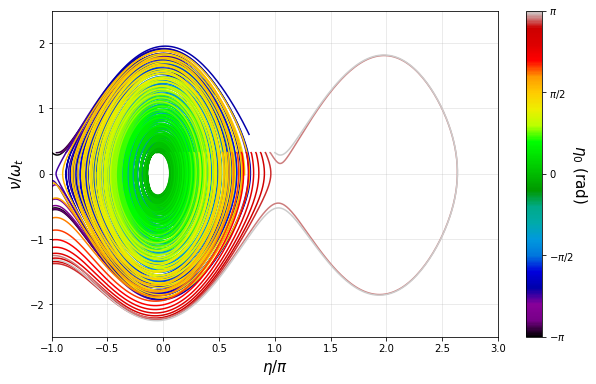

In [17]:
wtr=np.sqrt(wtrsq_out)

nplot=detadt_out/wtr


fig, ax = plt.subplots(figsize=(10,6))
s=5
last=1

for r in range(0,len(eta0_sim)):
    ax.plot(etark_su[r,:-last]/np.pi,nplot[r,:-last],c=cmap.to_rgba(eta0_sim[r]))

ax.grid(alpha=.3)
ax.set_xlim(-1,3)
ax.set_xlabel(r'$\eta/\pi$',fontsize=fonts)
ax.set_ylabel(r'$\nu/\omega_t$',fontsize=fonts)

ax.set_ylim(-2.5,2.5)

cbar=fig.colorbar(cmap, ticks=[-np.pi,-np.pi/2,0,np.pi/2,np.pi])
cbar.ax.set_yticklabels([r'$-\pi$',r'$-\pi/2$', '0',r'$\pi/2$', r'$\pi$'])  # horizontal colorbar
cbar.set_label(r'$\eta_0$ (rad)', rotation=270,labelpad=15,fontsize=fonts)
# ax.axvline(x=-5,color="black", linestyle="--")
plt.show()

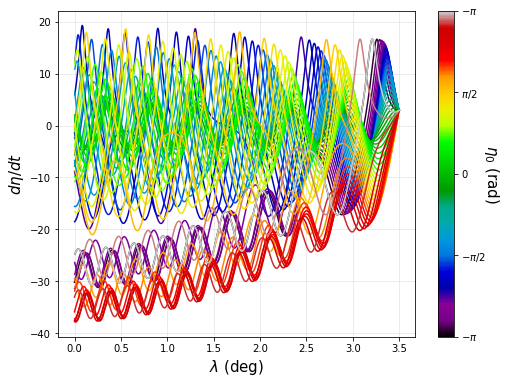

In [12]:
fig, ax = plt.subplots(figsize=(8,6))
s=5
last=1200

for r in range(0,len(eta0_sim)):
#     ax.plot(np.rad2deg(lamdark_su[r,2:]),dkpar_dtout[r,2:],c=cmap.to_rgba(eta0_sim[r]))
    ax.plot(np.rad2deg(lamdark_su[r,:-1]),detadt_out[r,:-1],c=cmap.to_rgba(eta0_sim[r]))

ax.grid(alpha=.3)
# ax.set_xlim(0,lamda0_deg)
ax.set_xlabel(r'$\lambda$ (deg)',fontsize=fonts)
ax.set_ylabel(r'$d\eta/dt$',fontsize=fonts)

# ax.set_ylim(0,0.00002)
cbar=fig.colorbar(cmap, ticks=[-np.pi,-np.pi/2,0,np.pi/2,np.pi])
cbar.ax.set_yticklabels([r'$-\pi$',r'$-\pi/2$', '0',r'$\pi/2$', r'$-\pi$'])  # horizontal colorbar
cbar.set_label(r'$\eta_0$ (rad)', rotation=270,labelpad=15,fontsize=fonts)
# ax.axvline(x=-5,color="black", linestyle="--")
plt.show()

# fig, ax = plt.subplots(figsize=(8,6))
# s=5
# last=1200

# for r in range(0,len(eta0_sim)):
# #     ax.plot(np.rad2deg(lamdark_su[r,2:]),dkpar_dtout[r,2:],c=cmap.to_rgba(eta0_sim[r]))
#     ax.plot(np.rad2deg(lamdark_su[r,:-1]),nurk_su[r,:-1],c=cmap.to_rgba(eta0_sim[r]))

# ax.grid(alpha=.3)
# ax.set_xlim(0,lamda0_deg)
# ax.set_xlabel(r'$\lambda$ (deg)')
# ax.set_ylabel(r'$\nu$')

# # ax.set_ylim(0,0.00002)
# ticks=np.arange(0,2*np.pi,1)
# cbar=fig.colorbar(cmap, ticks=ticks)
# cbar.set_label('gyro-phase (rad)', rotation=270,labelpad=15)
# # ax.axvline(x=-5,color="black", linestyle="--")
# plt.show()

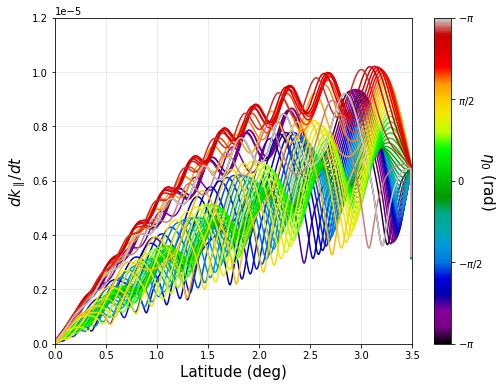

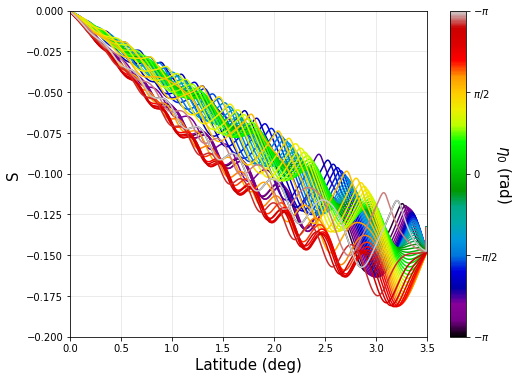

In [13]:
eta0_sim=eta0
fig, ax = plt.subplots(figsize=(8,6))
s=5


for r in range(0,len(eta0_sim)):
    ax.plot(np.rad2deg(lamdark_su[r,2:]),dkpar_dtout[r,2:],c=cmap.to_rgba(eta0_sim[r]))
#     ax.plot(np.rad2deg(lamdark_su[r,:-1]),wtrsq_out[r,:-1],c=cmap.to_rgba(eta0_sim[r]))

ax.grid(alpha=.3)
ax.set_xlim(0,lamda0_deg)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'$dk_\parallel/dt$',fontsize=fonts)

ax.set_ylim(0,0.000012)
cbar=fig.colorbar(cmap, ticks=[-np.pi,-np.pi/2,0,np.pi/2,np.pi])
cbar.ax.set_yticklabels([r'$-\pi$',r'$-\pi/2$', '0',r'$\pi/2$', r'$-\pi$'])  # horizontal colorbar
cbar.set_label(r'$\eta_0$ (rad)', rotation=270,labelpad=15,fontsize=fonts)
# ax.axvline(x=-5,color="black", linestyle="--")
plt.show()

fig, ax = plt.subplots(figsize=(8,6))
s=5


for r in range(0,len(eta0_sim)):
#     ax.plot(np.rad2deg(lamdark_su[r,2:]),dkpar_dtout[r,2:],c=cmap.to_rgba(eta0_sim[r]))
    ax.plot(np.rad2deg(lamdark_su[r,2:]),S_out[r,2:],c=cmap.to_rgba(eta0_sim[r]))

ax.grid(alpha=.3)
ax.set_xlim(0,lamda0_deg)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel('S ',fontsize=fonts)

ax.set_ylim(-0.2,0)
cbar=fig.colorbar(cmap, ticks=[-np.pi,-np.pi/2,0,np.pi/2,np.pi])
cbar.ax.set_yticklabels([r'$-\pi$',r'$-\pi/2$', '0',r'$\pi/2$', r'$-\pi$'])  # horizontal colorbar
cbar.set_label(r'$\eta_0$ (rad)', rotation=270,labelpad=15,fontsize=fonts)
# ax.axvline(x=-5,color="black", linestyle="--")
plt.show()



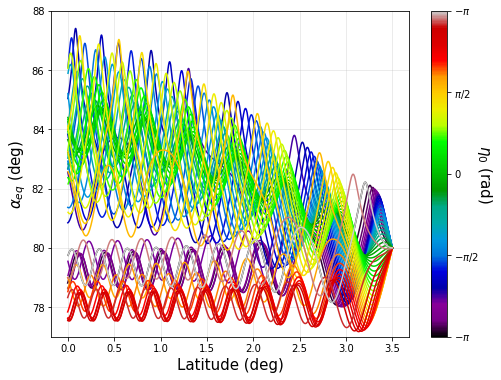

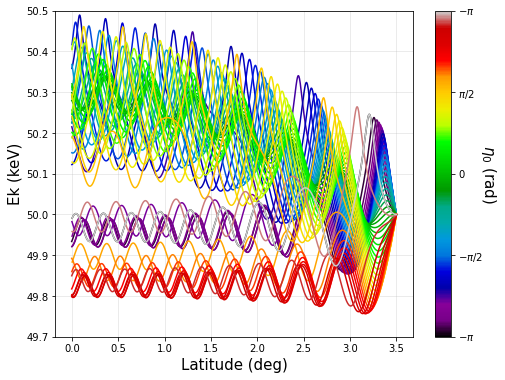

In [14]:
from matplotlib import cm

dalpha=[]
for r in range(0,len(eta0_sim)):
    ls=np.max(np.nonzero(aeqrk_su[r,:]))
    dalphaf=np.rad2deg(aeqrk_su[r,ls])-aeq0_deg
    dalpha.append(dalphaf)
    


fig, ax = plt.subplots(figsize=(8,6))
s=5


for r in range(0,len(eta0_sim)):
    ax.plot(np.rad2deg(lamdark_su[r,:-1]),np.rad2deg(aeqrk_su[r,:-1]),c=cmap.to_rgba(eta0_sim[r]))
#     ax.plot(np.rad2deg(lamdark_su[r,:-1]),gamma_out_su[r,:-1],c=cmap.to_rgba(eta0_sim[r]))

ax.grid(alpha=.3)
# ax.set_xlim(0,lamda0_deg)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'$\alpha_{eq}$ (deg)',fontsize=fonts)

ax.set_ylim(77,88)
cbar=fig.colorbar(cmap, ticks=[-np.pi,-np.pi/2,0,np.pi/2,np.pi])
cbar.ax.set_yticklabels([r'$-\pi$',r'$-\pi/2$', '0',r'$\pi/2$', r'$-\pi$'])  # horizontal colorbar
cbar.set_label(r'$\eta_0$ (rad)', rotation=270,labelpad=15,fontsize=fonts)
# ax.axvline(x=-5,color="black", linestyle="--")
plt.show()

fig, ax = plt.subplots(figsize=(8,6))
s=5


for r in range(0,len(eta0_sim)):
#     ax.plot(np.rad2deg(lamdark_su[r,:-1]),np.rad2deg(etark_su[r,:-1])%np.pi,c=cmap.to_rgba(eta0_sim[r]))
    ax.plot(np.rad2deg(lamdark_su[r,:-1]),E_kin_su[r,:-1]/1.602176487E-16,c=cmap.to_rgba(eta0_sim[r]))

ax.grid(alpha=.3)
# ax.set_xlim(0,lamda0_deg)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel('Ek (keV)',fontsize=fonts)

ax.set_ylim(49.7,50.5)
cbar=fig.colorbar(cmap, ticks=[-np.pi,-np.pi/2,0,np.pi/2,np.pi])
cbar.ax.set_yticklabels([r'$-\pi$',r'$-\pi/2$', '0',r'$\pi/2$', r'$-\pi$'])  # horizontal colorbar
cbar.set_label(r'$\eta_0$ (rad)', rotation=270,labelpad=15,fontsize=fonts)
# ax.axvline(x=-5,color="black", linestyle="--")
plt.show()





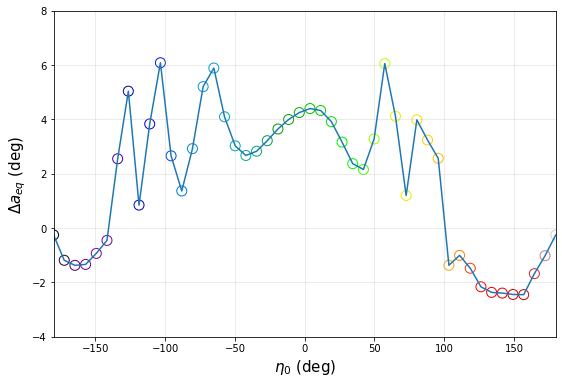

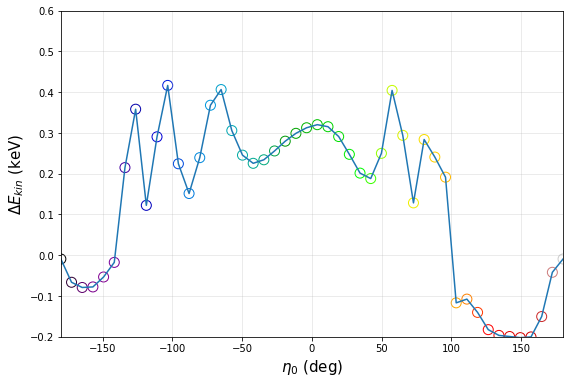

In [15]:
dalpha=[]
dEkin=[]

aeq = np.ma.array(aeqrk_su, mask=np.isnan(aeqrk_su))
Ekin = np.ma.array(E_kin_su, mask=np.isnan(E_kin_su))
for r in range(0,len(eta0_sim)):
    ls=np.max(np.nonzero(aeq[r,:]))
    els=np.max(np.nonzero(Ekin[r,:]))
    dalphaf=np.rad2deg(aeq[r,ls])-aeq0_deg
    dEkinf=(Ekin[r,ls]/1.602176487E-16)-Ekev0
    dalpha.append(dalphaf)
    dEkin.append(dEkinf)
#     print(dalpha)


fig, ax = plt.subplots(figsize=(9,6))
s=5

colors=eta0_sim[:]
# for r in range(0,len(eta0)):
#     ax.plot(np.rad2deg(lamda[r,:-1]),np.rad2deg(aeq[r,:-1]),c=cmap.to_rgba(eta0[r]))
ax.grid(alpha=.3)
ax.plot(np.rad2deg(eta0_sim),dalpha)
ax.scatter(np.rad2deg(eta0_sim),dalpha,marker='o',facecolors='none', edgecolors=cmap.to_rgba(eta0_sim[:]),s=100)
ax.set_xlim(-180,180)
ax.set_xlabel(r'$\eta_0$ (deg)',fontsize=fonts)
ax.set_ylabel(r'$\Delta a_{eq}$ (deg)',fontsize=fonts)

ax.set_ylim(-4,8)
ticks=np.arange(0,2*np.pi,1)
# cbar=fig.colorbar(cmap, ticks=ticks)
# cbar.set_label('gyro-phase (rad)', rotation=270,labelpad=15)
#     ax.axvline(x=-5,color="black", linestyle="--")
plt.show()

fig, ax = plt.subplots(figsize=(9,6))
s=5

colors=eta0_sim[:]
# for r in range(0,len(eta0)):
#     ax.plot(np.rad2deg(lamda[r,:-1]),np.rad2deg(aeq[r,:-1]),c=cmap.to_rgba(eta0[r]))
ax.grid(alpha=.3)
ax.plot(np.rad2deg(eta0_sim),dEkin)
ax.scatter(np.rad2deg(eta0_sim),dEkin,marker='o',facecolors='none', edgecolors=cmap.to_rgba(eta0_sim[:]),s=100)
ax.set_xlim(-180,180)
ax.set_xlabel(r'$\eta_0$ (deg)',fontsize=fonts)
ax.set_ylabel(r'$\Delta E_{kin}}$ (keV)',fontsize=fonts)

ax.set_ylim(-0.2,0.6)
ticks=np.arange(0,2*np.pi,1)
# cbar=fig.colorbar(cmap, ticks=ticks)
# cbar.set_label('gyro-phase (rad)', rotation=270,labelpad=15)
#     ax.axvline(x=-5,color="black", linestyle="--")
plt.show()


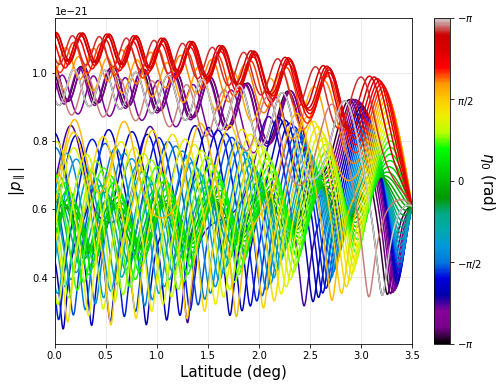

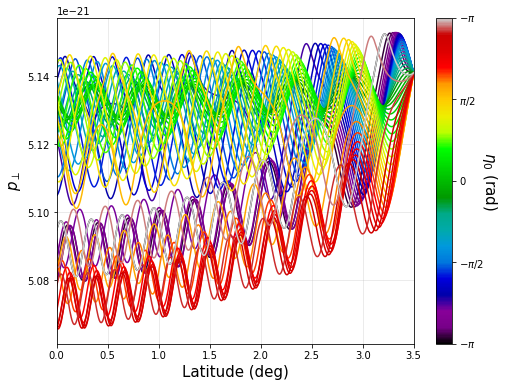

In [16]:
fig, ax = plt.subplots(figsize=(8,6))
s=5
last=1
for r in range(0,len(eta0_sim)):
    ax.plot(np.rad2deg(lamdark_su[r,:-last]),np.abs(pparrk_su[r,:-last]),c=cmap.to_rgba(eta0_sim[r]))
#     ax.plot(np.rad2deg(lamdark_su[r,:-1]),E_kin_su[r,:-1]/1.602176487E-16,c=cmap.to_rgba(eta0_sim[r]))

ax.grid(alpha=.3)
ax.set_xlim(0,lamda0_deg)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'$|p_\parallel|$',fontsize=fonts)

# ax.set_ylim(1,3)
cbar=fig.colorbar(cmap, ticks=[-np.pi,-np.pi/2,0,np.pi/2,np.pi])
cbar.ax.set_yticklabels([r'$-\pi$',r'$-\pi/2$', '0',r'$\pi/2$', r'$-\pi$'])  # horizontal colorbar
cbar.set_label(r'$\eta_0$ (rad)', rotation=270,labelpad=15,fontsize=fonts)

# ax.axvline(x=-5,color="black", linestyle="--")
plt.show()

fig, ax = plt.subplots(figsize=(8,6))
s=5
last=1
for r in range(0,len(eta0_sim)):
    ax.plot(np.rad2deg(lamdark_su[r,:-last]),pperrk_su[r,:-last],c=cmap.to_rgba(eta0_sim[r]))
#     ax.plot(np.rad2deg(lamdark_su[r,:-1]),E_kin_su[r,:-1]/1.602176487E-16,c=cmap.to_rgba(eta0_sim[r]))

ax.grid(alpha=.3)
ax.set_xlim(0,lamda0_deg)
ax.set_xlabel('Latitude (deg)',fontsize=fonts)
ax.set_ylabel(r'$p_\perp$',fontsize=fonts)

# ax.set_ylim(1,3)
cbar=fig.colorbar(cmap, ticks=[-np.pi,-np.pi/2,0,np.pi/2,np.pi])
cbar.ax.set_yticklabels([r'$-\pi$',r'$-\pi/2$', '0',r'$\pi/2$', r'$-\pi$'])  # horizontal colorbar
cbar.set_label(r'$\eta_0$ (rad)', rotation=270,labelpad=15,fontsize=fonts)
# ax.axvline(x=-5,color="black", linestyle="--")
plt.show()